# <center>Credit risk prediction using South German credit data</center>

<b>Problem Statement:</b>
</br>Normally, most of the bank's wealth is obtained from providing credit loans so that a
marketing bank must be able to reduce the risk of non-performing credit loans. The risk
of providing loans can be minimized by studying patterns from existing lending data.
One technique that you can use to solve this problem is to use data mining techniques.
Data mining makes it possible to find hidden information from large data sets by way of
classification.
<br>The goal of this project is to build a model to predict whether the person,
described by the attributes of the dataset, is a good or bad credit risk.

<b> Data: </b>
<br> The data contains 1000 observations for South German bank credit market. Specifically 700 good and 300 bad credits with 20 predictor variables (features). It covers a period from 1973 to 1975. The data is hosted [here](https://archive.ics.uci.edu/ml/datasets/South+German+Credit#).

<b> Variables and their description: </b>


|Variable|Description|Values|Type|English name|
|---|---|---|---|---|
|laufkont|status of the debtor's checking account with the bank|1 : no checking account|categorical|status|
|||2 : ... < 0 DM|||
|||3 : 0<= ... < 200 DM|||
|||4 : ... >= 200 DM / salary for at least 1 year|||
|laufzeit|credit duration in months||quantitative|duration|
|moral|history of compliance with previous or concurrent credit contracts|0 : delay in paying off in the past |categorical|credit_history|
|||1 : critical account/other credits elsewhere |||
|||2 : no credits taken/all credits paid back duly|||
|||3 : existing credits paid back duly till now|||
|||4 : all credits at this bank paid back duly|||
|verw|purpose for which the credit is needed|0 : others|categorical|purpose|
|||1 : car (new)|||       
|||2 : car (used)|||        
|||3 : furniture/equipment|||
|||4 : radio/television|||
|||5 : domestic appliances|||
|||6 : repairs|||
|||7 : education|||        
|||8 : vacation|||       
|||9 : retrainin|||         
|||10 : business|||
|hoehe|credit amount in DM: result of monotonic transformation||quantitative|amount|
|sparkont|debtor's savings|1 : unknown/no savings account|categorical|savings|
|||2 : ... <  100 DM|||            
|||3 : 100 <= ... <  500 DM|||    
|||4 : 500 <= ... < 1000 DM|||      
|||5 : ... >= 1000 DM|||
|beszeit|duration of debtor's employment with current employer|1 : unemployed|ordinal|employment_duration|
|||2 : < 1 yr|||  
|||3 : 1 <= ... < 4 yrs|||
|||4 : 4 <= ... < 7 yrs|||
|||5 : >= 7 yrs|||
|rate|credit installments as a percentage of debtor's disposable income|1 : >= 35 |ordinal|dti|
|||2 : 25 <= ... < 35|||
|||3 : 20 <= ... < 25|||
|||4 : < 20|||
|famges|combined information on sex and marital status|1 : male : divorced/separated|categorical|status_sex|
|||2 : female : non-single or male : single|||
|||3 : male : married/widowed|||
|||4 : female : single|||
|buerge|Is there another debtor or a guarantor for the credit?|1 : none|categorical|other_debtors|
|||2 : co-applicant|||
|||3 : guarantor|||
|wohnzeit|length of time (in years) the debtor lives in the present residence|1 : < 1 yr|ordinal|present_residence|
|||2 : 1 <= ... < 4 yrs|||
|||3 : 4 <= ... < 7 yrs|||
|||4 : >= 7 yrs|||
|verm|the debtor's most valuable property, i.e. the highest possible code is used|1 : unknown / no property|ordinal|property|
|||2 : car or other|||                    
|||3 : building soc. savings agr./life insurance|||
|||4 : real estate|||
|alter|age in years||quantitative|age|
|weitkred|installment plans from providers other than the credit-giving bank|1 : bank|categorical|other_installment_plans|
|||2 : stores|||
|||3 : none|||
|wohn|type of housing the debtor lives in|1 : for free|categorical|housing|
|||2 : rent|||
|||3 : own|||
|bishkred|number of credits including the current one the debtor has (or had) at this bank| 1 : 1|ordinal|number_credits|
|||2 : 2-3|||
|||3 : 4-5|||
|||4 : >= 6|||
|beruf|quality of debtor's job|1 : unemployed/unskilled - non-resident|ordinal|job|
|||2 : unskilled - resident|||                    
|||3 : skilled employee/official|||             
|||4 : manager/self-empl./highly qualif. employee|||
|pers|number of persons who financially depend on the debtor (i.e., are entitled to maintenance)|1 : 3 or more|binary|people_liable|
|||2 : 0 to 2|||
|telef|Is there a telephone landline registered on the debtor's name?|1 : no|binary|telephone|
|||2 : yes (under customer name)|||
|gastarb|Is the debtor a foreign worker?|1 : yes|binary|foreign_worker|
||| 2 : no|||
|kredit|Has the credit contract been complied with (good) or not (bad) ?|0 : bad |binary|credit_risk|
|||1 : good|||

## Table of Contents


---


* [Importing some packages](#Part0) 

* [Loading the data](#Part1) 

* [Exploratory data analysis (EDA)](#Part2)

## Importing some packages <a name="Part0"></a>

In [104]:
! pip install cassandra-driver

In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
from sklearn.preprocessing import StandardScaler, KBinsDiscretizer
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
from cassandra.cluster import Cluster
from cassandra.auth import PlainTextAuthProvider
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from scipy.stats import boxcox
from IPython.display import HTML, Markdown, display
import warnings
warnings.filterwarnings("ignore")

## Loading the data <a name="Part1"></a>

Loading data from Cassandra database. Please, take into account that it is possible to get an error while connecting to the database. The problem is that the data can be hybernated. So the issue can be solved by running the code snippet below after 1-5 minutes.

In [106]:
cloud_config= {
        'secure_connect_bundle': 'secure-connect-south-german-credit.zip'
}
auth_provider = PlainTextAuthProvider('utOxtpGgahrASICWfrGNZMGP', 
                                      'zkSwAviwrSICsrE46+QORQzKRx.jZ,YZZUYfgPHs,jAnfOz0LMCI1tOpJ9ZIHn,NW0TjMebfC6kwIB3PUJ-_W2yG8CvOi0vWMHay+D-otMZE,_.wLzQq0SHw86LUwK6m')
cluster = Cluster(cloud=cloud_config, auth_provider=auth_provider)
session = cluster.connect('credit_data')

data = pd.DataFrame(session.execute('SELECT * FROM "SouthGermanCredit";').all())
data = data.sort_values('id').drop(columns='id').reset_index(drop=True)
data.head()

alter  beruf  beszeit  bishkred  ...  verw  weitkred  wohn  wohnzeit
0     21      3        2         1  ...     2         3     1         4
1     36      3        3         2  ...     0         3     1         2
2     23      2        4         1  ...     9         3     1         4
3     39      2        3         2  ...     0         3     1         2
4     38      2        3         2  ...     0         1     2         4

[5 rows x 21 columns]

Uncomment the lines below if you want to load the data from your pc.

In [107]:
# Uncomment lines below if you have asc file
# data = pd.read_csv('SouthGermanCredit.asc', sep=' ')
# data.head()

# Uncomment lines below if you have csv file
# data = pd.read_csv('SouthGermanCredit.csv')
# data.drop(columns='id', inplace=True)
# data.head()

First of all let's rename all the columns.

In [108]:
data.rename(columns={'laufkont': 'status',
                     'laufzeit': 'duration',
                     'moral': 'credit_history',
                     'verw': 'purpose',
                     'hoehe': 'amount',
                     'sparkont': 'savings',
                     'beszeit': 'employment_duration',
                     'rate': 'dti',
                     'famges': 'status_sex',
                     'buerge': 'other_debtors',
                     'wohnzeit': 'present_residence',
                     'verm': 'property',
                     'alter': 'age',
                     'weitkred': 'other_installment_plans',
                     'wohn': 'housing',
                     'bishkred': 'number_credits',
                     'beruf': 'job',
                     'pers': 'people_liable',
                     'telef': 'telephone',
                     'gastarb': 'foreign_worker',
                     'kredit': 'credit_risk'}, 
            inplace=True)

data.head()

age  job  ...  housing  present_residence
0   21    3  ...        1                  4
1   36    3  ...        1                  2
2   23    2  ...        1                  4
3   39    2  ...        1                  2
4   38    2  ...        2                  4

[5 rows x 21 columns]

Let's also encode bad credit risk as 1 and good as 0.

In [109]:
data['credit_risk'] = data['credit_risk'].map({1: 0, 0: 1})

## Exploratory data analysis (EDA) <a name="Part1"></a>

Let's start with general overview of the data.

In [110]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   age                      1000 non-null   int64
 1   job                      1000 non-null   int64
 2   employment_duration      1000 non-null   int64
 3   number_credits           1000 non-null   int64
 4   other_debtors            1000 non-null   int64
 5   status_sex               1000 non-null   int64
 6   foreign_worker           1000 non-null   int64
 7   amount                   1000 non-null   int64
 8   credit_risk              1000 non-null   int64
 9   status                   1000 non-null   int64
 10  duration                 1000 non-null   int64
 11  credit_history           1000 non-null   int64
 12  people_liable            1000 non-null   int64
 13  dti                      1000 non-null   int64
 14  savings                  1000 non-null   int64
 15  telep

Let's show general stats for each column.

In [111]:
data.describe()

age          job  ...      housing  present_residence
count  1000.00000  1000.000000  ...  1000.000000        1000.000000
mean     35.54200     2.904000  ...     1.928000           2.845000
std      11.35267     0.653614  ...     0.530186           1.103718
min      19.00000     1.000000  ...     1.000000           1.000000
25%      27.00000     3.000000  ...     2.000000           2.000000
50%      33.00000     3.000000  ...     2.000000           3.000000
75%      42.00000     3.000000  ...     2.000000           4.000000
max      75.00000     4.000000  ...     3.000000           4.000000

[8 rows x 21 columns]

Now let's look at the unique values for each categorical variable.

In [112]:
print(',\n'.join([f'{col}: ' + ', '.join([str(i) 
                  for i in sorted(data[col].unique())]) 
                  for col in data.columns 
                  if col not in ['age', 'amount', 'duration']]))

job: 1, 2, 3, 4,
employment_duration: 1, 2, 3, 4, 5,
number_credits: 1, 2, 3, 4,
other_debtors: 1, 2, 3,
status_sex: 1, 2, 3, 4,
foreign_worker: 1, 2,
credit_risk: 0, 1,
status: 1, 2, 3, 4,
credit_history: 0, 1, 2, 3, 4,
people_liable: 1, 2,
dti: 1, 2, 3, 4,
savings: 1, 2, 3, 4, 5,
telephone: 1, 2,
property: 1, 2, 3, 4,
purpose: 0, 1, 2, 3, 4, 5, 6, 8, 9, 10,
other_installment_plans: 1, 2, 3,
housing: 1, 2, 3,
present_residence: 1, 2, 3, 4


### Univariate analysis

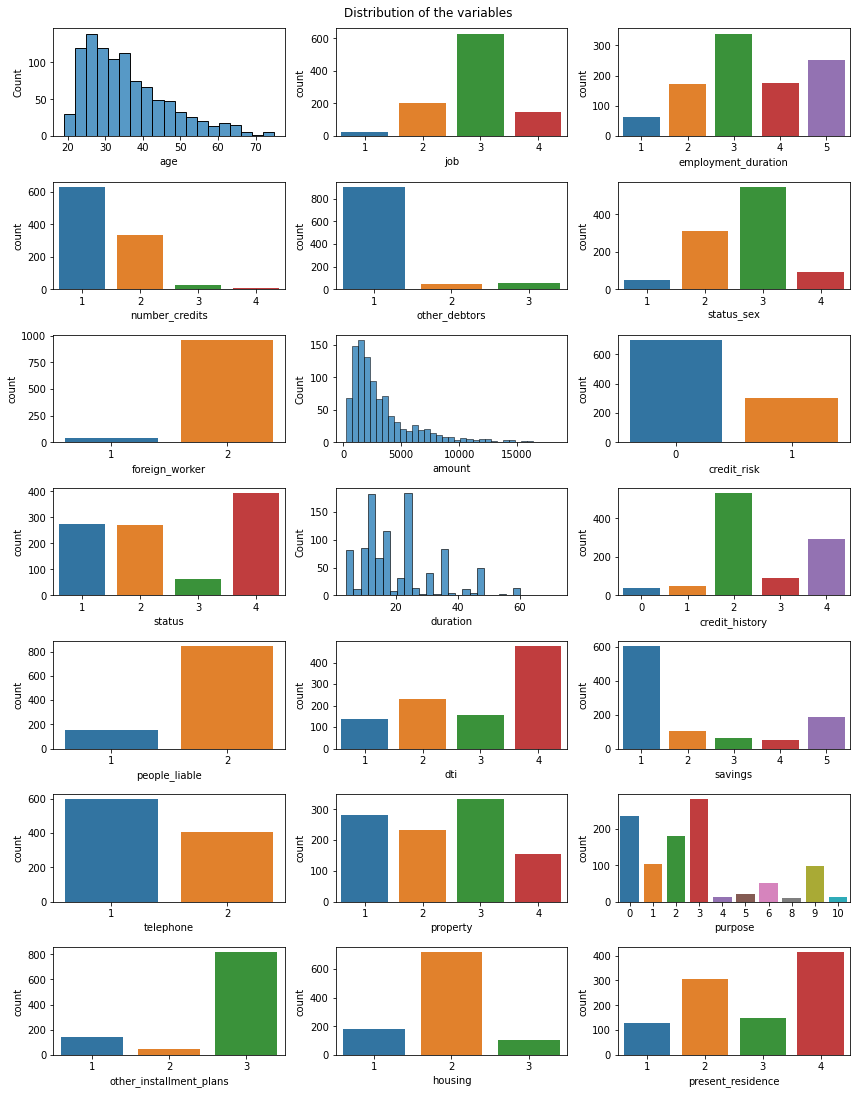

In [113]:
cont_list = ['age', 'amount', 'duration']
        
nrows_subplot = data.shape[1] / 3 + data.shape[1] % 3
n_subplot = 0
fig = plt.figure(figsize=(12, 15))
for col in data.columns:
    n_subplot += 1
    plt.subplot(nrows_subplot, 3, n_subplot)
    if col not in cont_list:
        sns.countplot(x=col, data=data)
    else:
        sns.histplot(x=col, data=data)
plt.suptitle('Distribution of the variables', y=1.01)
plt.tight_layout()

The plots above show that continuous features (age, amount, and duration) are right skewed. So let's figure out what transformation to use to make them look more normally distributed.

In [114]:
def scaling(df, column):
    f = plt.figure(figsize=(10,5))

    # log 1 Transform
    ax = f.add_subplot(221)
    L1p = np.log1p(df[column])
    sns.distplot(L1p,color='b',ax=ax)
    ax.set_title('skew value Log 1 transform: ' + str(np.log1p(df[column]).skew()))

    # Square Log Transform
    ax = f.add_subplot(222)
    SRT = np.sqrt(df[column])
    sns.distplot(SRT,color='c',ax=ax)
    ax.set_title('Skew Value Square Transform: ' + str(np.sqrt(df[column]).skew()))

    # Log Transform
    ax = f.add_subplot(223)
    LT = np.log(df[column])
    sns.distplot(LT, color='r',ax=ax)
    ax.set_title('Skew value Log Transform: ' + str(np.log(df[column]).skew()))

    # Box Cox Transform
    ax = f.add_subplot(224)
    BCT,fitted_lambda = boxcox(df[column],lmbda=None)
    sns.distplot(BCT,color='g',ax=ax)
    ax.set_title('Skew Value Box Cox Transform: ' + str(pd.Series(BCT).skew()))
    ax.set_xlabel(column)

    plt.tight_layout()

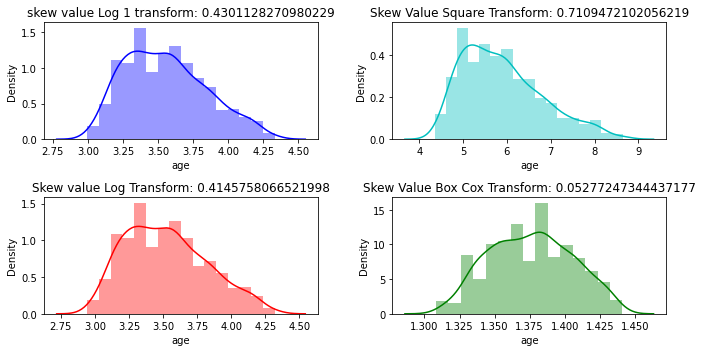

In [115]:
scaling(data, 'age')

So for age we can use Box-Cox transformation. Let's see what will show similar plots for amount and duration.

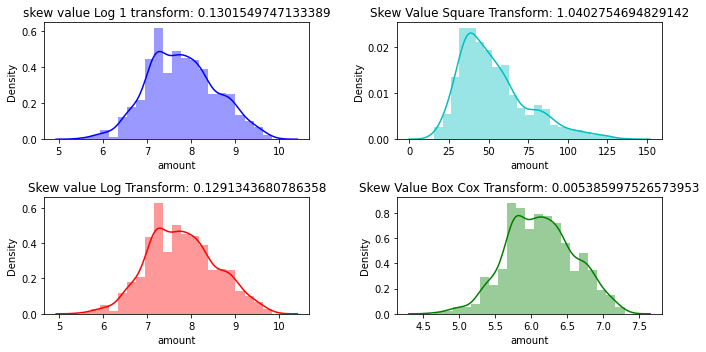

In [116]:
scaling(data, 'amount')

Box-Cox transformation is the best of the chosen transformers in case of amount feature. So, finally, let's check what transformation to use for duration.

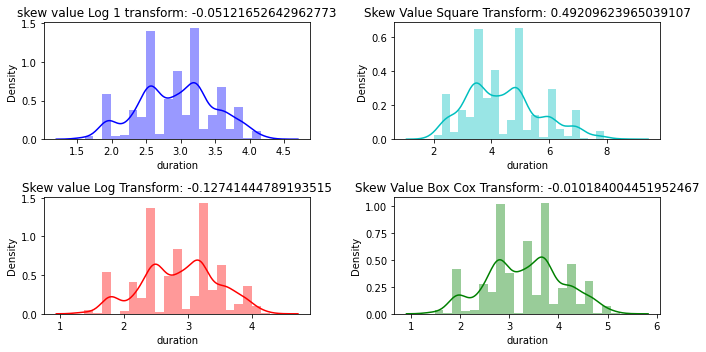

In [117]:
scaling(data, 'duration')

Box-Cox transformation won again. Let's just remember these discoveries and apply them in the model building code. But for further analysis let's just skip converting the continuous features. 

### Bivariate analysis

<h4><center>The distribution of the features                   by the credit_risk</center></h4>

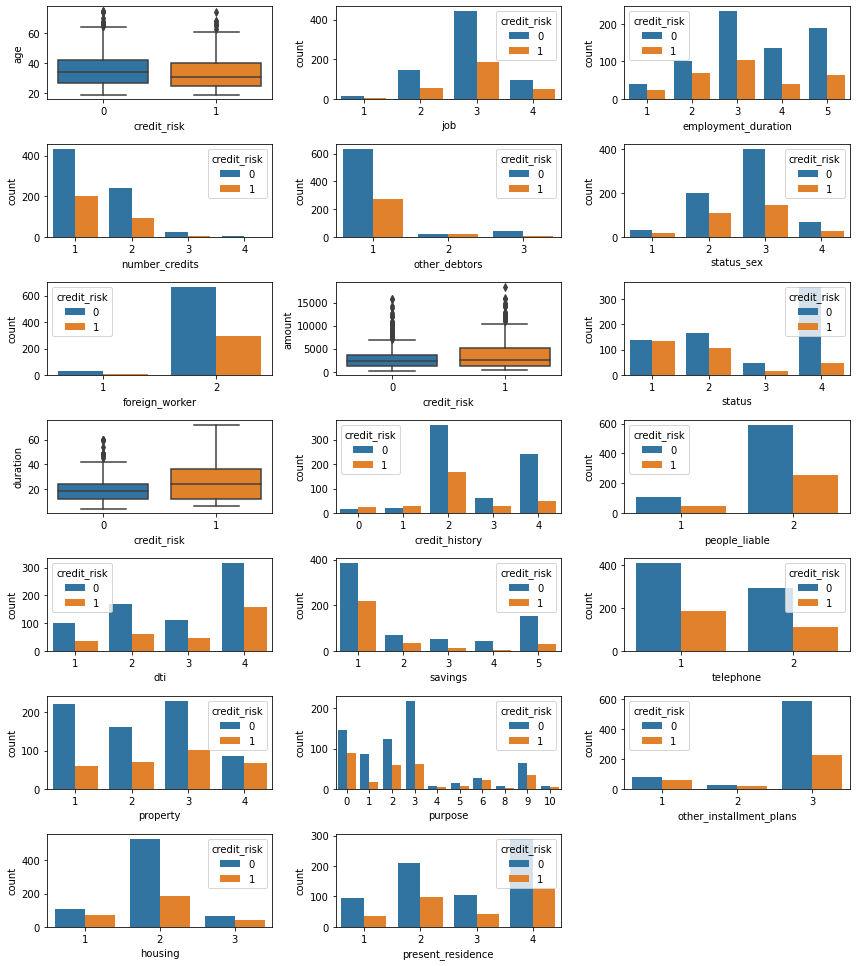

In [118]:
display(Markdown("<h4><center>The distribution of the features \
                  by the credit_risk</center></h4>"))
        
nrows_subplot = (data.shape[1] - 1) / 3 + (data.shape[1] - 1) % 3
n_subplot = 0
fig = plt.figure(figsize=(12, 15))
for col in data.columns:
    if col == 'credit_risk':
        continue
    n_subplot += 1
    plt.subplot(nrows_subplot, 3, n_subplot)
    if col not in cont_list:
        sns.countplot(x=col, data=data, hue='credit_risk')
    else:
        sns.boxplot(x='credit_risk', y=col, data=data)
plt.tight_layout()

Considering how credit_risk changes depending on the values of the features, the following features seem to be handy in prediction of risky cases: status, duration, credit_history, purpose, amount, savings, employment_duration,
status_sex, other_debtors, property, other_installment_plans, and housing.

### Multivariate analysis

Let's create a function to plot charts for multivariate analysis.

In [119]:
def plot_multivariate(data, gfeat, col_list, fig_size):
    '''Creates charts

       Params:
       data: dataframe, contains features
       gfeat: str, name of a feature which will be used to 
                   group charts in line with the target
       col_list: list, list of feature names for 
                       which charts will be constructed
       fig_size: tuple, size of figure

       Returns:
       a group of charts by the gfeat and target
    '''
    temp_suptitle = f'The distribution of the features by the credit_risk and {gfeat}'
    nrows_subplot = len(col_list)
    n_subplot = 0
    ncols_subplot = len(data[gfeat].unique())
    fig = plt.figure(figsize=fig_size)
    for col in col_list:
        if col == 'credit_risk' or col == gfeat:
            continue
        for i in sorted(data[gfeat].unique()):
            n_subplot += 1
            temp_df = data[data[gfeat]==i]
            plt.subplot(nrows_subplot, ncols_subplot, n_subplot)
            if col not in cont_list:
                sns.countplot(x=col, data=temp_df, hue='credit_risk')
            else:
                sns.boxplot(x='credit_risk', y=col, data=temp_df)
            plt.title(f'{gfeat} = {i}')
    plt.suptitle(temp_suptitle, y=1.01)
    plt.tight_layout()

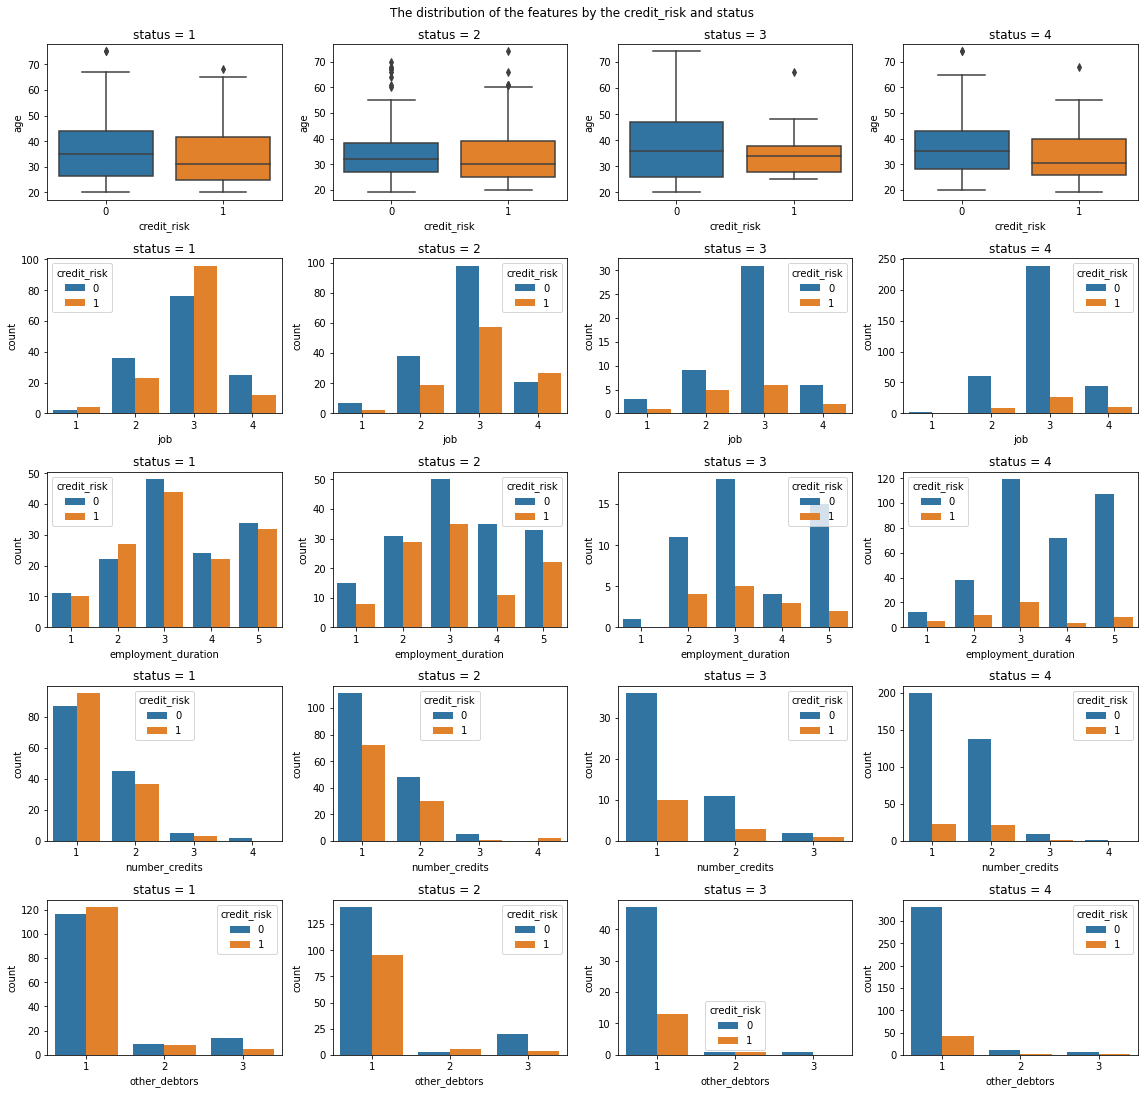

In [120]:
col_list = [col for col in data.columns if col not in ['credit_risk', 'status']][:5]
plot_multivariate(data=data, gfeat='status', col_list=col_list, fig_size=(16, 15))

Judging by the plots above duration, credit_history, purpose, amount, and savings can be helpful in iteraction with status: distribution of each feature varies by status. Moreover the following specific iteractions can also help in the prediction task:
1. status = 3 and duration
2. status = 1 or 2 and credit_history = 0 or 1
3. status = 1 and purpose = 0; 2; 4; 5; 6; 9
4. status = 2 and purpose = 0; 2; 6; 10
5. status = 3 and amount
6. status = 1 and savings = 1; 5
7. status = 2 and savings = 2

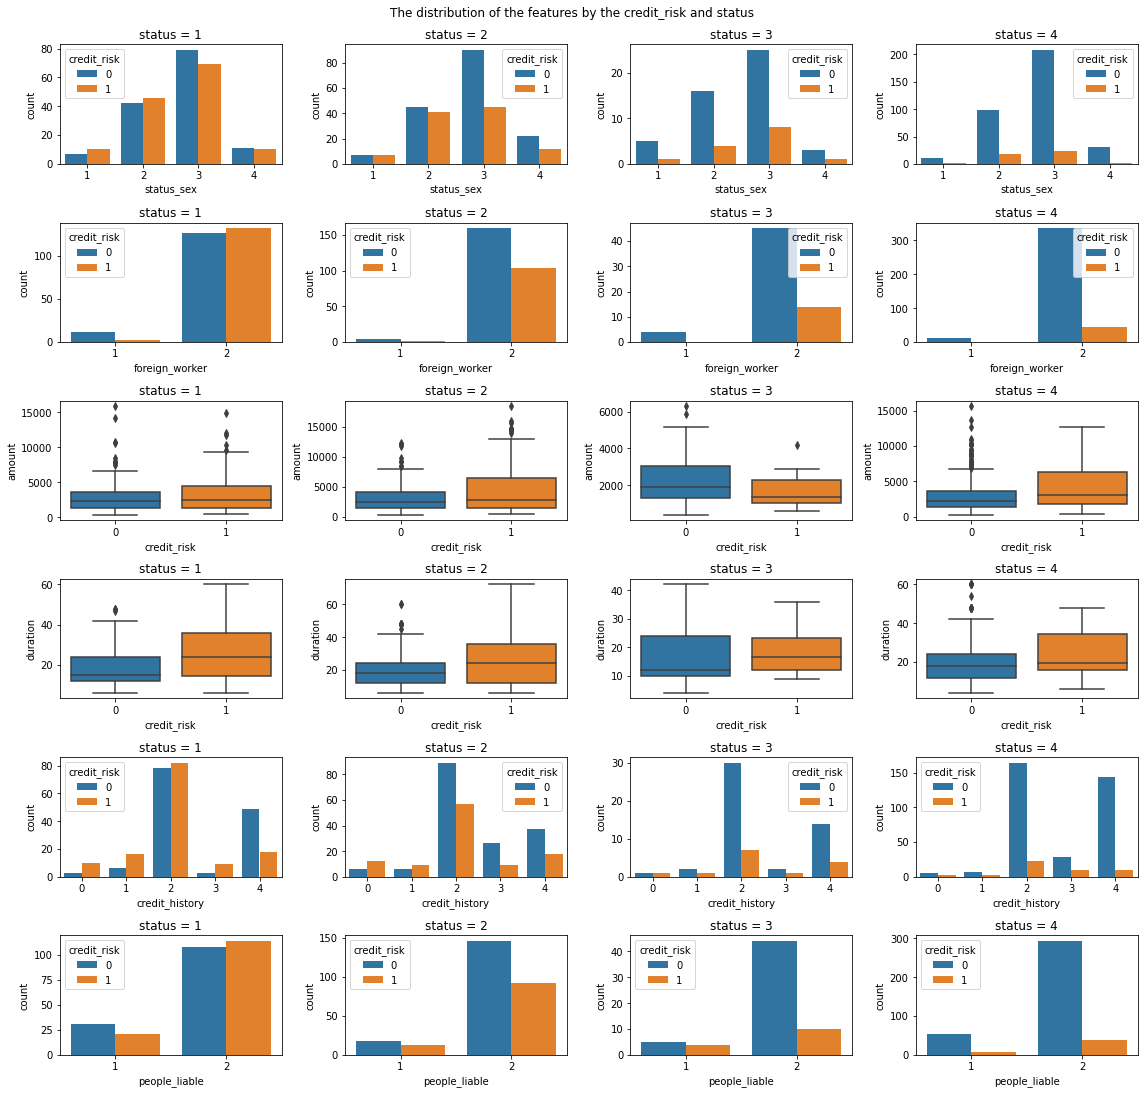

In [121]:
col_list = [col for col in data.columns if col not in ['credit_risk', 'status']][5:11]
plot_multivariate(data=data, gfeat='status', col_list=col_list, fig_size=(16, 15))

Judging by the plots above employment_duration,  dti, status_sex, other_debtors, present_residency, and property
can be helpful in iteraction with status: distribution of each feature varies by status. Moreover the following specific iteractions can also help in the prediction task:
1. status = 1 or 2 and employment_duration = 2
2. status = 1 and dti = 3; 4
3. status = 1 and status_sex = 1; 2
4. status = 1 and other_debtors = 1
5. status = 1 and present_residency = 2; 4
6. status = 2 and present_residency = 2
7. status = 1 and property = 3; 4
8. status = 2 and property = 2; 4

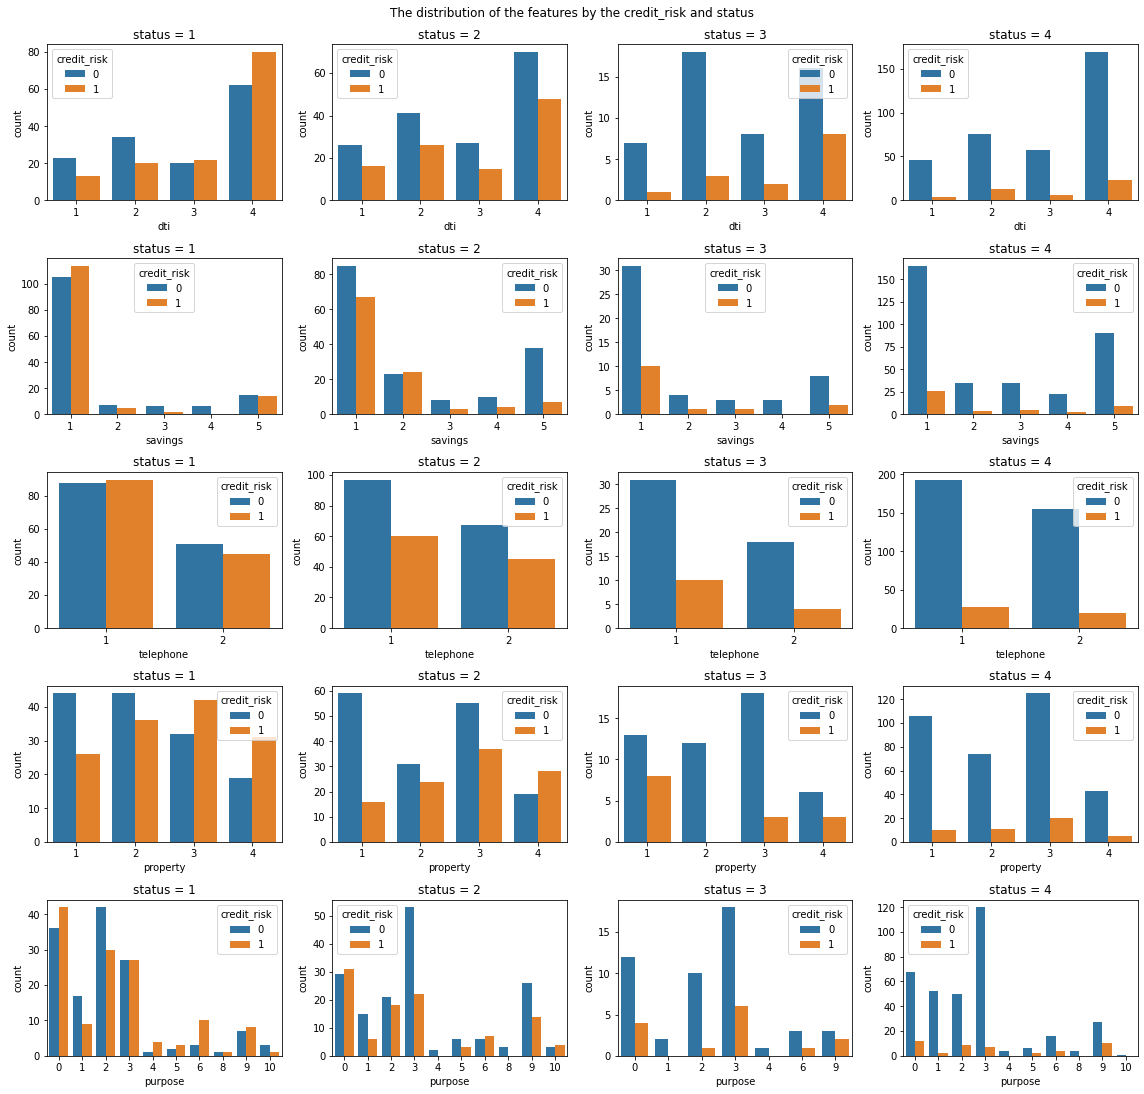

In [122]:
col_list = [col for col in data.columns if col not in ['credit_risk', 'status']][11:16]
plot_multivariate(data=data, gfeat='status', col_list=col_list, fig_size=(16, 15))

Judging by the plots above age, other_installment_plans, housing, number_credits, and job can be helpful in iteraction with status: distribution of each feature varies by status. Moreover the following specific iteractions can also help in the prediction task:
1. status = 3 and age
2. status = 1 and other_installment_plans
3. status = 1 or 2 and housing
4. status = 1 and number_credits
5. status = 1  and job
6. status = 2 and job = 4

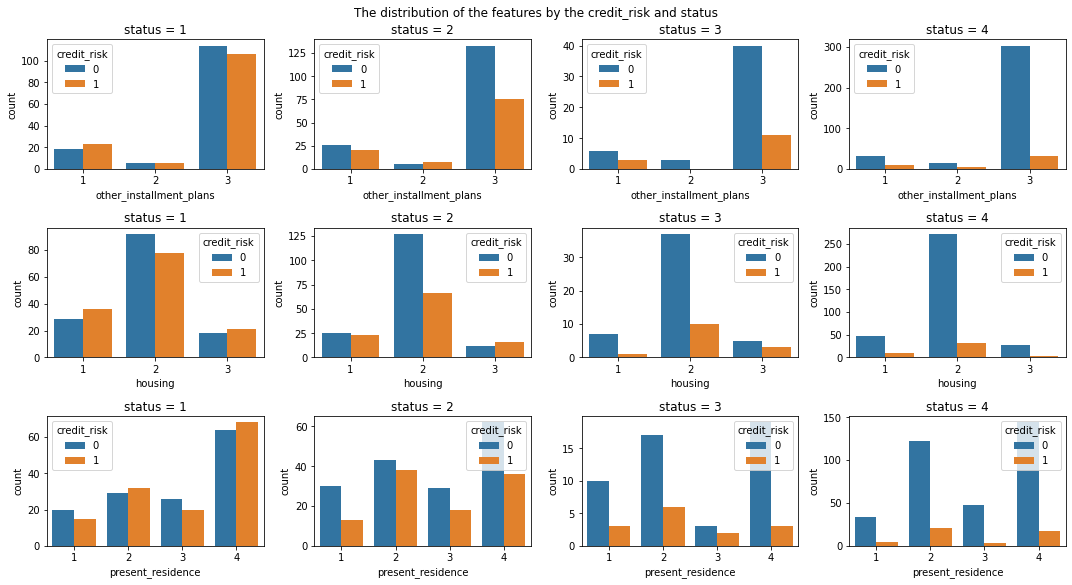

In [123]:
col_list = [col for col in data.columns if col not in ['credit_risk', 'status']][16:]
plot_multivariate(data=data, gfeat='status', col_list=col_list, fig_size=(15, 8))

Judging by the plots above people_liable, telephone, and foreign_worker can be helpful in iteraction with status: distribution of each feature varies by status. 
Moreover the following specific iteractions can also help in the prediction task:
1. status = 1 or 2 and people_liable
2. status = 1 or 2 and telephon

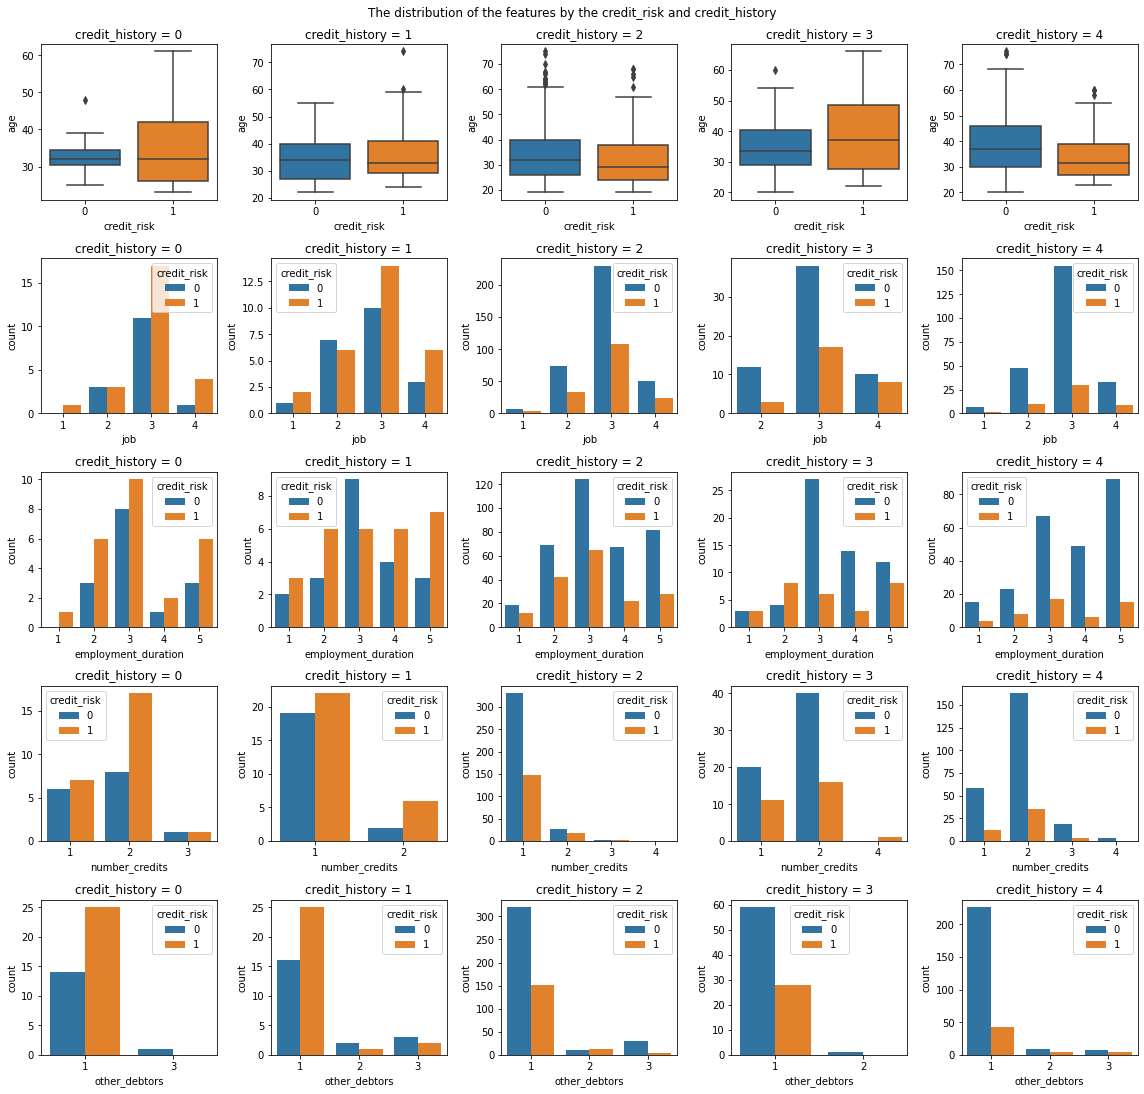

In [124]:
col_list = [col for col in data.columns if col not in ['credit_risk', 'credit_history']][:5]
plot_multivariate(data=data, gfeat='credit_history', col_list=col_list, fig_size=(16, 15))

The plots above show that status, duration, purpose, amount, and savings can be helpful in the prediction task if considered in iteraction with credit_history: distribution of each feature varies by credit_history.

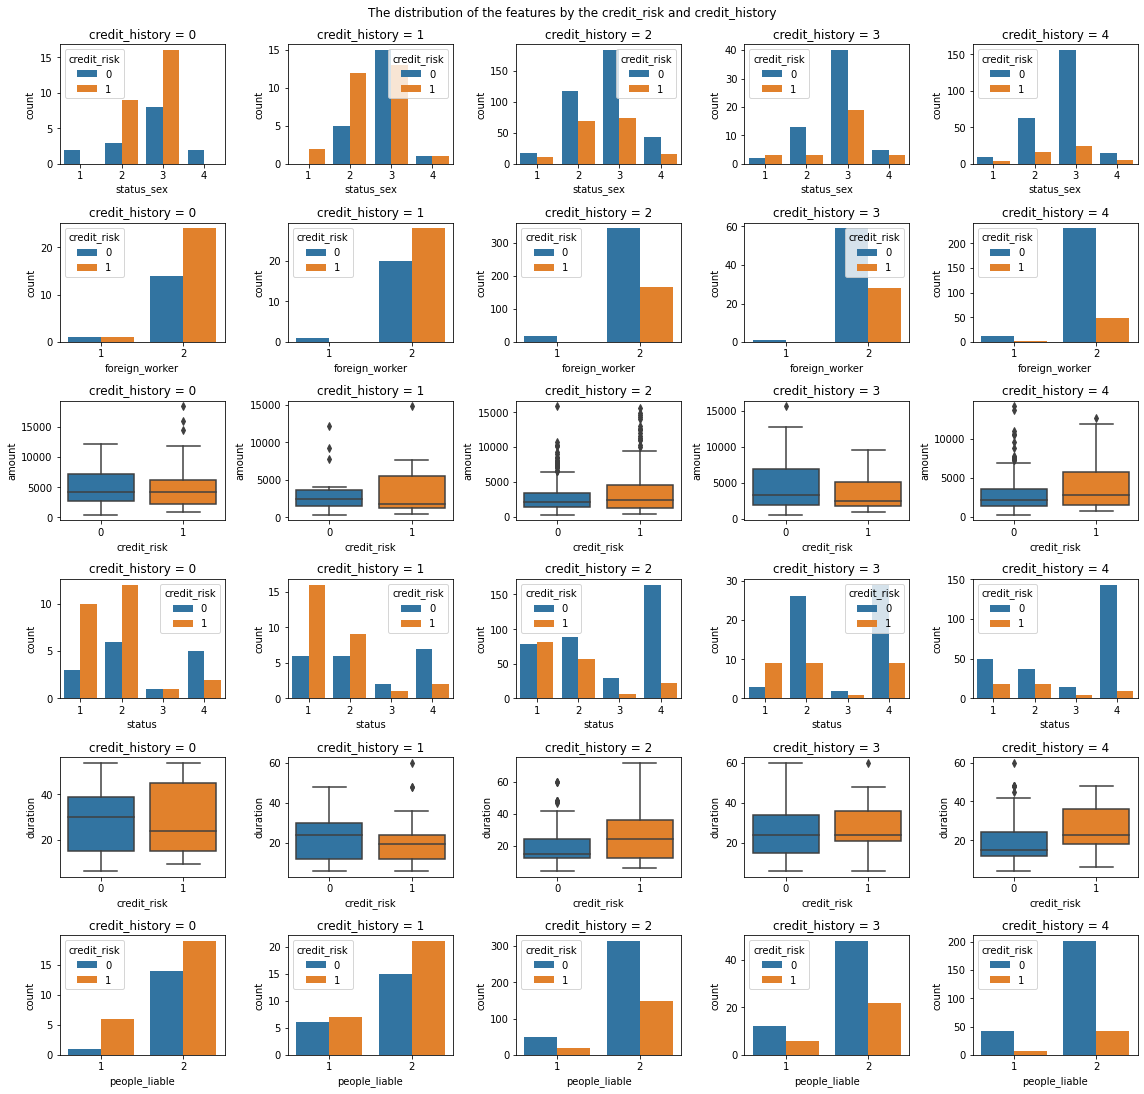

In [125]:
col_list = [col for col in data.columns if col not in ['credit_risk', 'credit_history']][5:11]
plot_multivariate(data=data, gfeat='credit_history', col_list=col_list, fig_size=(16, 15))

Judging by the plots above employment_duration, dti, status_sex, other_debtors, present_residency, and property
can be helpful in iteraction with credit_history: distribution of each feature varies by credit_history.

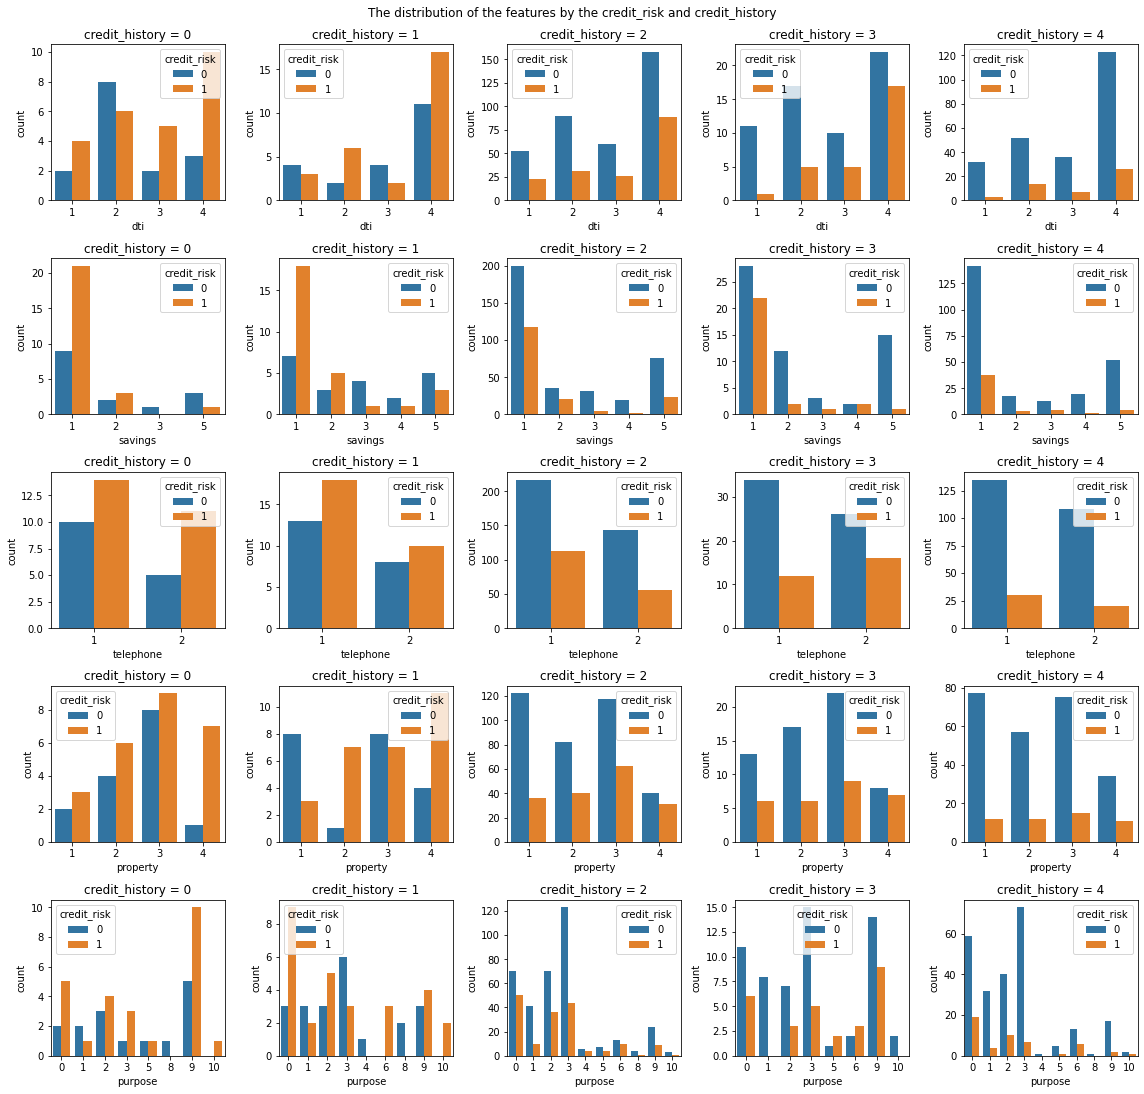

In [126]:
col_list = [col for col in data.columns if col not in ['credit_risk', 'credit_history']][11:16]
plot_multivariate(data=data, gfeat='credit_history', col_list=col_list, fig_size=(16, 15))

The plots above show that age, other_installment_plans, housing, number_credits, and job can be helpful in the prediction task if considered in iteraction with credit_history: distribution of each feature varies by credit_history.

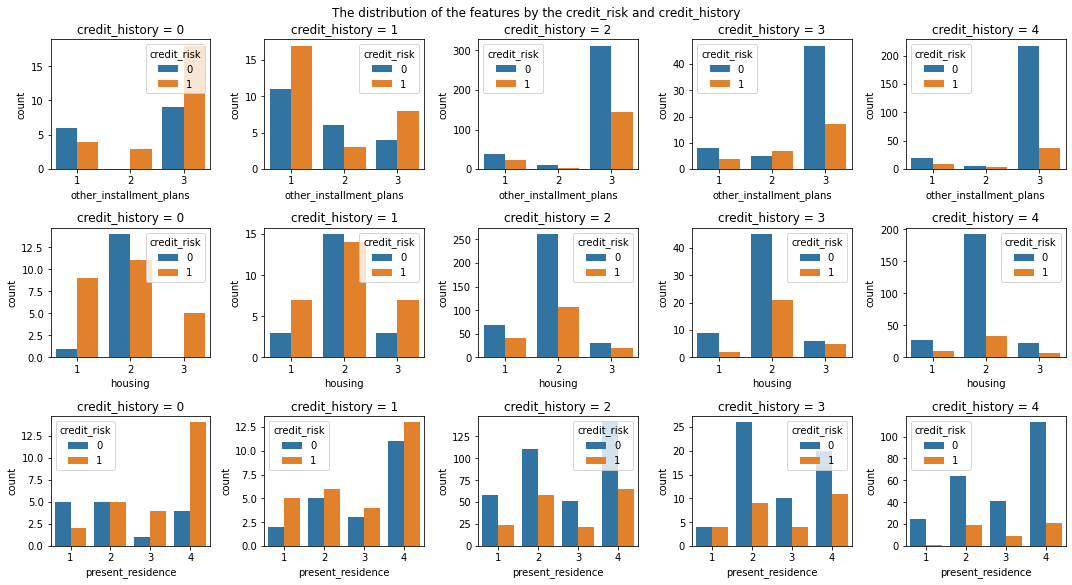

In [127]:
col_list = [col for col in data.columns if col not in ['credit_risk', 'credit_history']][16:]
plot_multivariate(data=data, gfeat='credit_history', col_list=col_list, fig_size=(15, 8))

Judging by the plots above people_liable, telephone, and foreign_worker can be helpful in iteraction with credit_history: distribution of each feature varies by credit_history. 

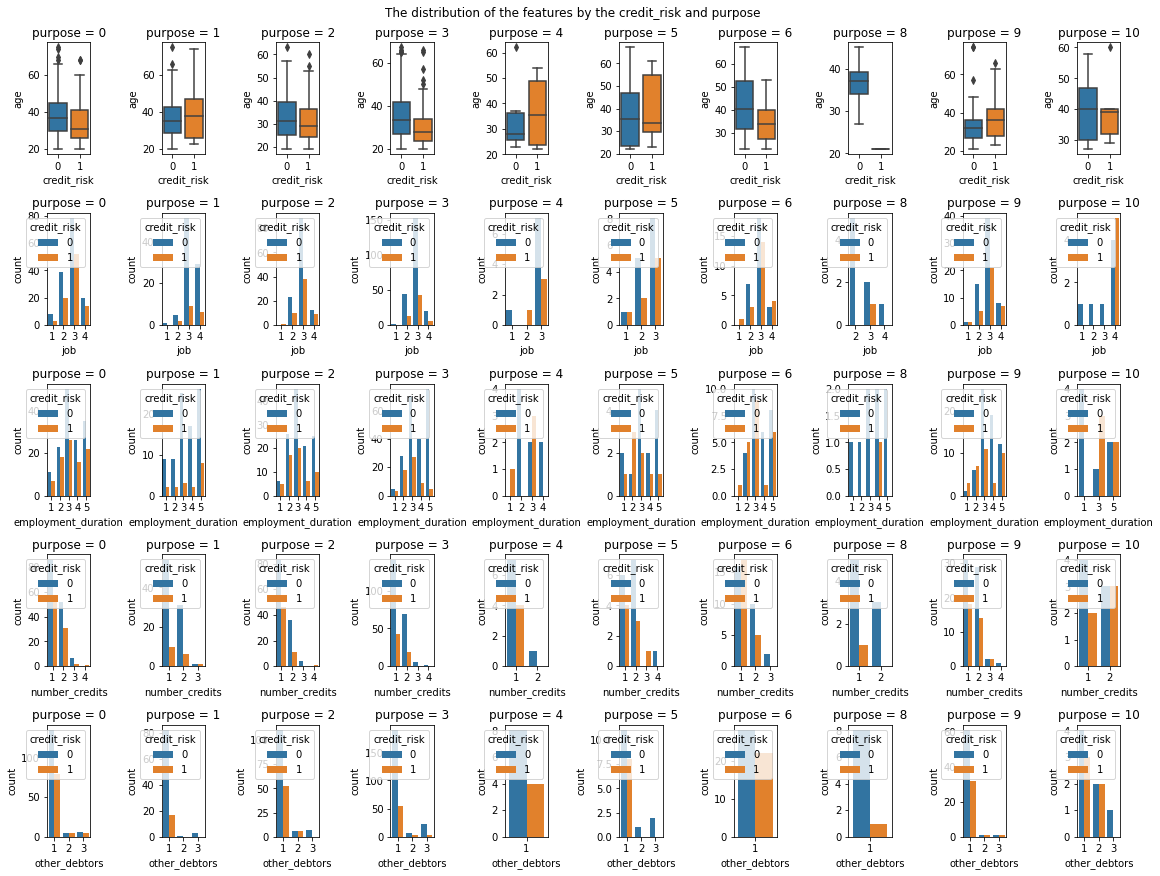

In [128]:
col_list = [col for col in data.columns if col not in ['credit_risk', 'purpose']][:5]
plot_multivariate(data=data, gfeat='purpose', col_list=col_list, fig_size=(16, 12))

The plots above show that status, duration, credit_history, amount, and savings can be helpful in the prediction task if considered in iteraction with purpose: distribution of each feature varies by purpose.

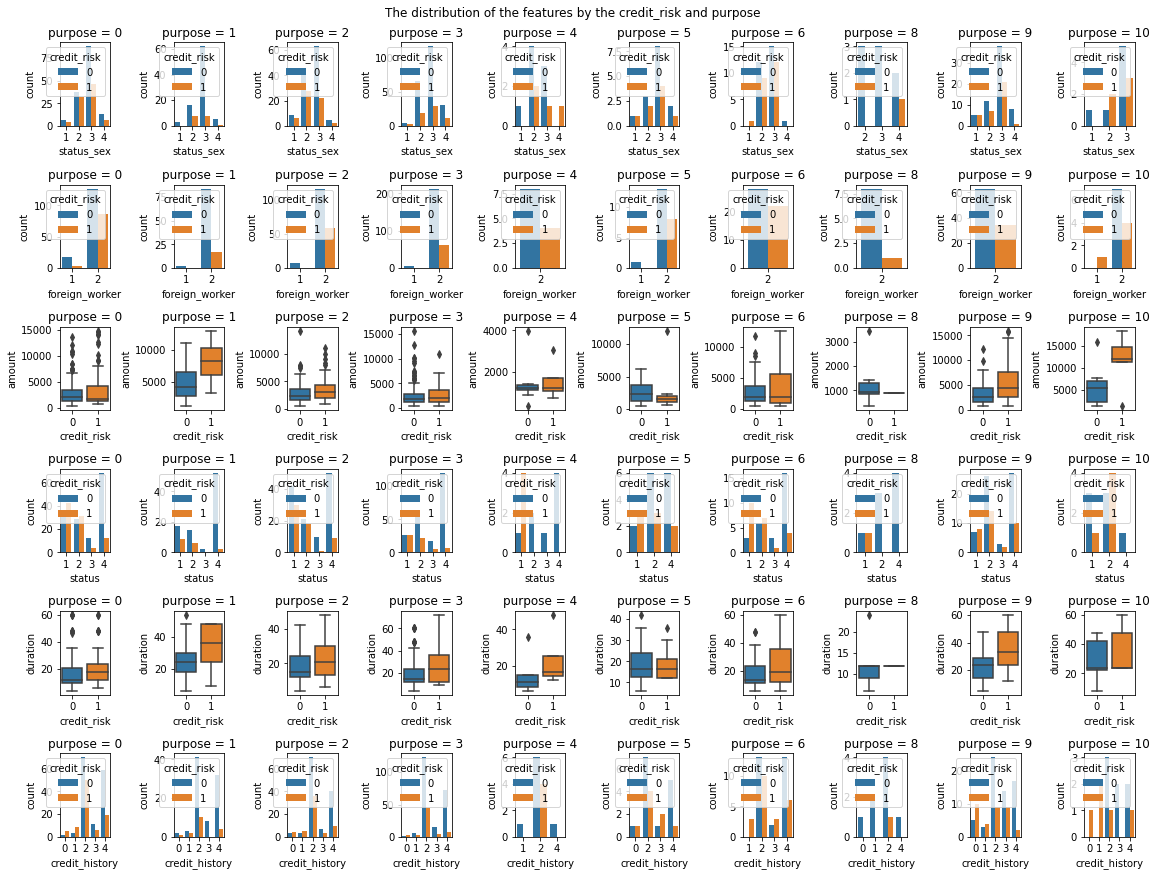

In [129]:
col_list = [col for col in data.columns if col not in ['credit_risk', 'purpose']][5:11]
plot_multivariate(data=data, gfeat='purpose', col_list=col_list, fig_size=(16, 12))

Judging by the plots above employment_duration, dti, status_sex, other_debtors, present_residency, and property
can be helpful in iteraction with purpose: distribution of each feature varies by purpose.

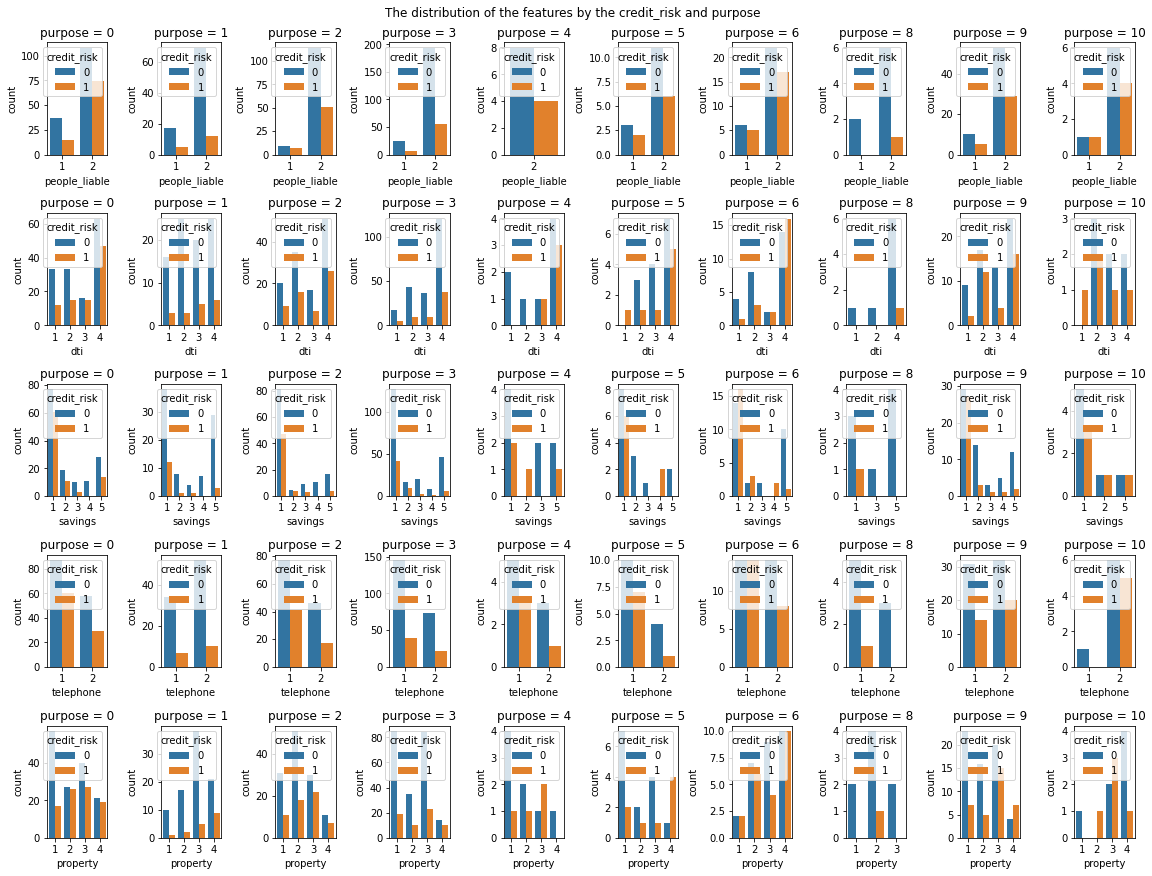

In [130]:
col_list = [col for col in data.columns if col not in ['credit_risk', 'purpose']][11:16]
plot_multivariate(data=data, gfeat='purpose', col_list=col_list, fig_size=(16, 12))

The plots above show that age, other_installment_plans, housing, number_credits, and job can be helpful
in the prediction task if considered in iteraction with credit_history: distribution of each feature varies by purpose.

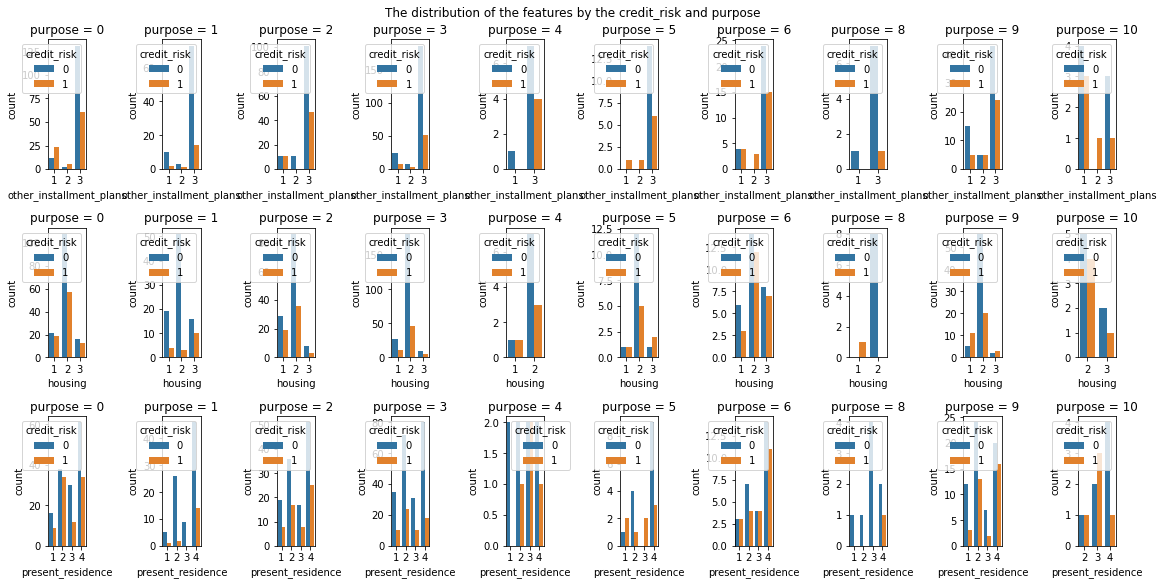

In [131]:
col_list = [col for col in data.columns if col not in ['credit_risk', 'purpose']][16:]
plot_multivariate(data=data, gfeat='purpose', col_list=col_list, fig_size=(16, 8))

Judging by the plots above people_liable, telephone, and foreign_worker can be helpful in iteraction with purpose: distribution of each feature varies by purpose.

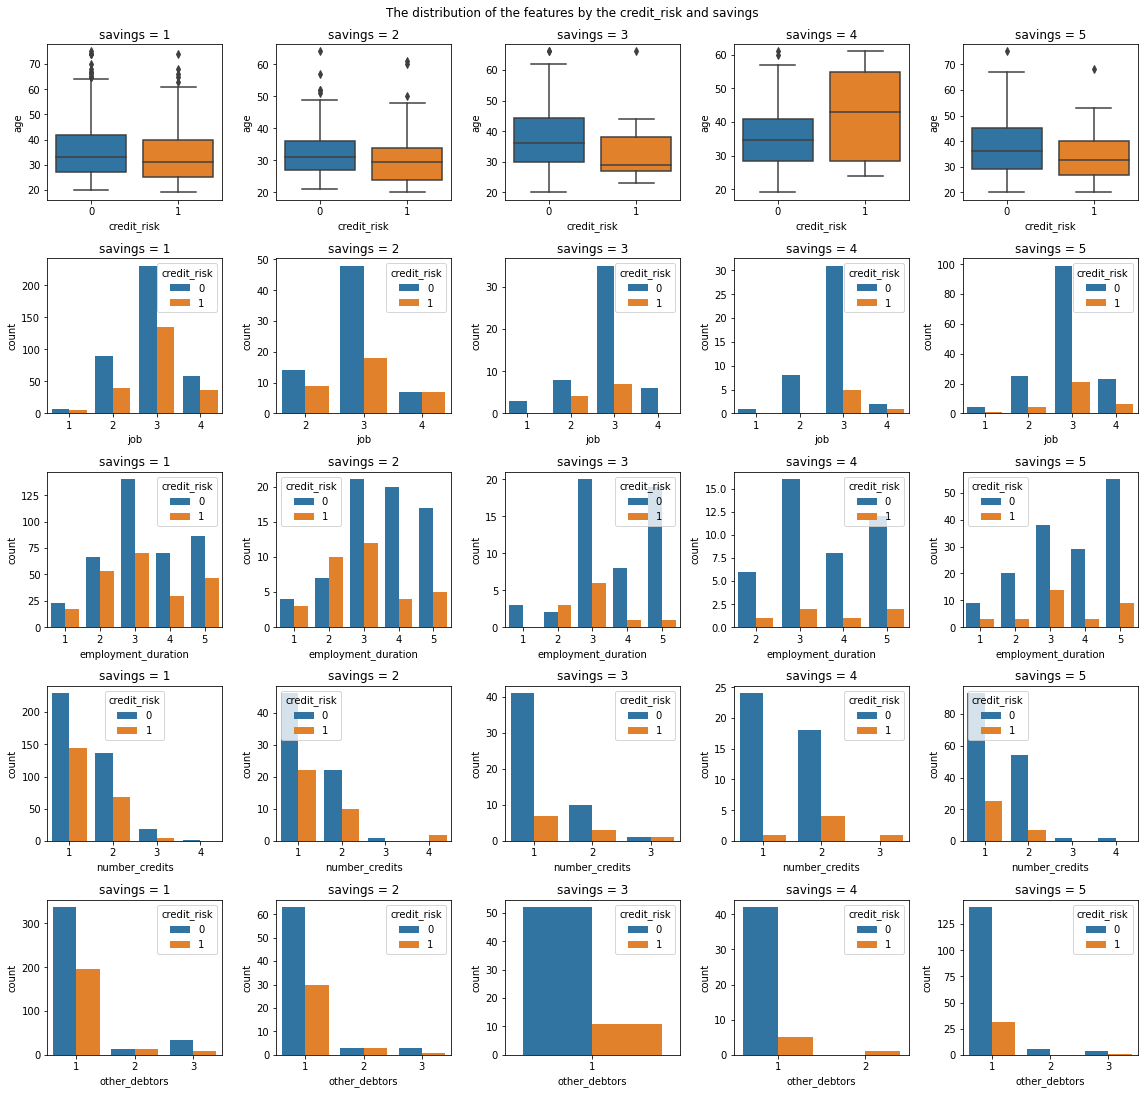

In [132]:
col_list = [col for col in data.columns if col not in ['credit_risk', 'savings']][:5]
plot_multivariate(data=data, gfeat='savings', col_list=col_list, fig_size=(16, 15))

The plots above show that status, duration, credit_history, amount, and purpose can be helpful in the prediction task if considered in iteraction with savings: distribution of each feature varies by savings.

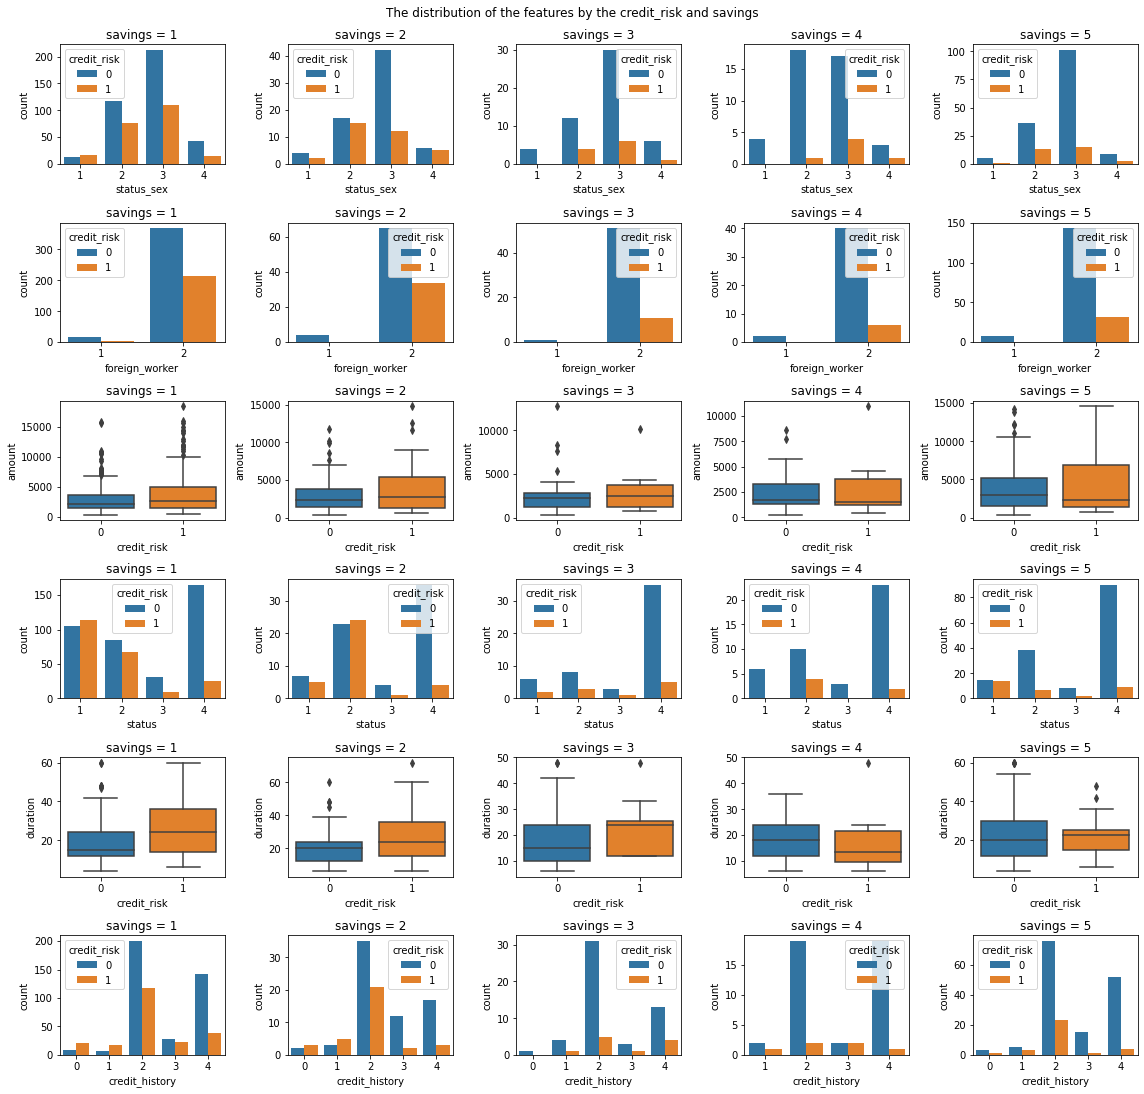

In [133]:
col_list = [col for col in data.columns if col not in ['credit_risk', 'savings']][5:11]
plot_multivariate(data=data, gfeat='savings', col_list=col_list, fig_size=(16, 15))

Judging by the plots above employment_duration, dti, status_sex, other_debtors, present_residency, and property
can be helpful in iteraction with purpose: distribution of each feature varies by savings.

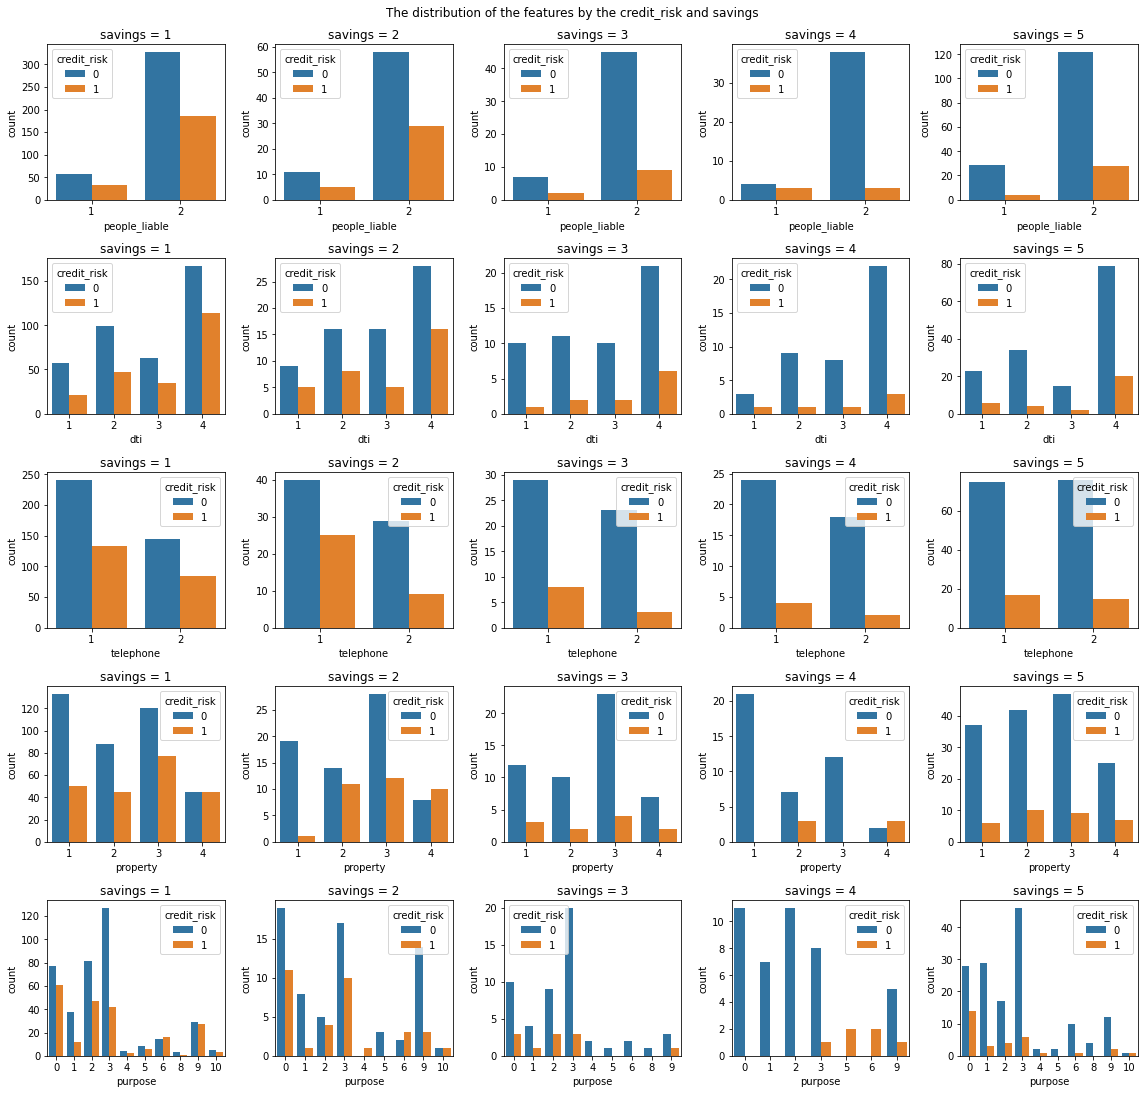

In [134]:
col_list = [col for col in data.columns if col not in ['credit_risk', 'savings']][11:16]
plot_multivariate(data=data, gfeat='savings', col_list=col_list, fig_size=(16, 15))

The plots above show that age, other_installment_plans, housing, number_credits, and job can be helpful
in the prediction task if considered in iteraction with savings: distribution of each feature varies by savings.

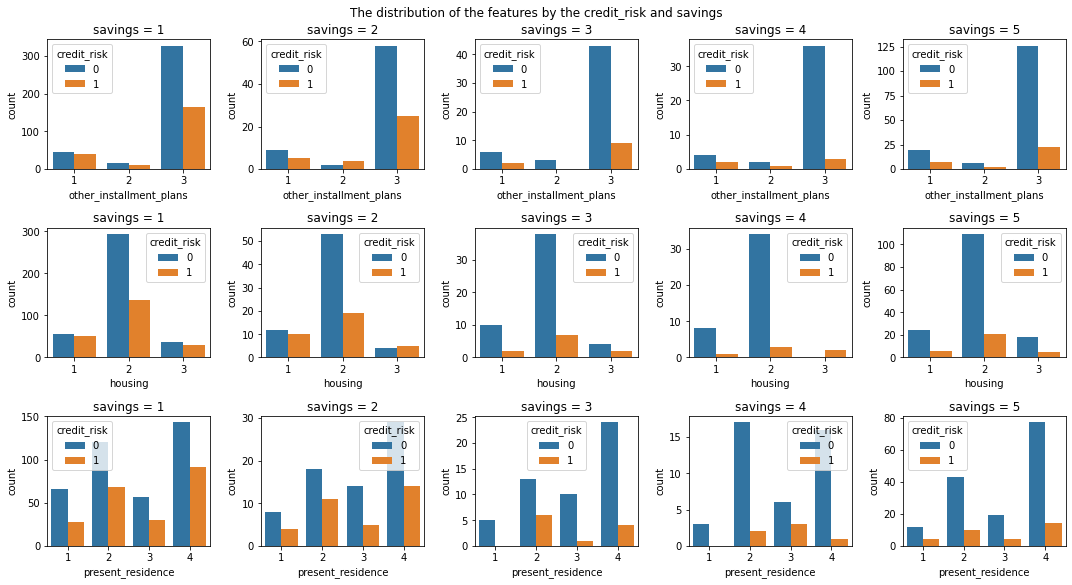

In [135]:
col_list = [col for col in data.columns if col not in ['credit_risk', 'savings']][16:]
plot_multivariate(data=data, gfeat='savings', col_list=col_list, fig_size=(15, 8))

Judging by the plots above people_liable, telephone, and foreign_worker can be helpful in iteraction with savings: distribution of each feature varies by savings.

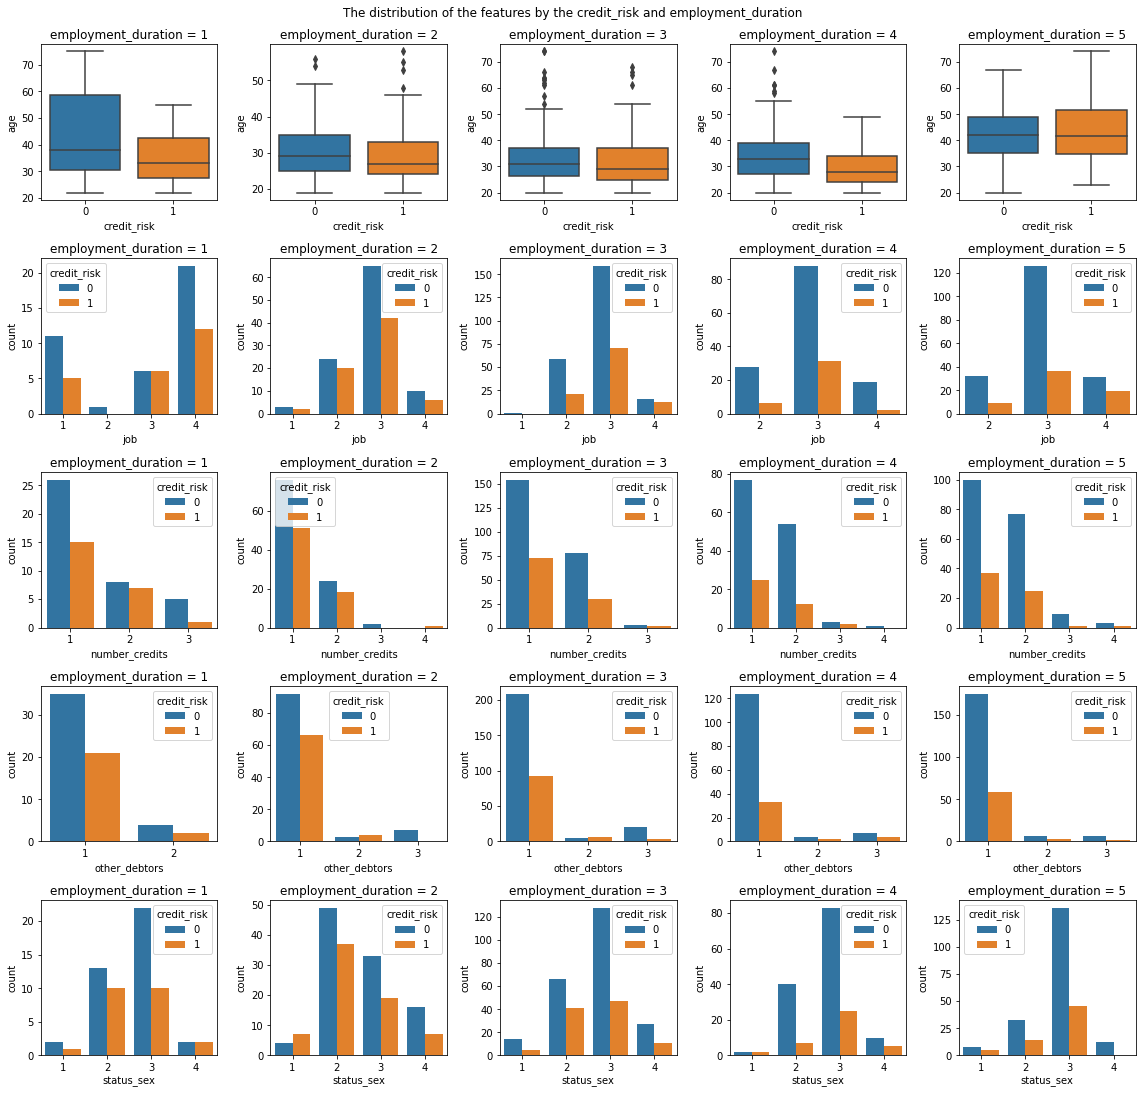

In [136]:
col_list = [col for col in data.columns if col not in ['credit_risk', 'employment_duration']][:5]
plot_multivariate(data=data, gfeat='employment_duration', col_list=col_list, fig_size=(16, 15))

The plots above show that status, duration, credit_history, amount, and purpose can be helpful in the prediction task if considered in iteraction with employment_duration: distribution of each feature varies by employment_duration.

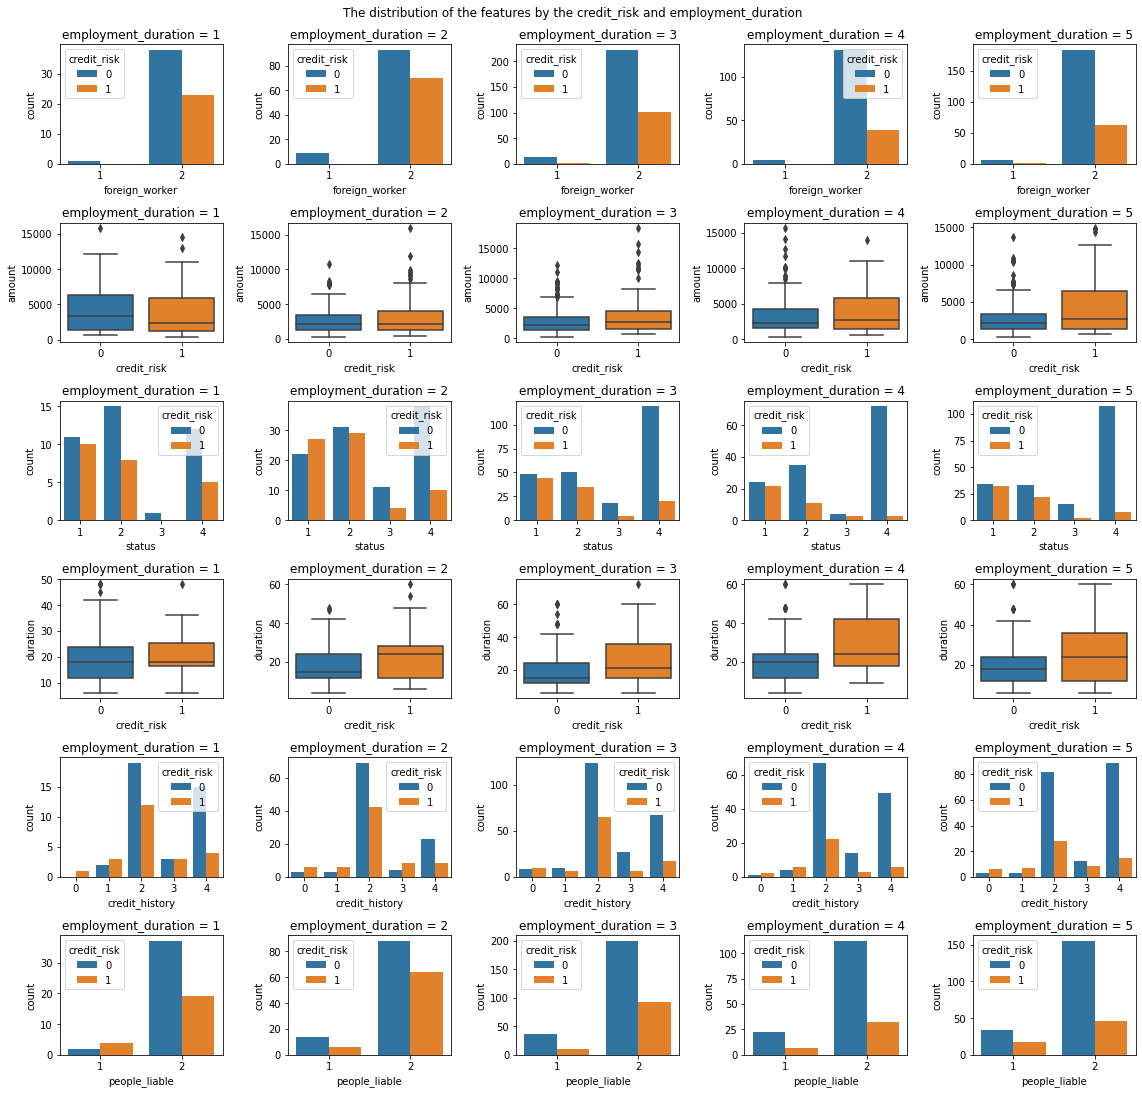

In [137]:
col_list = [col for col in data.columns if col not in ['credit_risk', 'employment_duration']][5:11]
plot_multivariate(data=data, gfeat='employment_duration', col_list=col_list, fig_size=(16, 15))

Judging by the plots above savings, dti, status_sex, other_debtors, present_residency, and property
can be helpful in iteraction with employment_duration: distribution of each feature varies by employment_duration.

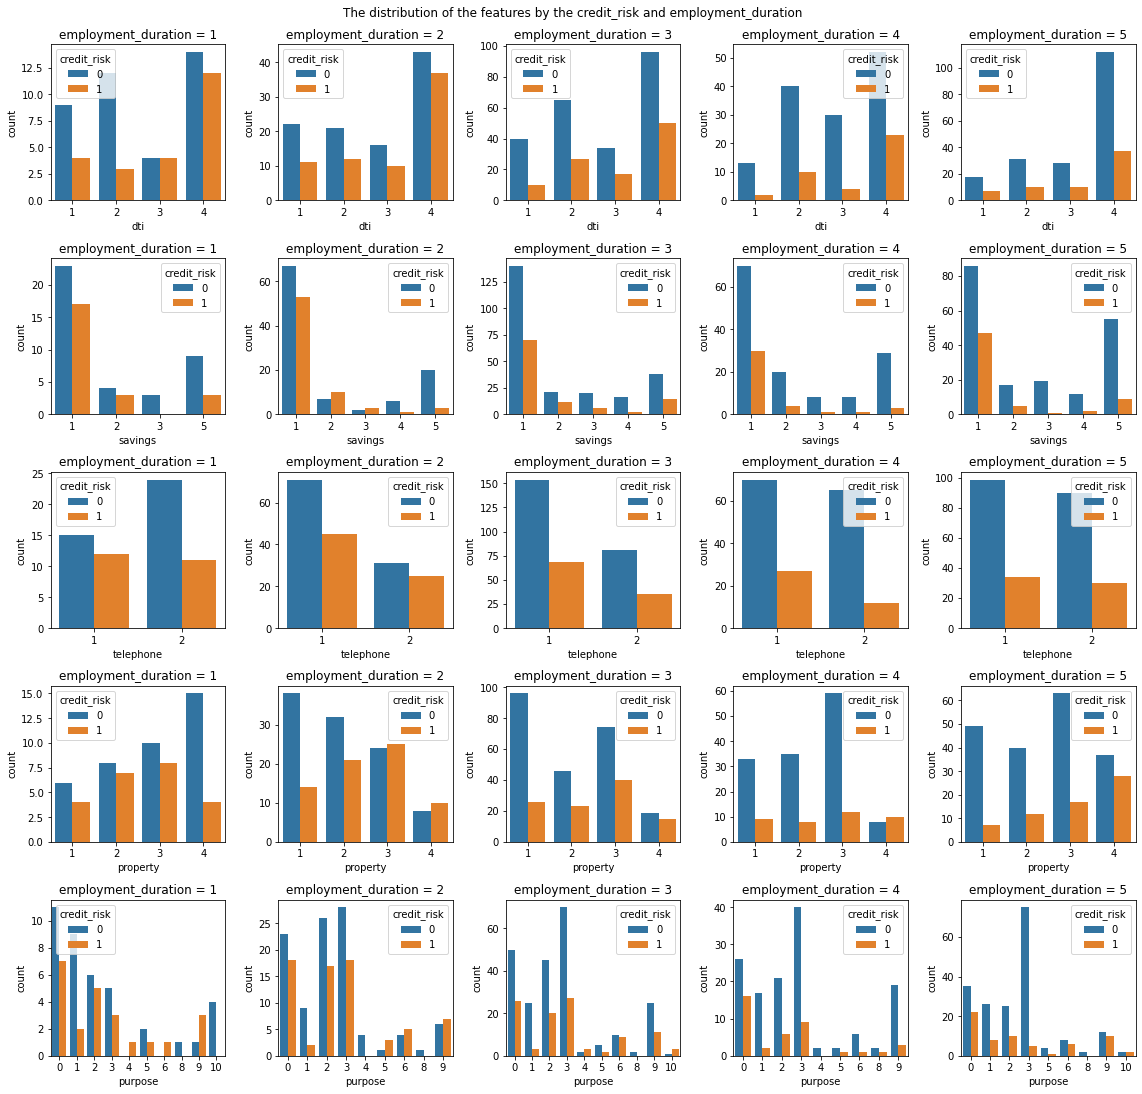

In [138]:
col_list = [col for col in data.columns if col not in ['credit_risk', 'employment_duration']][11:16]
plot_multivariate(data=data, gfeat='employment_duration', col_list=col_list, fig_size=(16, 15))

The plots above show that age, other_installment_plans, housing, number_credits, and job can be helpful in the prediction task if considered in iteraction with employment_duration: distribution of each feature varies by employment_duration.

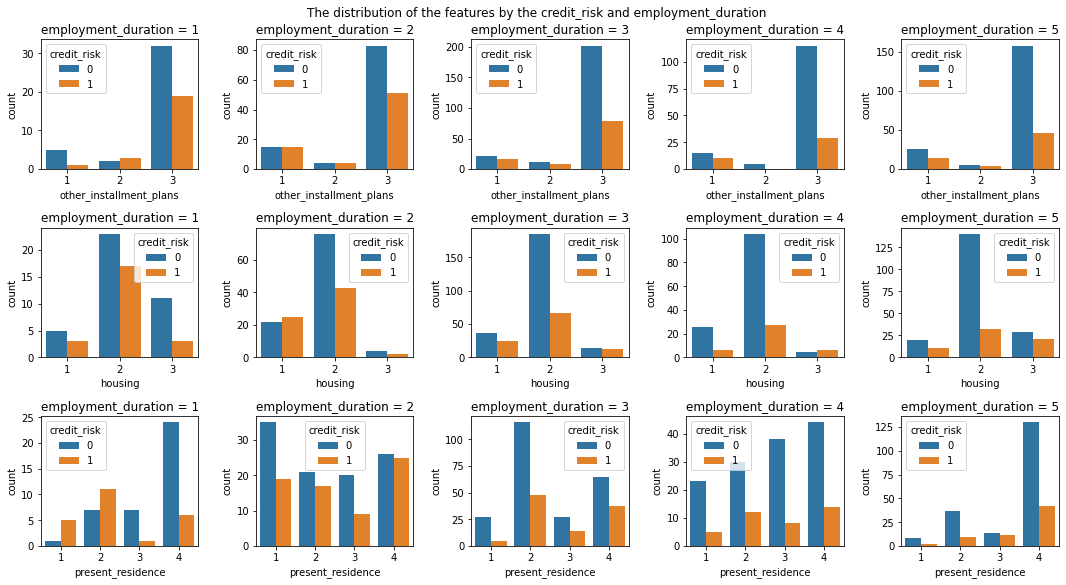

In [139]:
col_list = [col for col in data.columns if col not in ['credit_risk', 'employment_duration']][16:]
plot_multivariate(data=data, gfeat='employment_duration', col_list=col_list, fig_size=(15, 8))

Judging by the plots above people_liable, telephone, and foreign_worker can be helpful in iteraction with employment_duration: distribution of each feature varies by employment_duration.

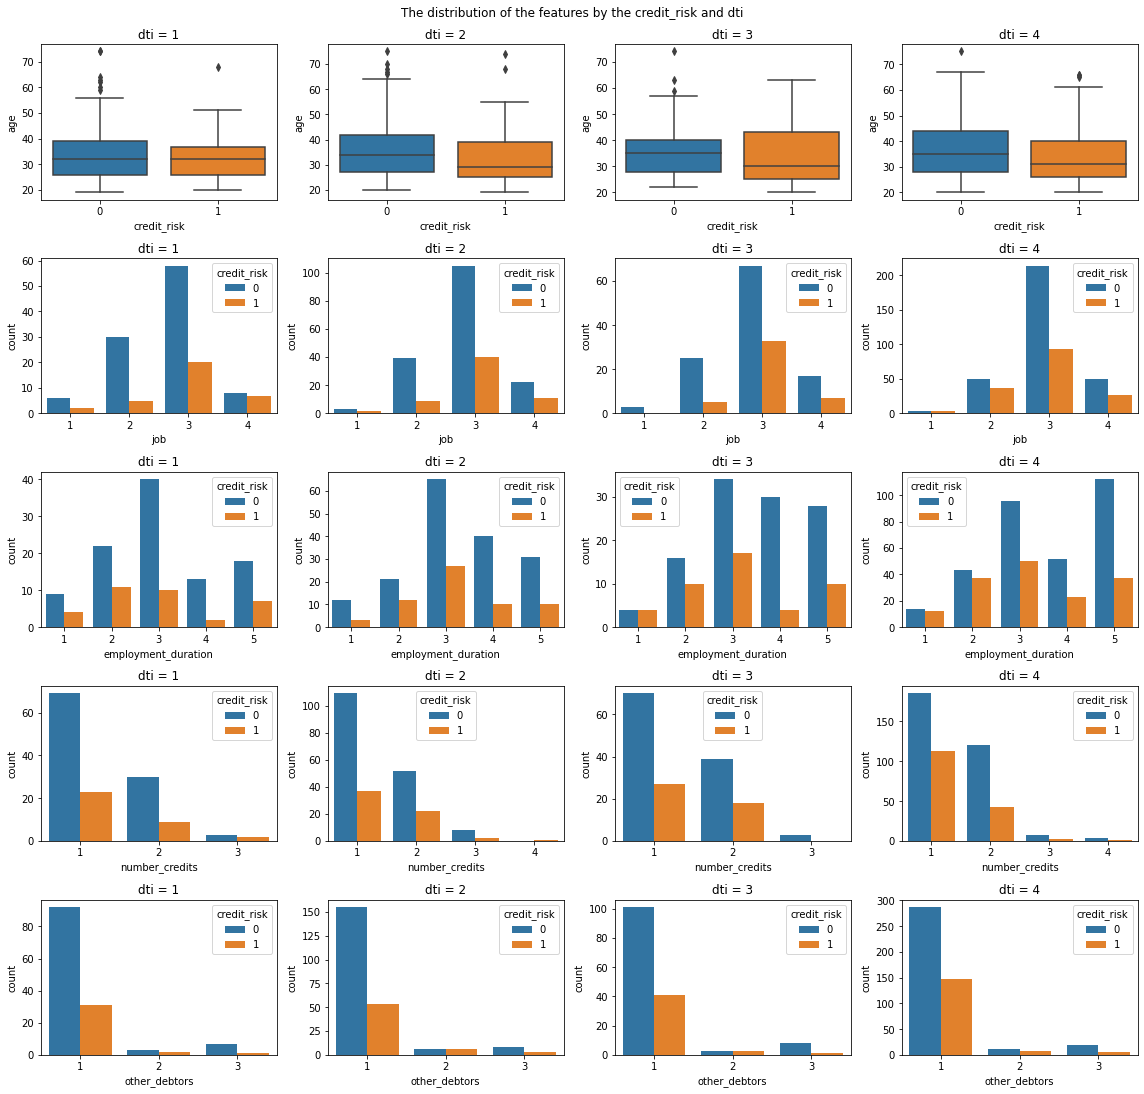

In [140]:
col_list = [col for col in data.columns if col not in ['credit_risk', 'dti']][:5]
plot_multivariate(data=data, gfeat='dti', col_list=col_list, fig_size=(16, 15))

The plots above show that status, duration, credit_history, amount, and purpose can be helpful in the prediction task if considered in iteraction with dti: distribution of each feature varies by dti.

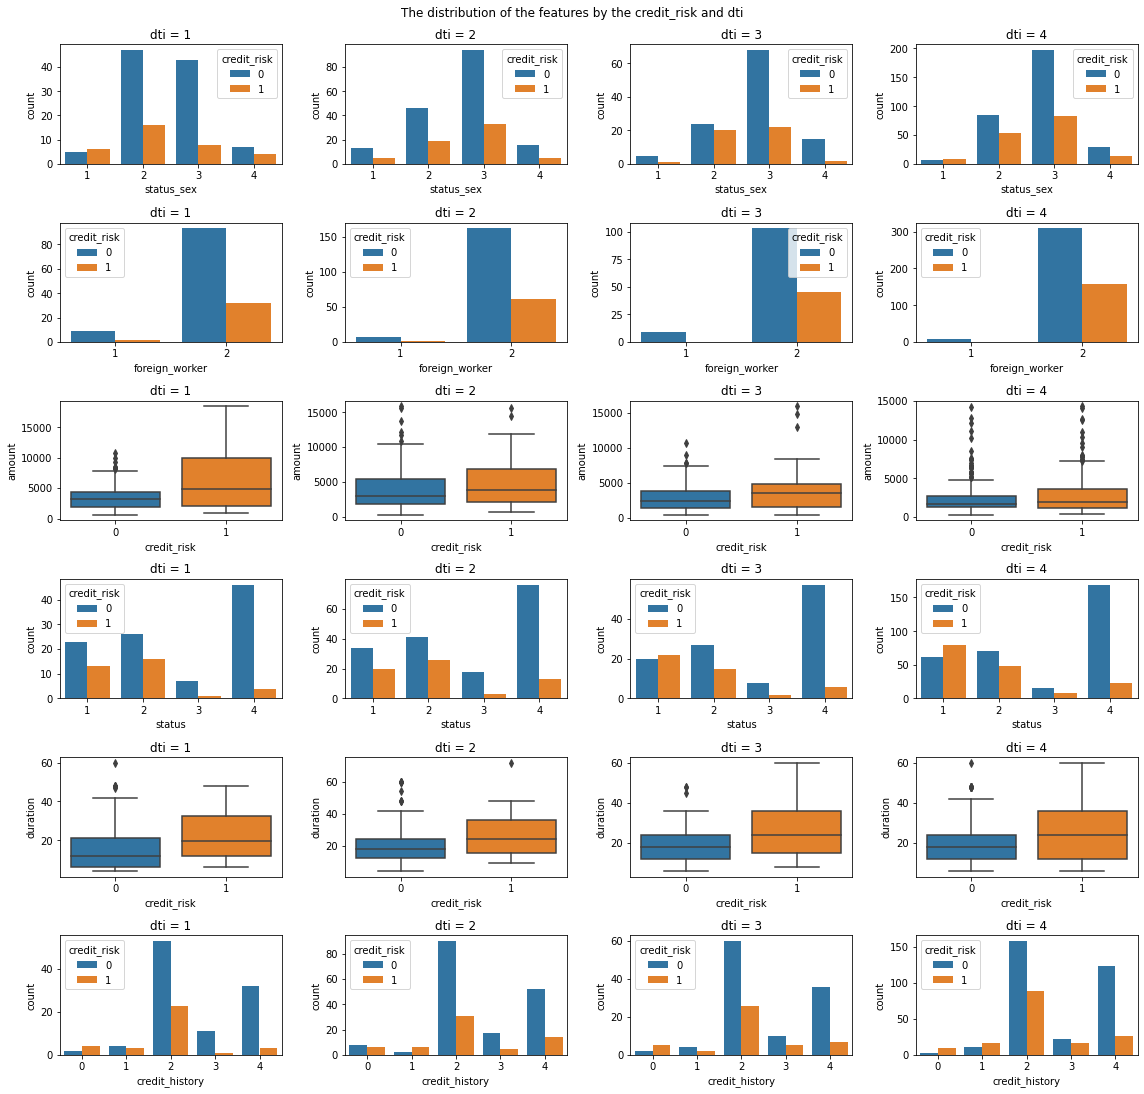

In [141]:
col_list = [col for col in data.columns if col not in ['credit_risk', 'dti']][5:11]
plot_multivariate(data=data, gfeat='dti', col_list=col_list, fig_size=(16, 15))

Judging by the plots above savings, employment_duration, status_sex, other_debtors, present_residency, and property
can be helpful in iteraction with dti: distribution of each feature varies by dti.

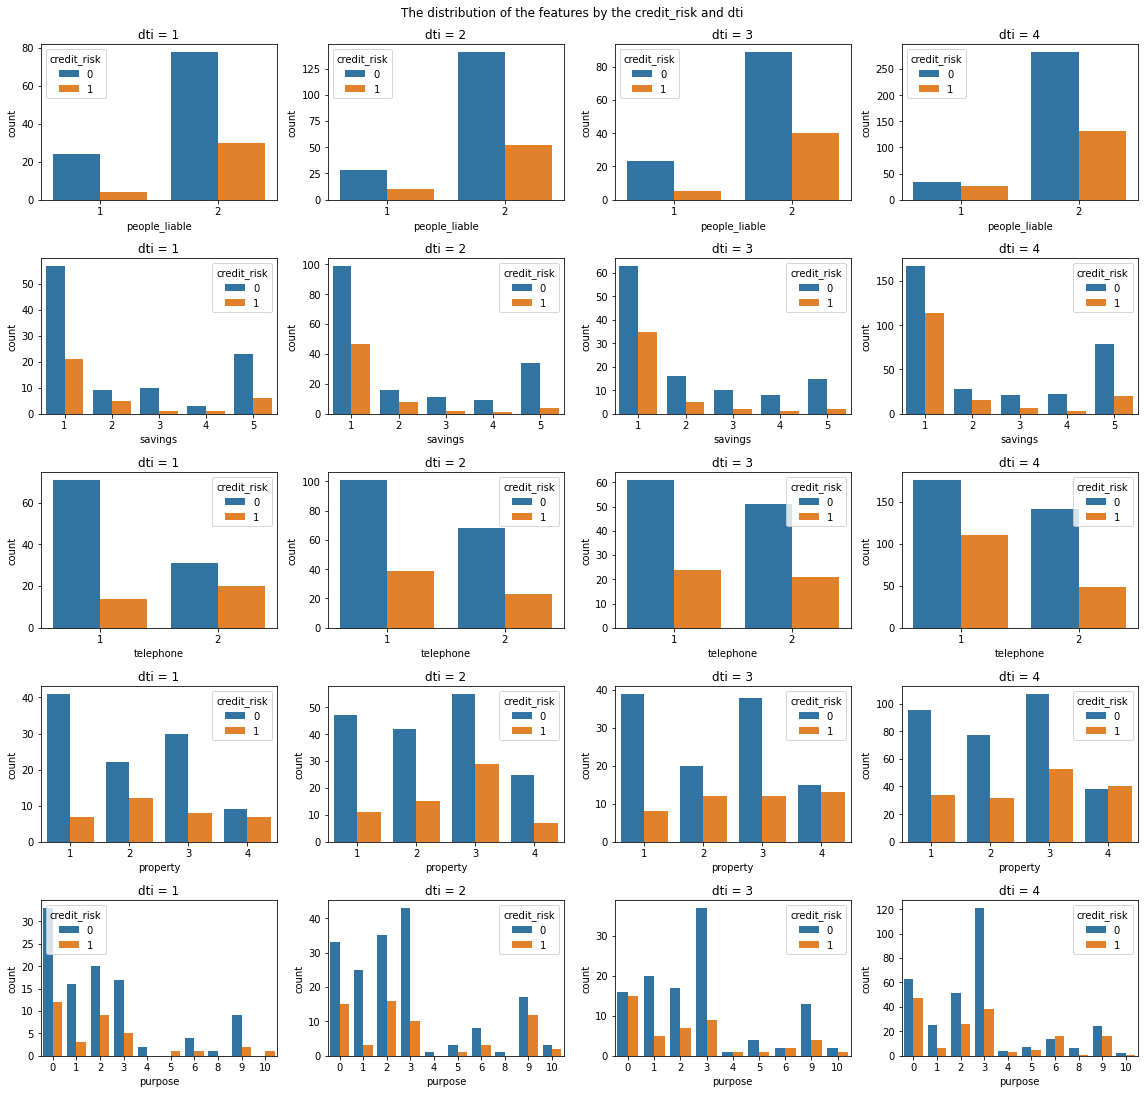

In [142]:
col_list = [col for col in data.columns if col not in ['credit_risk', 'dti']][11:16]
plot_multivariate(data=data, gfeat='dti', col_list=col_list, fig_size=(16, 15))

The plots above show that age, other_installment_plans, housing, number_credits, and job can be helpful in the prediction task if considered in iteraction with dti: 
distribution of each feature varies by dti.

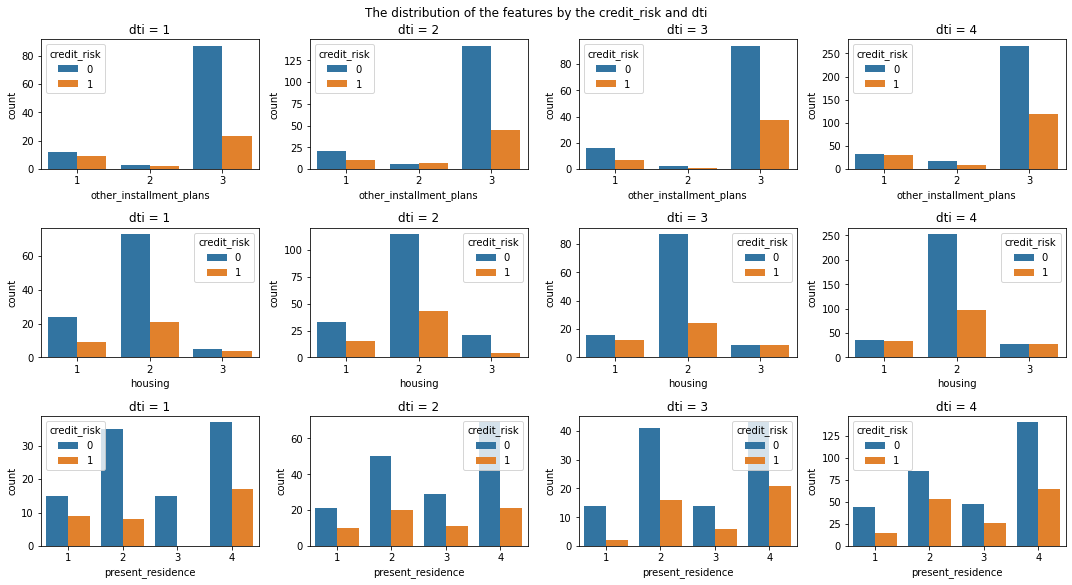

In [143]:
col_list = [col for col in data.columns if col not in ['credit_risk', 'dti']][16:]
plot_multivariate(data=data, gfeat='dti', col_list=col_list, fig_size=(15, 8))

Judging by the plots above people_liable, telephone, and foreign_worker can be helpful in iteraction with dti: 
distribution of each feature varies by dti.

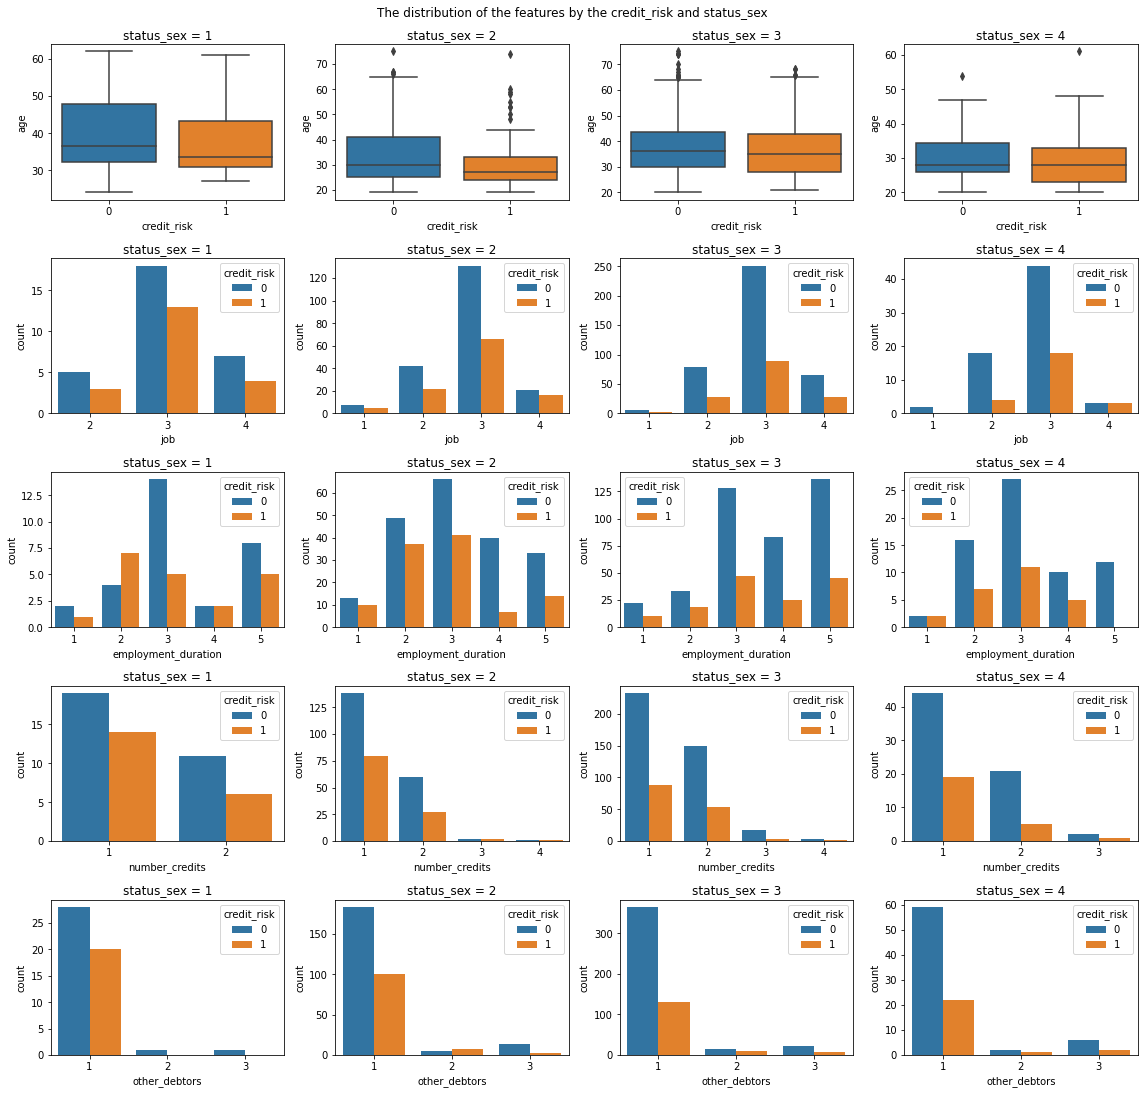

In [144]:
col_list = [col for col in data.columns if col not in ['credit_risk', 'status_sex']][:5]
plot_multivariate(data=data, gfeat='status_sex', col_list=col_list, fig_size=(16, 15))

The plots above show that status, duration, credit_history, amount, and purpose can be helpful
in the prediction task if considered in iteraction with status_sex: 
distribution of each feature varies by status_sex.

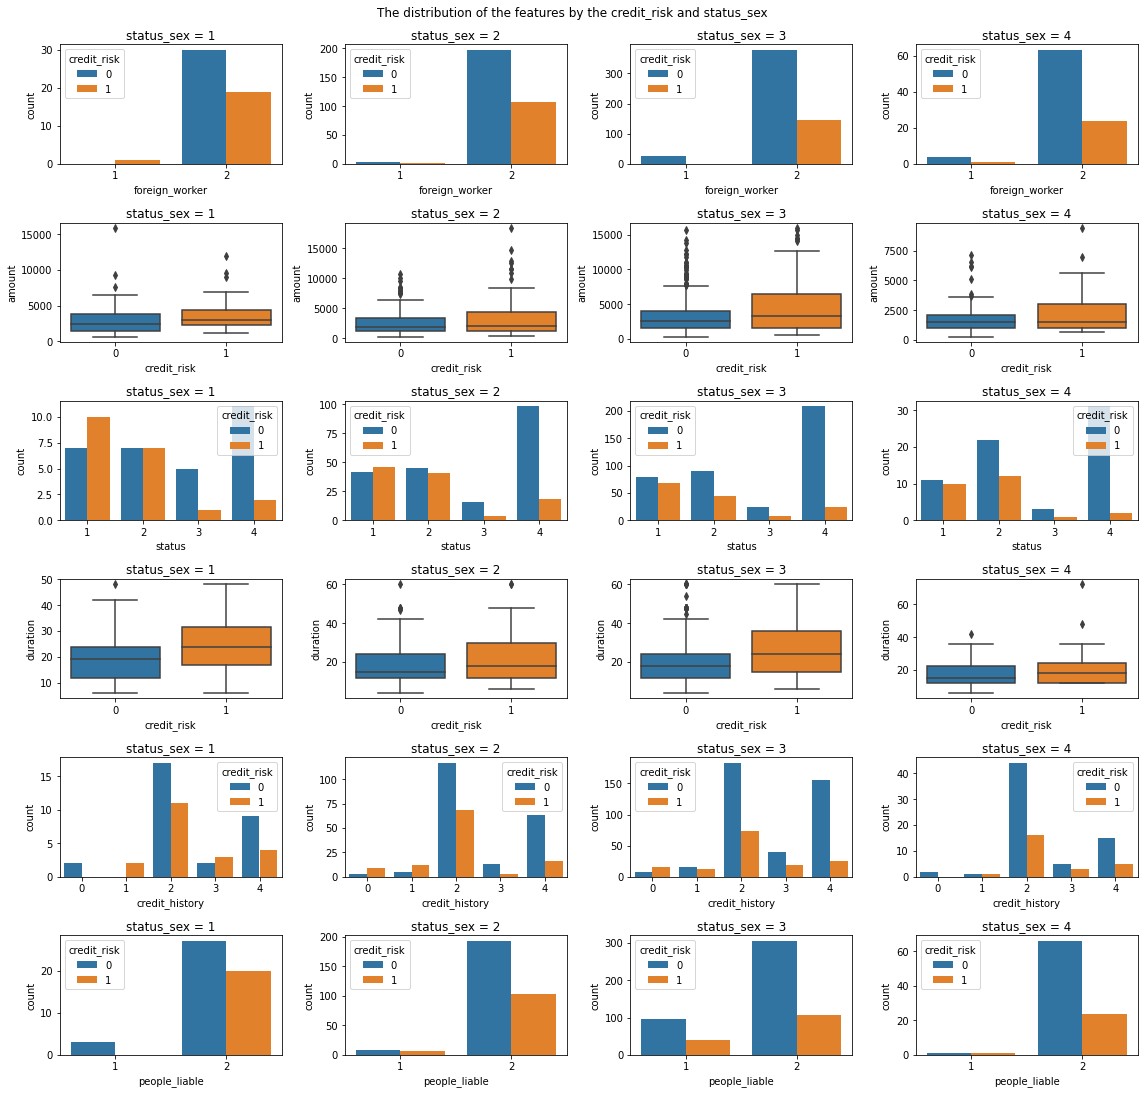

In [145]:
col_list = [col for col in data.columns if col not in ['credit_risk', 'status_sex']][5:11]
plot_multivariate(data=data, gfeat='status_sex', col_list=col_list, fig_size=(16, 15))

Judging by the plots above savings, employment_duration, dti, other_debtors, 
present_residency, and property
can be helpful in iteraction with status_sex: 
distribution of each feature varies by status_sex.

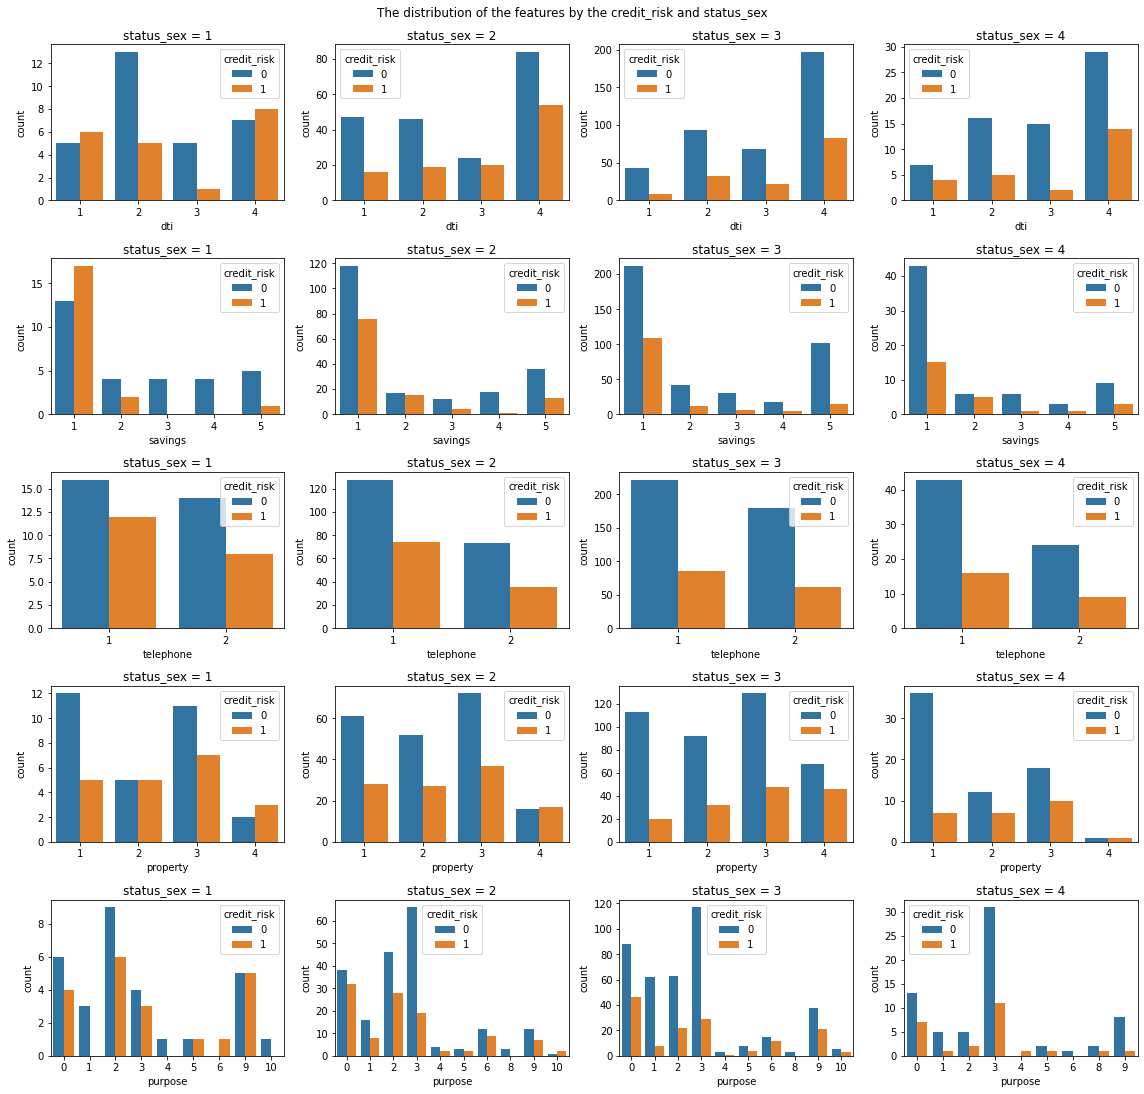

In [146]:
col_list = [col for col in data.columns if col not in ['credit_risk', 'status_sex']][11:16]
plot_multivariate(data=data, gfeat='status_sex', col_list=col_list, fig_size=(16, 15))

The plots above show that age, other_installment_plans, housing, number_credits, and job
can be helpful
in the prediction task if considered in iteraction with status_sex: 
distribution of each feature varies by status_sex.

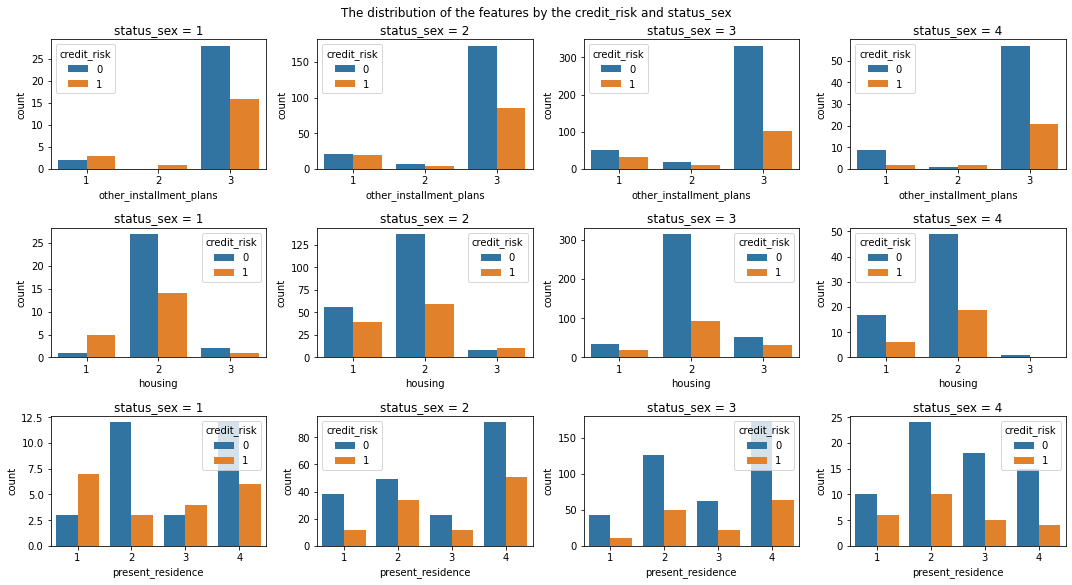

In [147]:
col_list = [col for col in data.columns if col not in ['credit_risk', 'status_sex']][16:]
plot_multivariate(data=data, gfeat='status_sex', col_list=col_list, fig_size=(15, 8))

Judging by the plots above people_liable, telephone, and foreign_worker
can be helpful in iteraction with status_sex: 
distribution of each feature varies by status_sex.

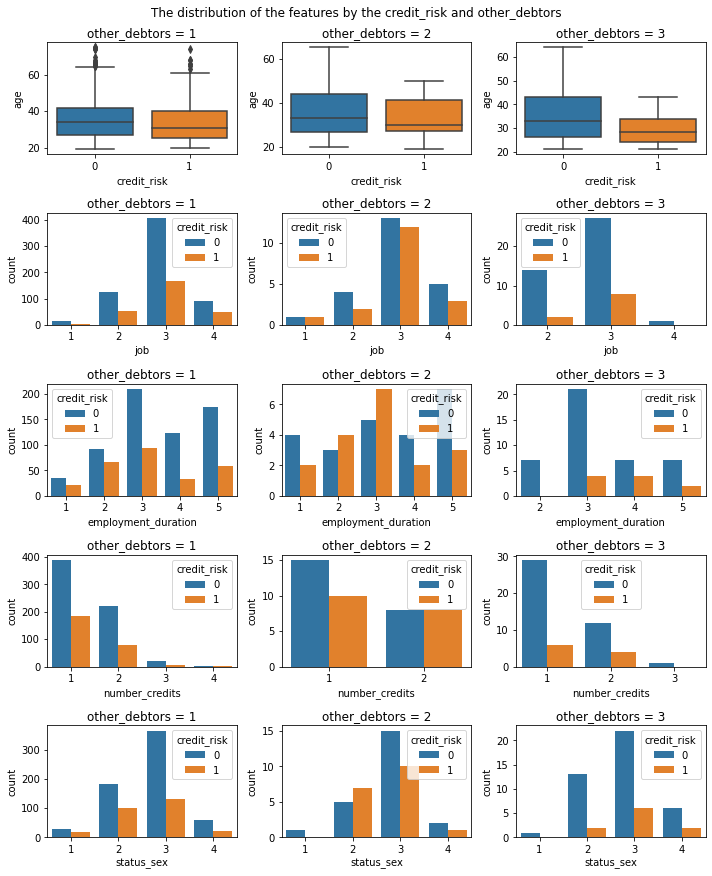

In [148]:
col_list = [col for col in data.columns if col not in ['credit_risk', 'other_debtors']][:5]
plot_multivariate(data=data, gfeat='other_debtors', col_list=col_list, fig_size=(10, 12))

The plots above show that status, duration, credit_history, amount, and purpose can be helpful
in the prediction task if considered in iteraction with other_debtors: 
distribution of each feature varies by other_debtors.

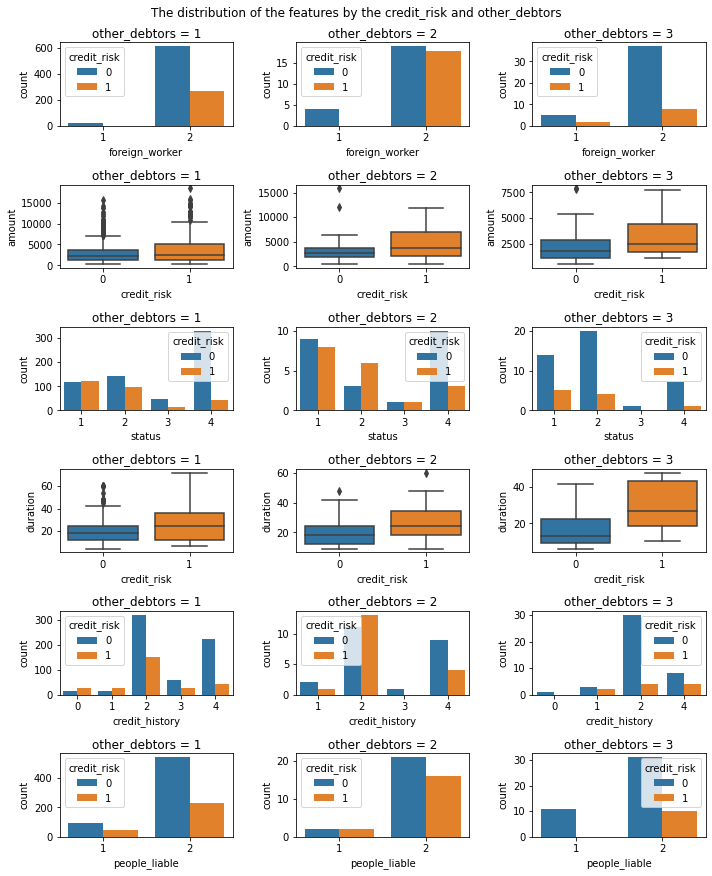

In [149]:
col_list = [col for col in data.columns if col not in ['credit_risk', 'other_debtors']][5:11]
plot_multivariate(data=data, gfeat='other_debtors', col_list=col_list, fig_size=(10, 12))

Judging by the plots above savings, employment_duration, dti, status_sex, 
present_residency, and property
can be helpful in iteraction with other_debtors: 
distribution of each feature varies by other_debtors.

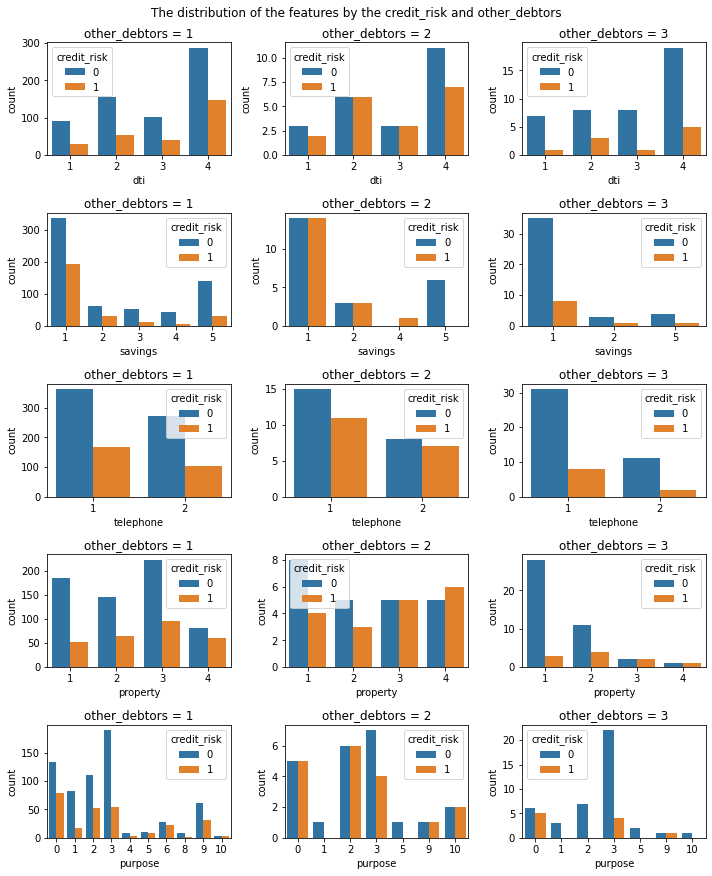

In [150]:
col_list = [col for col in data.columns if col not in ['credit_risk', 'other_debtors']][11:16]
plot_multivariate(data=data, gfeat='other_debtors', col_list=col_list, fig_size=(10, 12))

The plots above show that age, other_installment_plans, housing, number_credits, and job
can be helpful
in the prediction task if considered in iteraction with other_debtors: 
distribution of each feature varies by other_debtors.

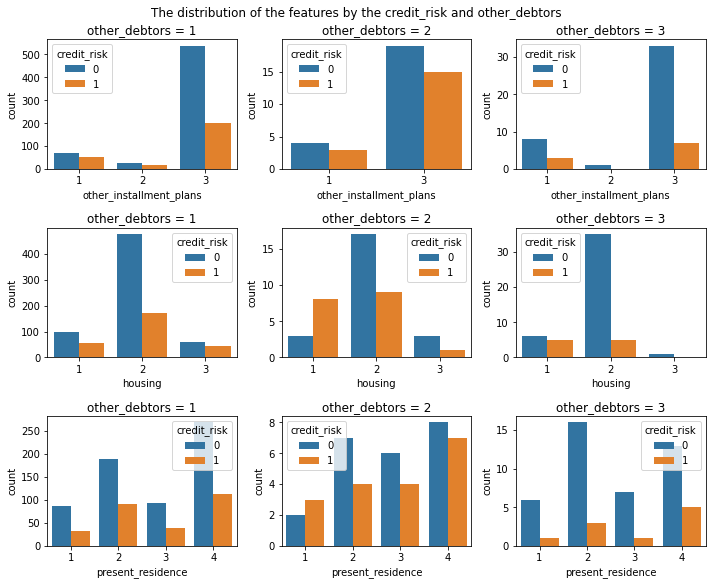

In [151]:
col_list = [col for col in data.columns if col not in ['credit_risk', 'other_debtors']][16:]
plot_multivariate(data=data, gfeat='other_debtors', col_list=col_list, fig_size=(10, 8))

Judging by the plots above people_liable, telephone, and foreign_worker
can be helpful in iteraction with other_debtors: 
distribution of each feature varies by other_debtors.

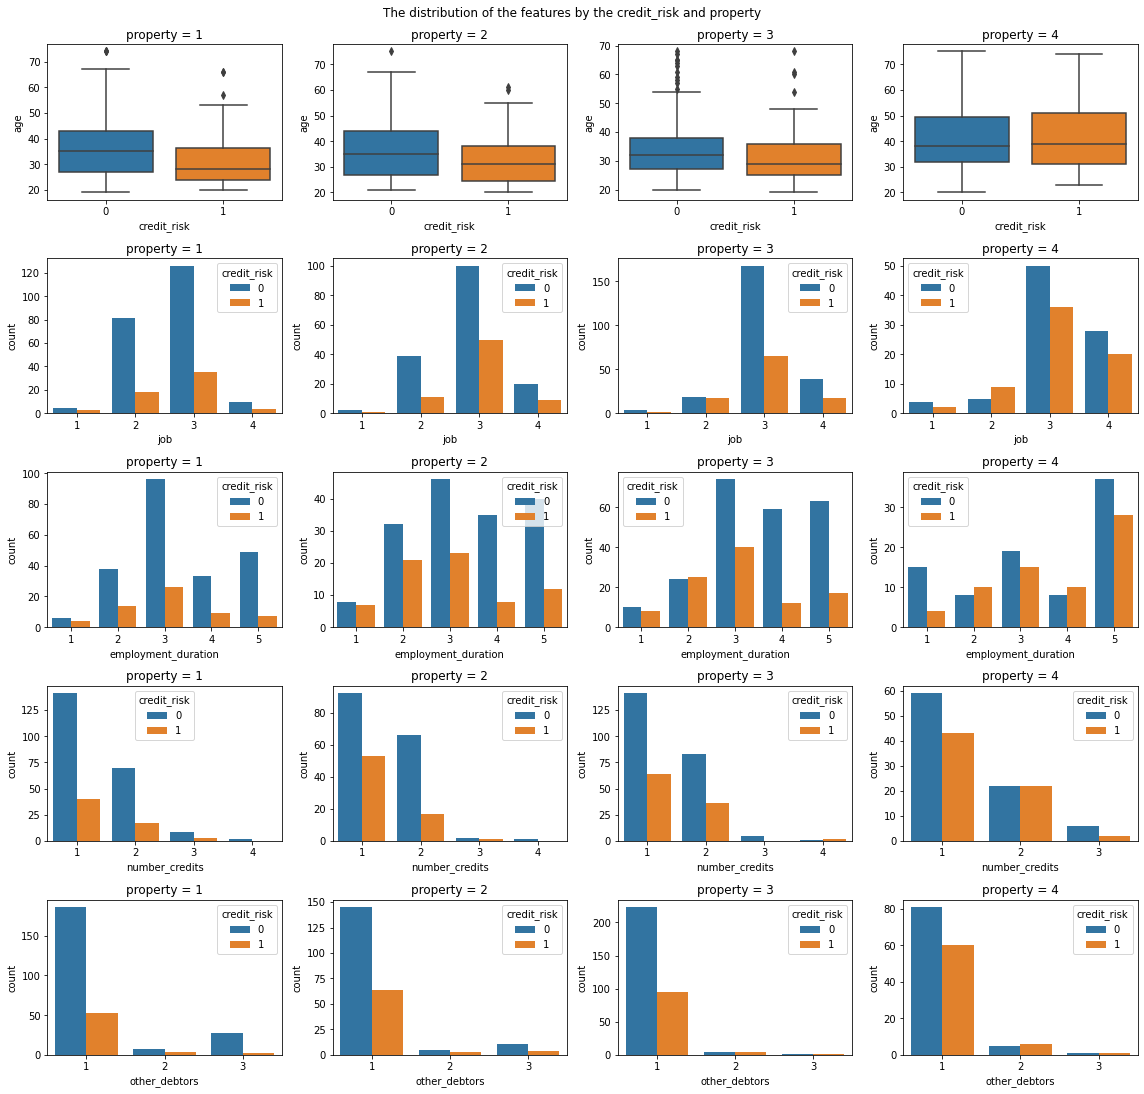

In [152]:
col_list = [col for col in data.columns if col not in ['credit_risk', 'property']][:5]
plot_multivariate(data=data, gfeat='property', col_list=col_list, fig_size=(16, 15))

The plots above show that status, duration, credit_history, amount, and purpose can be helpful
in the prediction task if considered in iteraction with property: 
distribution of each feature varies by property.

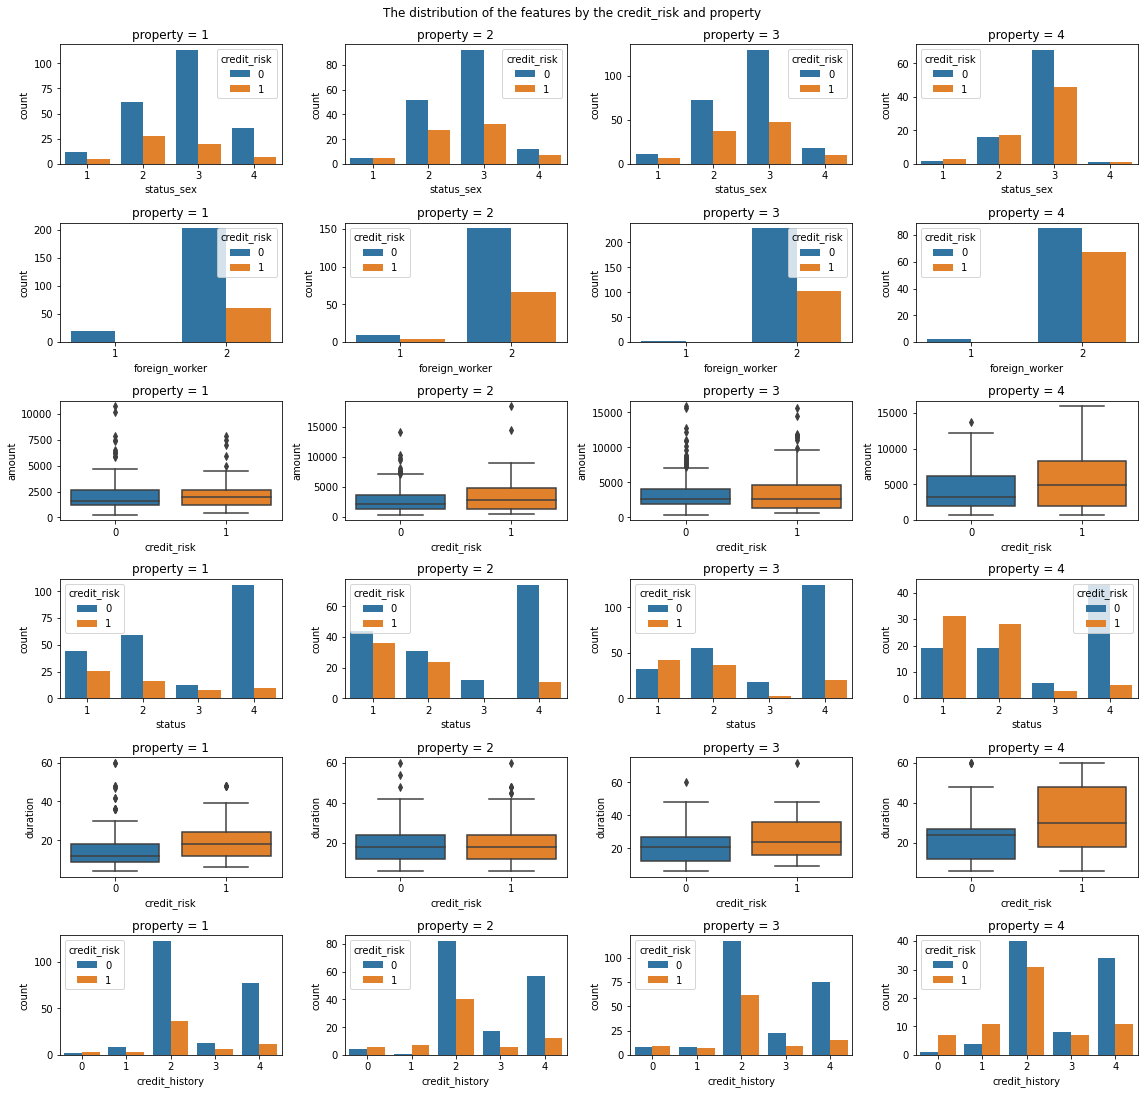

In [153]:
col_list = [col for col in data.columns if col not in ['credit_risk', 'property']][5:11]
plot_multivariate(data=data, gfeat='property', col_list=col_list, fig_size=(16, 15))

Judging by the plots above savings, employment_duration, dti, status_sex, 
present_residency, and other_debtors
can be helpful in iteraction with property: 
distribution of each feature varies by property.

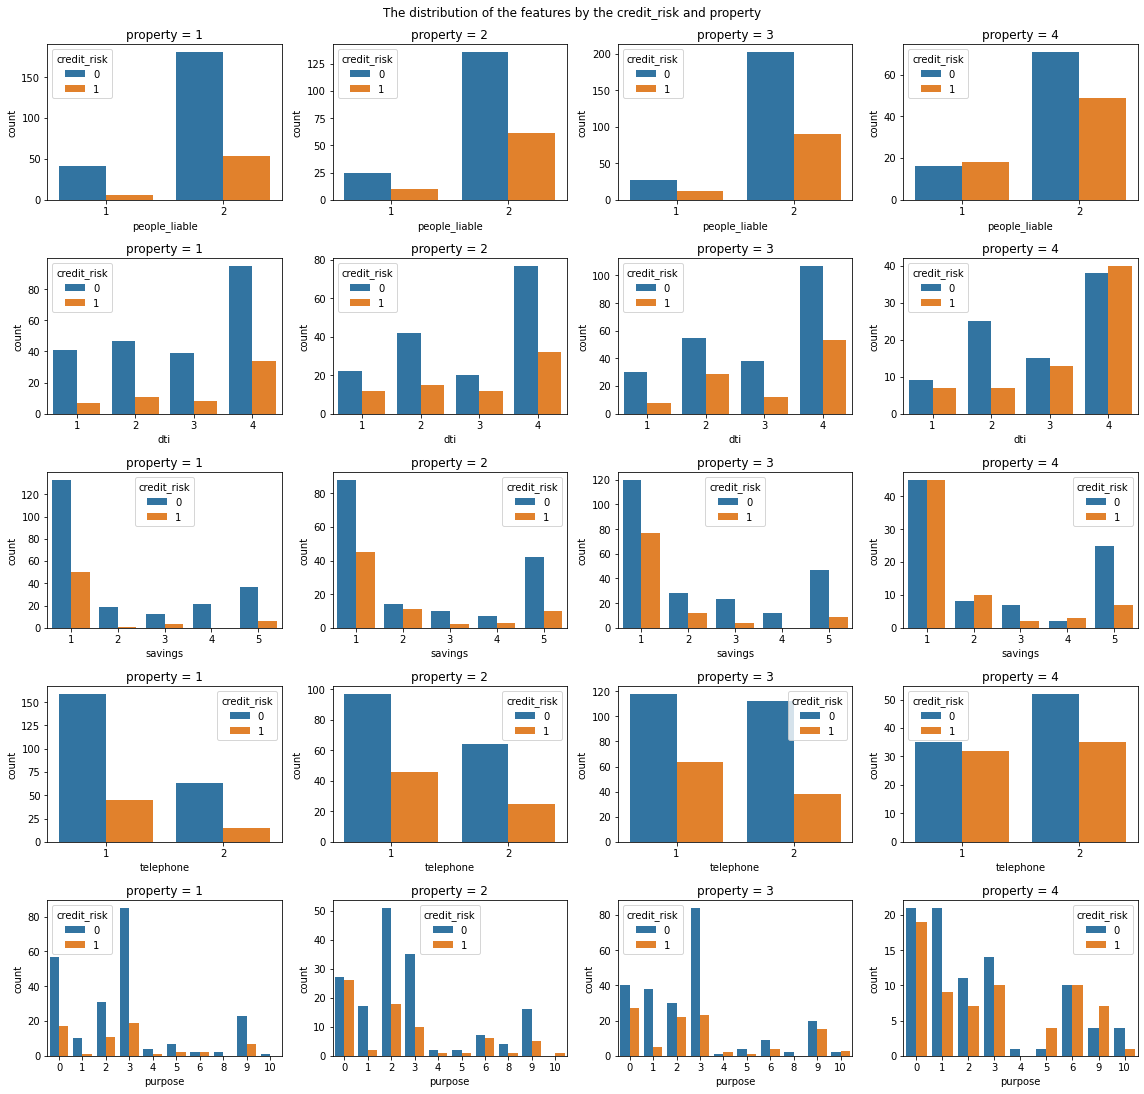

In [154]:
col_list = [col for col in data.columns if col not in ['credit_risk', 'property']][11:16]
plot_multivariate(data=data, gfeat='property', col_list=col_list, fig_size=(16, 15))

The plots above show that age, other_installment_plans, housing, number_credits, and job
can be helpful
in the prediction task if considered in iteraction with property: 
distribution of each feature varies by property.

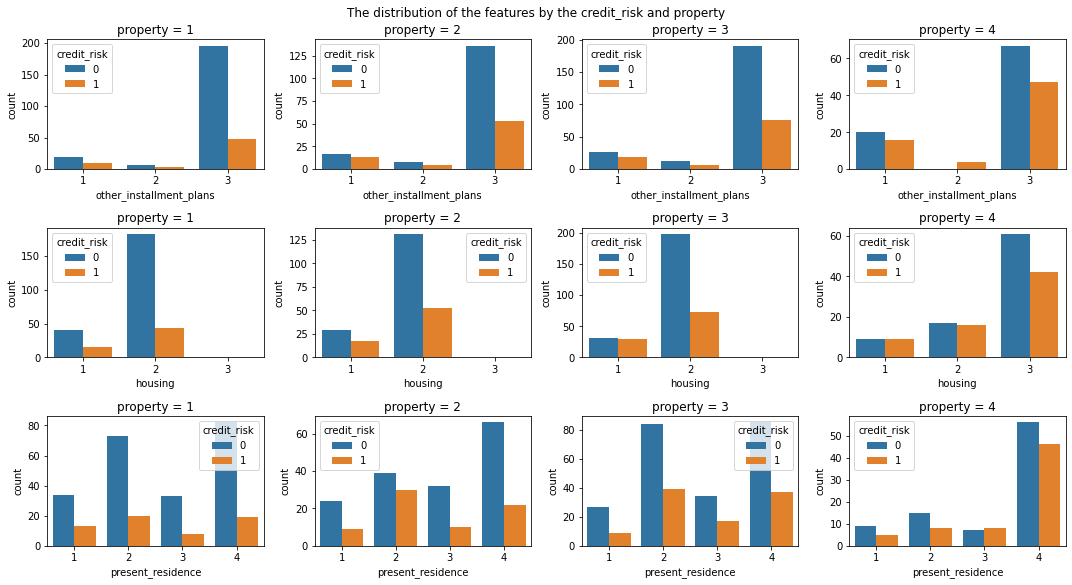

In [155]:
col_list = [col for col in data.columns if col not in ['credit_risk', 'property']][16:]
plot_multivariate(data=data, gfeat='property', col_list=col_list, fig_size=(15, 8))

Judging by the plots above people_liable, telephone, and foreign_worker
can be helpful in iteraction with property: 
distribution of each feature varies by property.

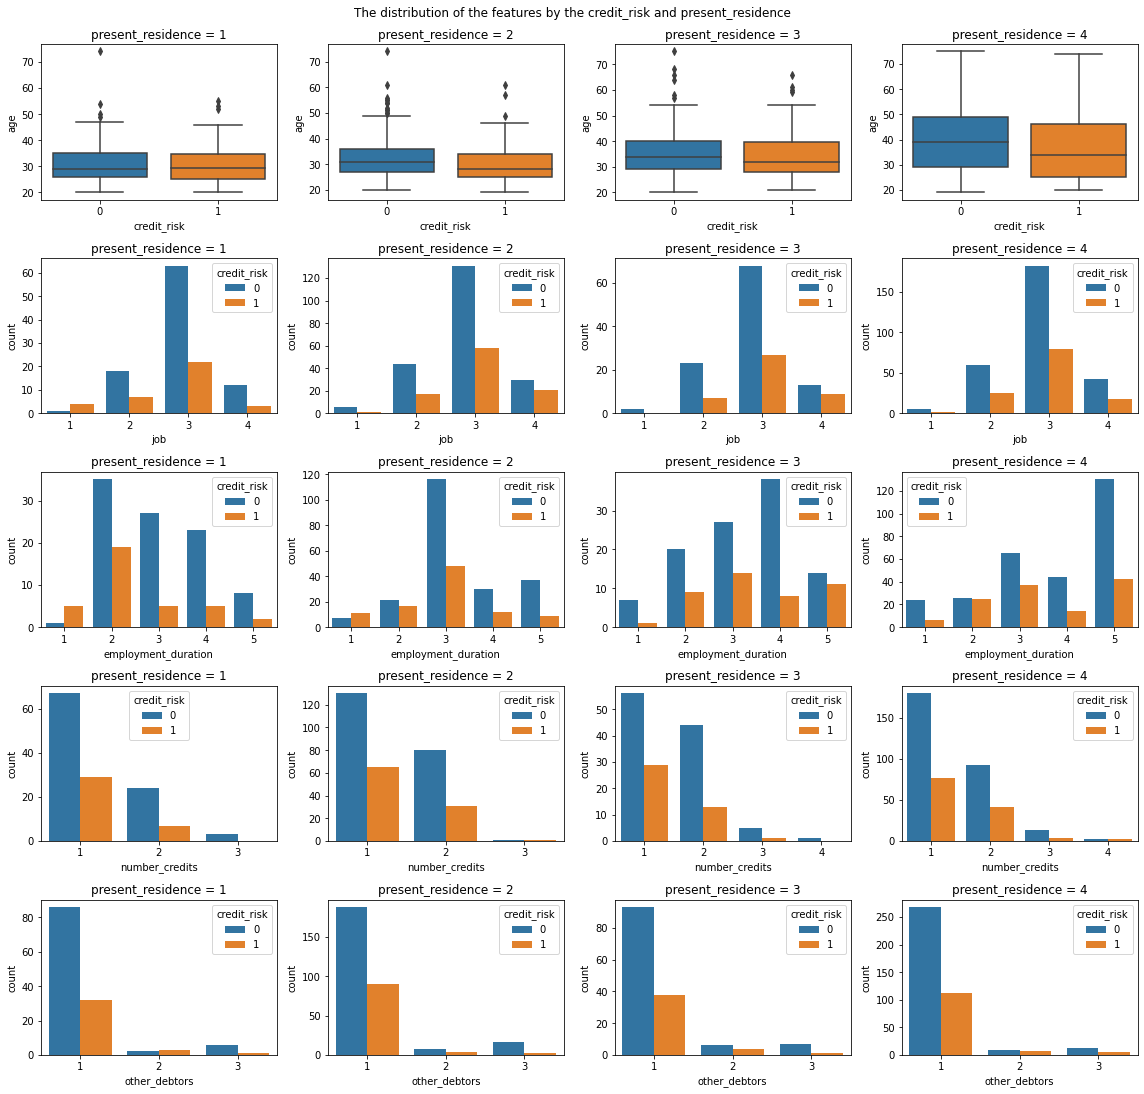

In [156]:
col_list = [col for col in data.columns if col not in ['credit_risk', 'present_residence']][:5]
plot_multivariate(data=data, gfeat='present_residence', col_list=col_list, fig_size=(16, 15))

The plots above show that status, duration, credit_history, amount, and purpose can be helpful
in the prediction task if considered in iteraction with present_residency: 
distribution of each feature varies by present_residency.

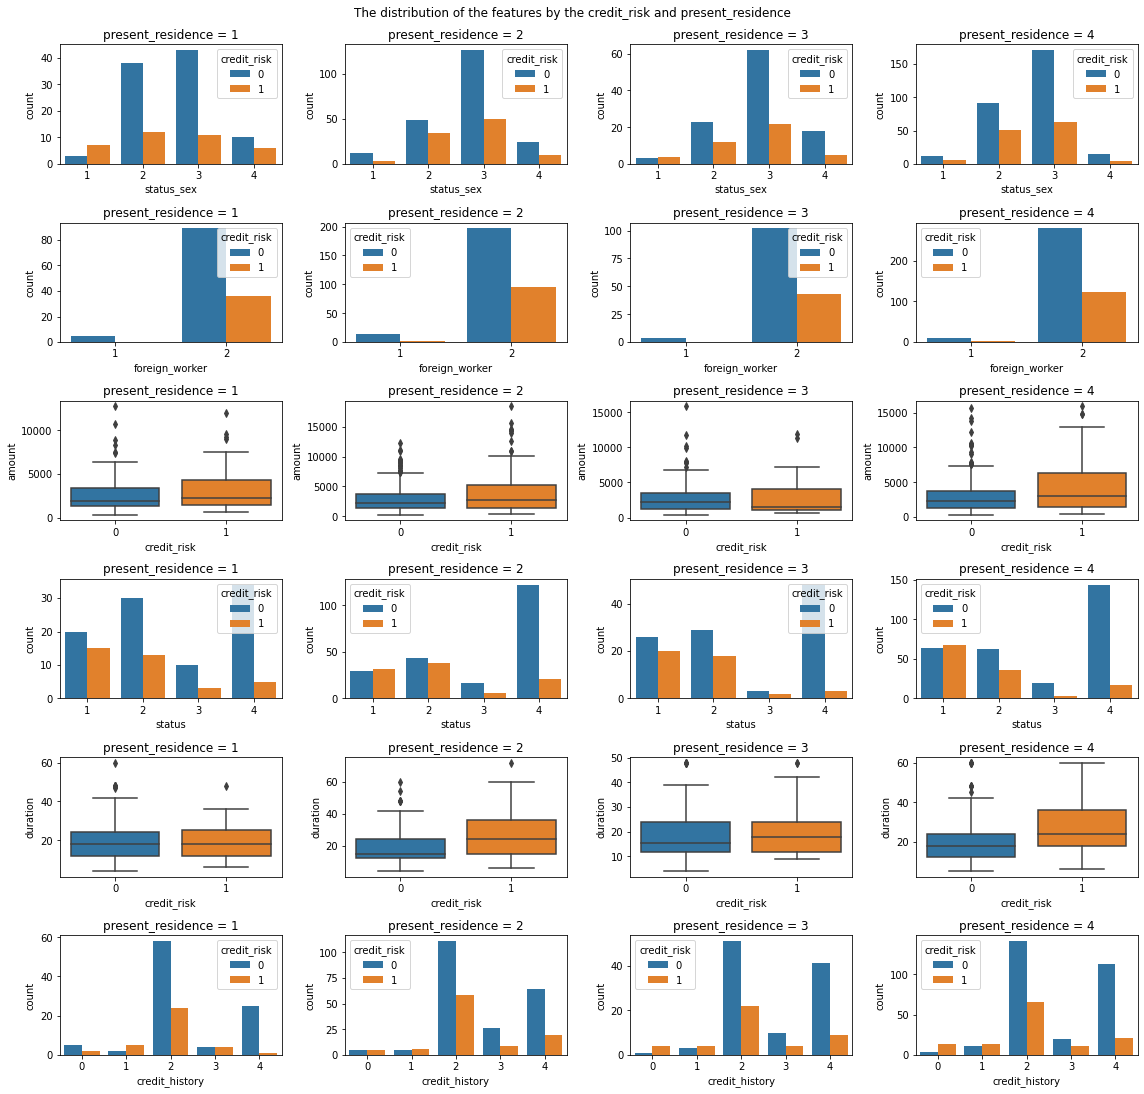

In [157]:
col_list = [col for col in data.columns if col not in ['credit_risk', 'present_residence']][5:11]
plot_multivariate(data=data, gfeat='present_residence', col_list=col_list, fig_size=(16, 15))

Judging by the plots above savings, employment_duration, dti, status_sex, 
property, and other_debtors
can be helpful in iteraction with present_residency: 
distribution of each feature varies by present_residency.

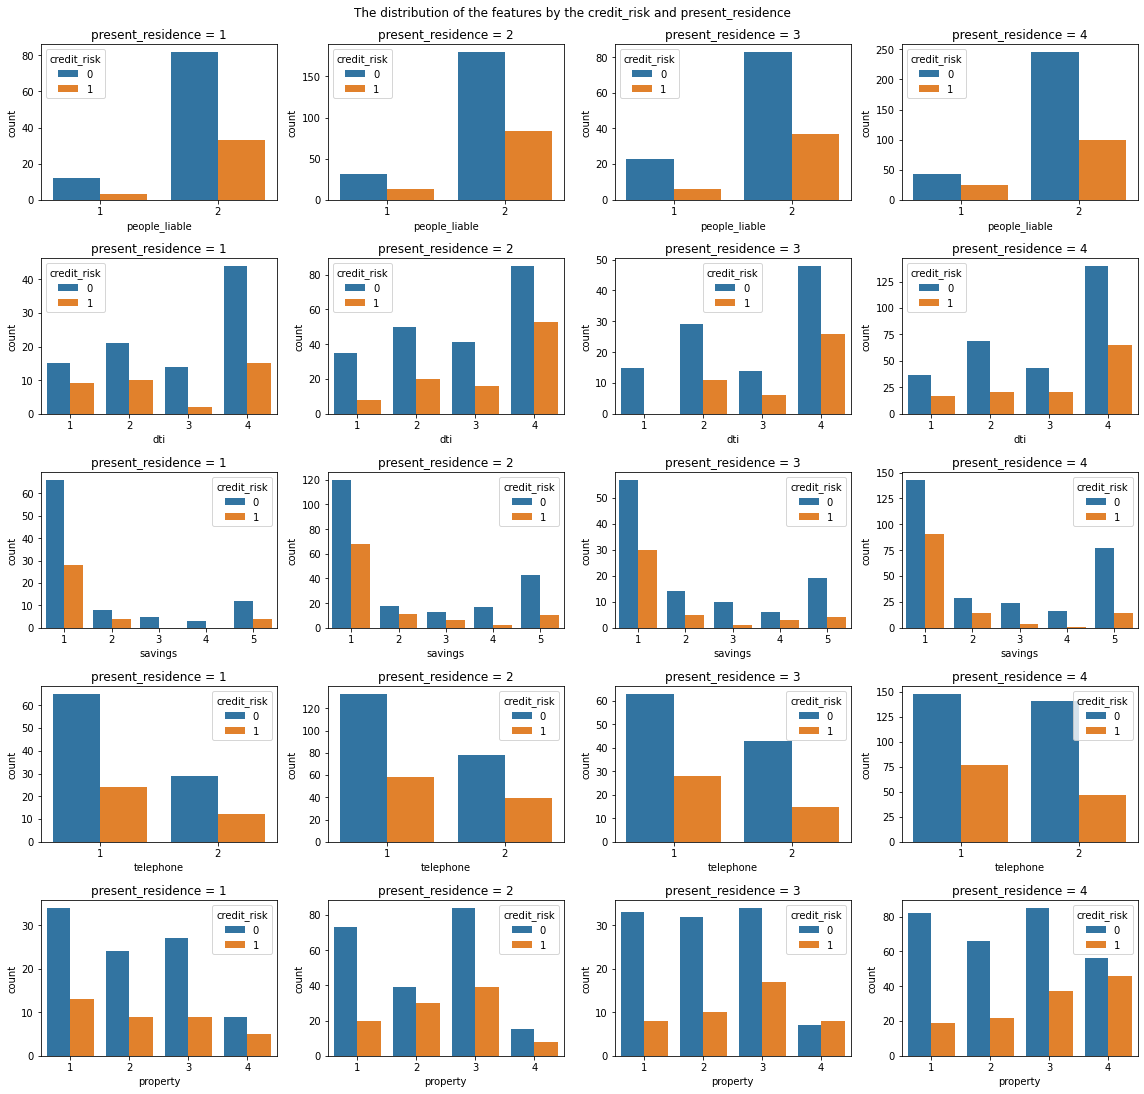

In [158]:
col_list = [col for col in data.columns if col not in ['credit_risk', 'present_residence']][11:16]
plot_multivariate(data=data, gfeat='present_residence', col_list=col_list, fig_size=(16, 15))

The plots above show that age, other_installment_plans, housing, number_credits, and job
can be helpful
in the prediction task if considered in iteraction with present_residency: 
distribution of each feature varies by present_residency.

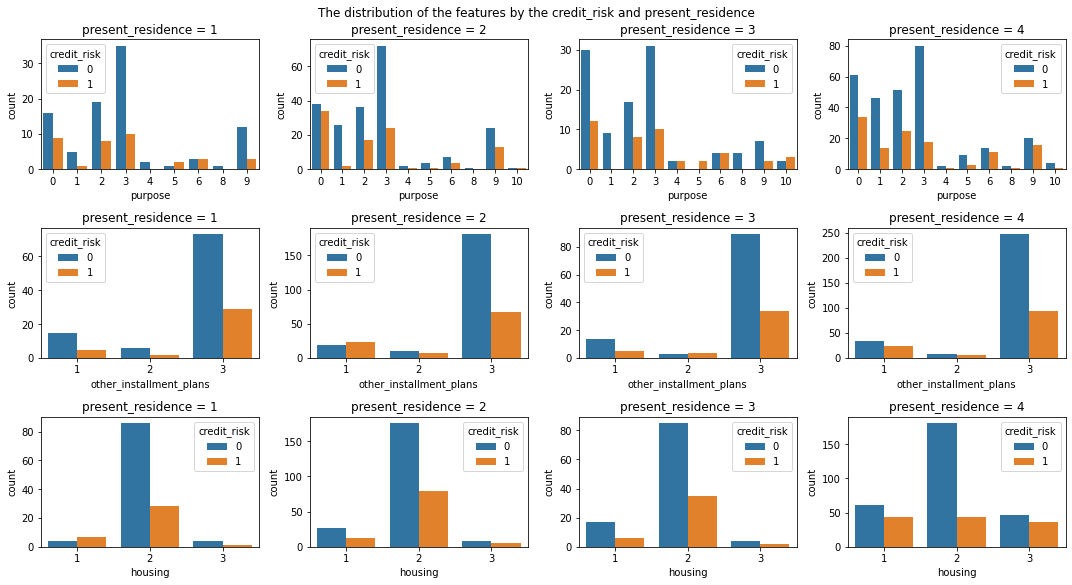

In [159]:
col_list = [col for col in data.columns if col not in ['credit_risk', 'present_residence']][16:]
plot_multivariate(data=data, gfeat='present_residence', col_list=col_list, fig_size=(15, 8))

Judging by the plots above people_liable, telephone, and foreign_worker
can be helpful in iteraction with present_residency: 
distribution of each feature varies by present_residency.

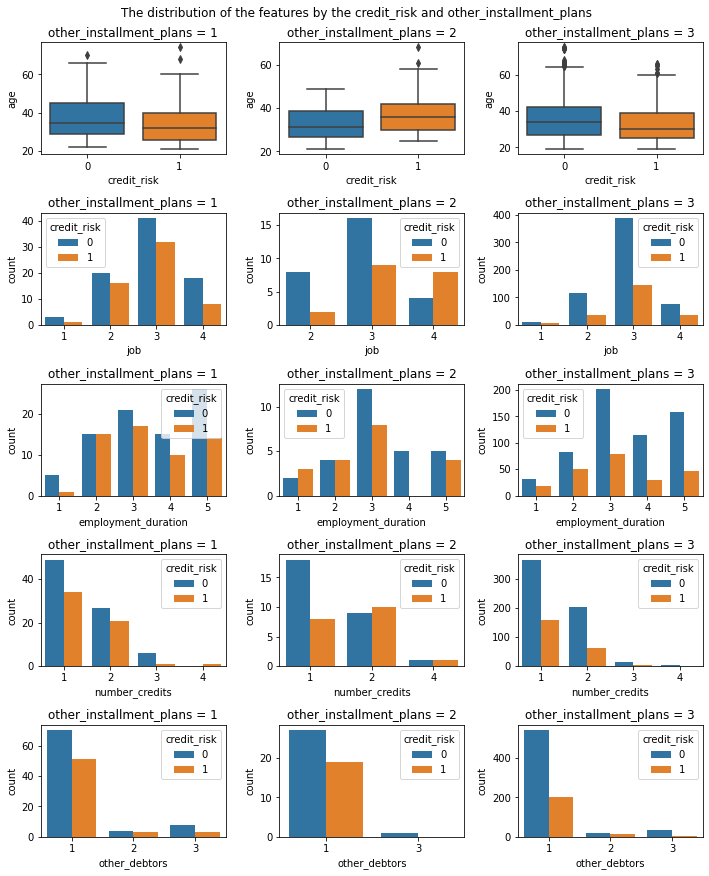

In [160]:
col_list = [col for col in data.columns if col not in ['credit_risk', 'other_installment_plans']][:5]
plot_multivariate(data=data, gfeat='other_installment_plans', col_list=col_list, fig_size=(10, 12))

The plots above show that status, duration, credit_history, amount, and purpose can be helpful
in the prediction task if considered in iteraction with other_installment_plans: 
distribution of each feature varies by other_installment_plans.

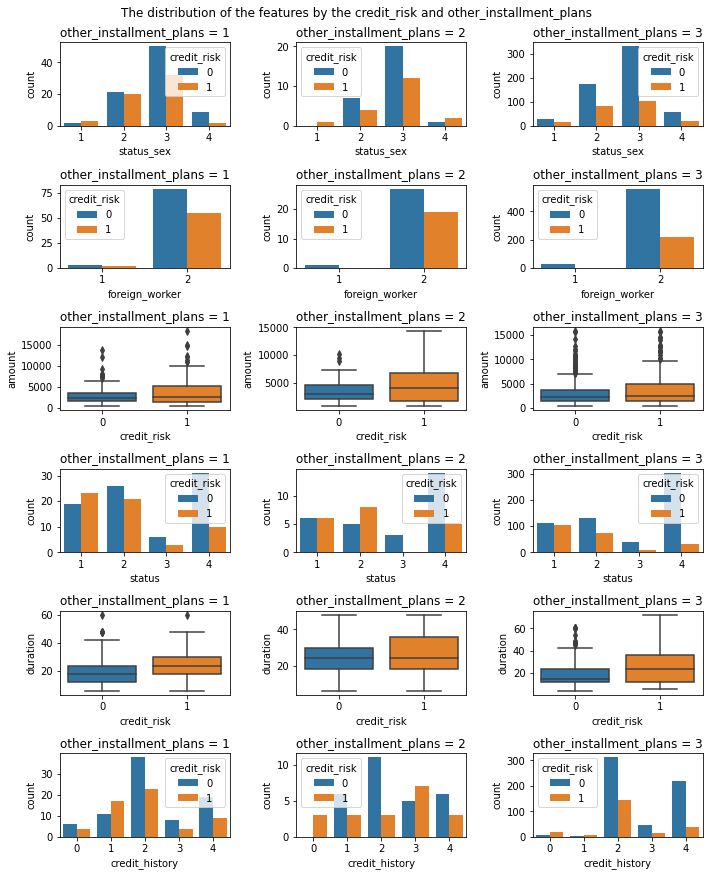

In [161]:
col_list = [col for col in data.columns if col not in ['credit_risk', 'other_installment_plans']][5:11]
plot_multivariate(data=data, gfeat='other_installment_plans', col_list=col_list, fig_size=(10, 12))

Judging by the plots above savings, employment_duration, dti, status_sex, 
present_residency, and other_debtors
can be helpful in iteraction with other_installment_plans: 
distribution of each feature varies by other_installment_plans.

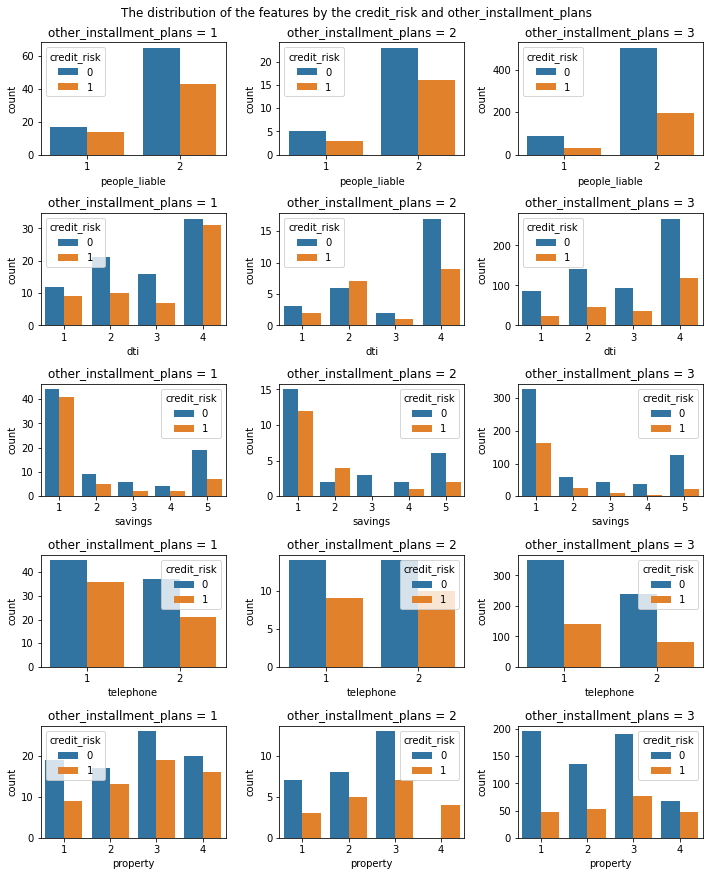

In [162]:
col_list = [col for col in data.columns if col not in ['credit_risk', 'other_installment_plans']][11:16]
plot_multivariate(data=data, gfeat='other_installment_plans', col_list=col_list, fig_size=(10, 12))

The plots above show that age, property, housing, number_credits, and job
can be helpful
in the prediction task if considered in iteraction with other_installment_plans: 
distribution of each feature varies by other_installment_plans.

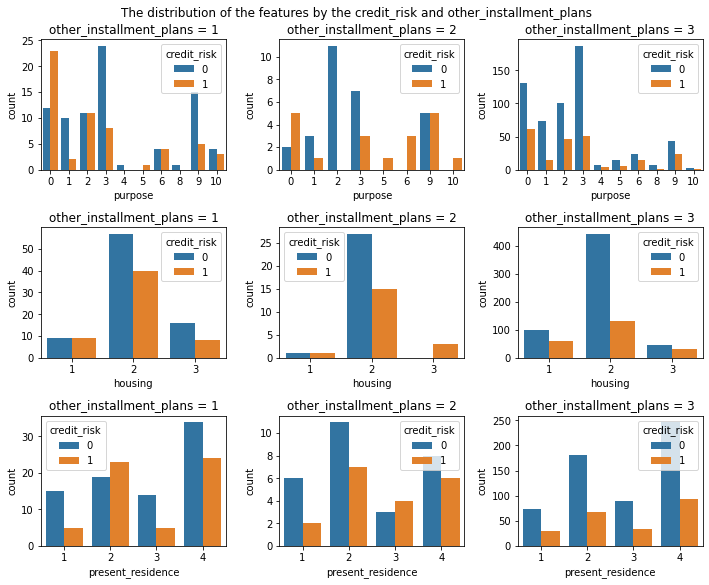

In [163]:
col_list = [col for col in data.columns if col not in ['credit_risk', 'other_installment_plans']][16:]
plot_multivariate(data=data, gfeat='other_installment_plans', col_list=col_list, fig_size=(10, 8))

Judging by the plots above people_liable, telephone, and foreign_worker
can be helpful in iteraction with other_installment_plans: 
distribution of each feature varies by other_installment_plans.

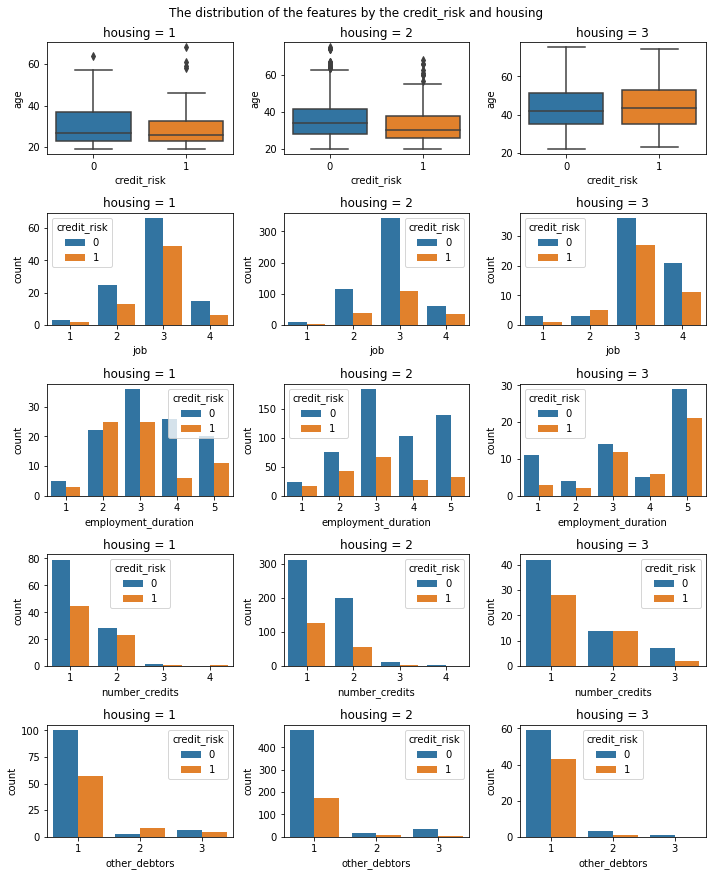

In [164]:
col_list = [col for col in data.columns if col not in ['credit_risk', 'housing']][:5]
plot_multivariate(data=data, gfeat='housing', col_list=col_list, fig_size=(10, 12))

The plots above show that status, duration, credit_history, amount, and purpose can be helpful
in the prediction task if considered in iteraction with housing: 
distribution of each feature varies by housing.

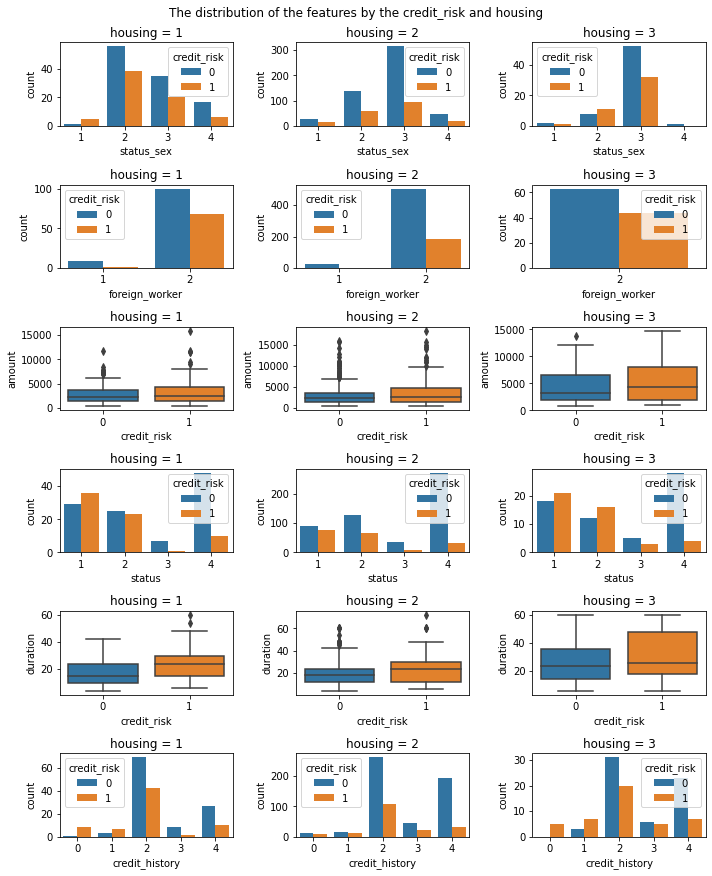

In [165]:
col_list = [col for col in data.columns if col not in ['credit_risk', 'housing']][5:11]
plot_multivariate(data=data, gfeat='housing', col_list=col_list, fig_size=(10, 12))

Judging by the plots above savings, employment_duration, dti, status_sex, 
present_residency, and other_debtors
can be helpful in iteraction with housing: 
distribution of each feature varies by housing.

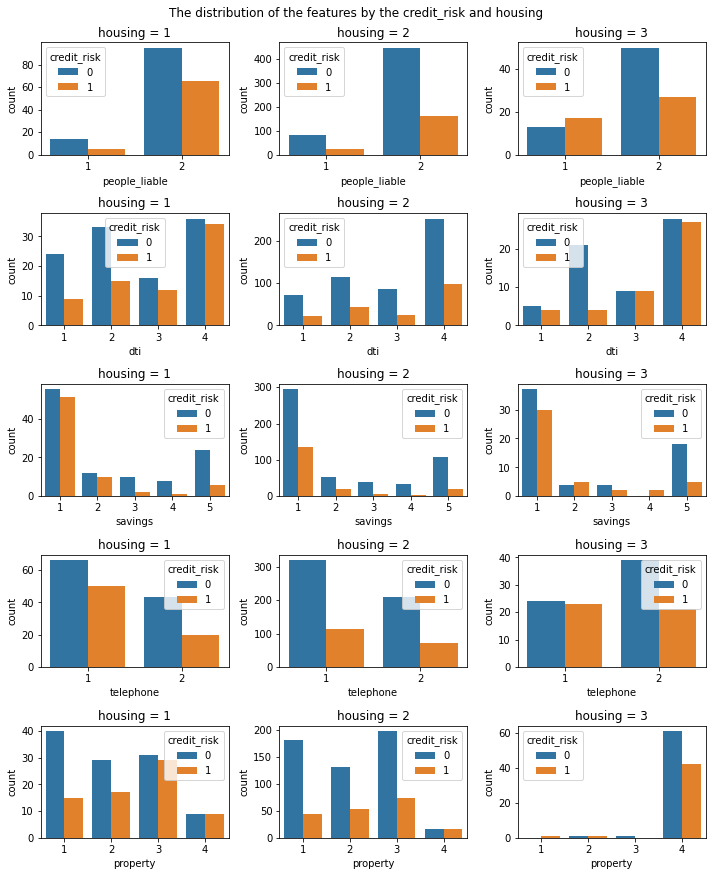

In [166]:
col_list = [col for col in data.columns if col not in ['credit_risk', 'housing']][11:16]
plot_multivariate(data=data, gfeat='housing', col_list=col_list, fig_size=(10, 12))

The plots above show that age, property, other_installment_plans, number_credits, and job
can be helpful
in the prediction task if considered in iteraction with housing: 
distribution of each feature varies by housing.

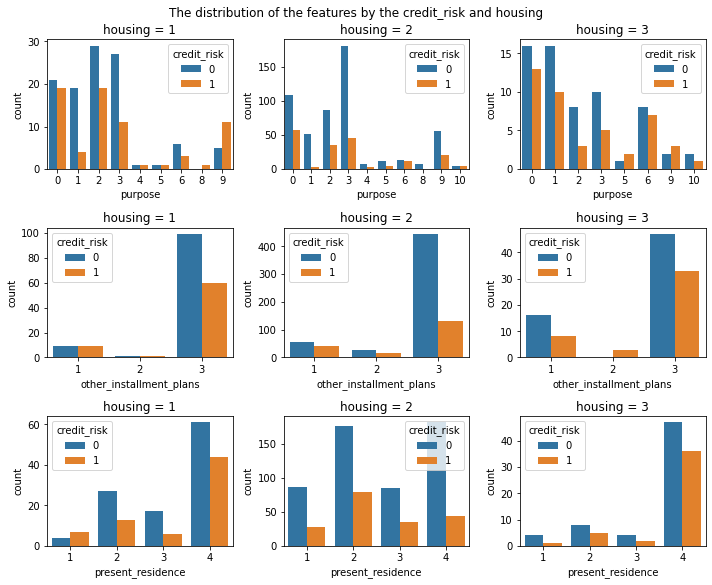

In [167]:
col_list = [col for col in data.columns if col not in ['credit_risk', 'housing']][16:]
plot_multivariate(data=data, gfeat='housing', col_list=col_list, fig_size=(10, 8))

Judging by the plots above people_liable, telephone, and foreign_worker
can be helpful in iteraction with housing: 
distribution of each feature varies by housing.

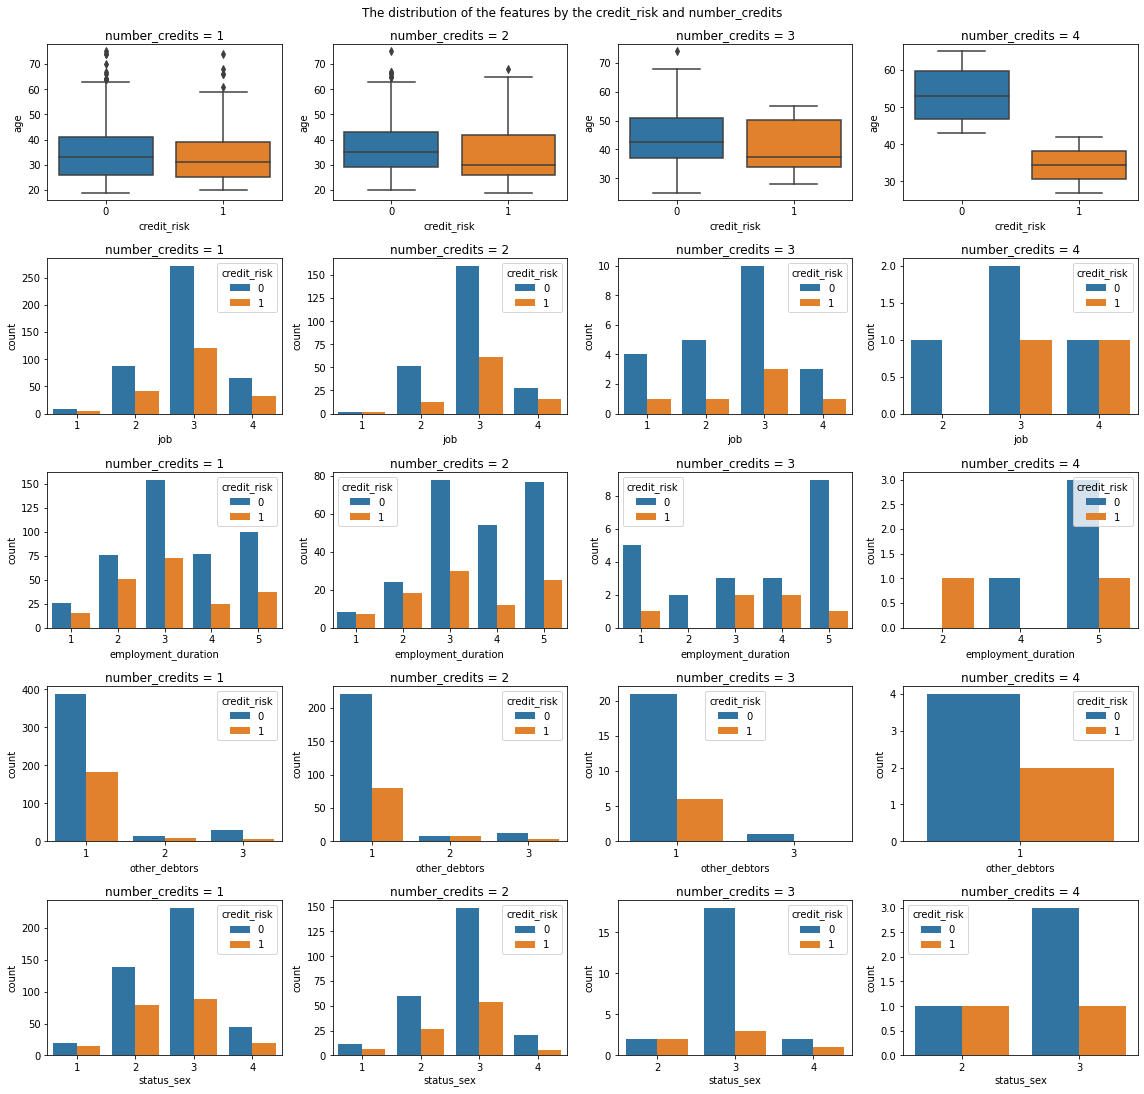

In [168]:
col_list = [col for col in data.columns if col not in ['credit_risk', 'number_credits']][:5]
plot_multivariate(data=data, gfeat='number_credits', col_list=col_list, fig_size=(16, 15))

The plots above show that status, duration, credit_history, amount, and purpose can be helpful
in the prediction task if considered in iteraction with number_credits: 
distribution of each feature varies by number_credits.

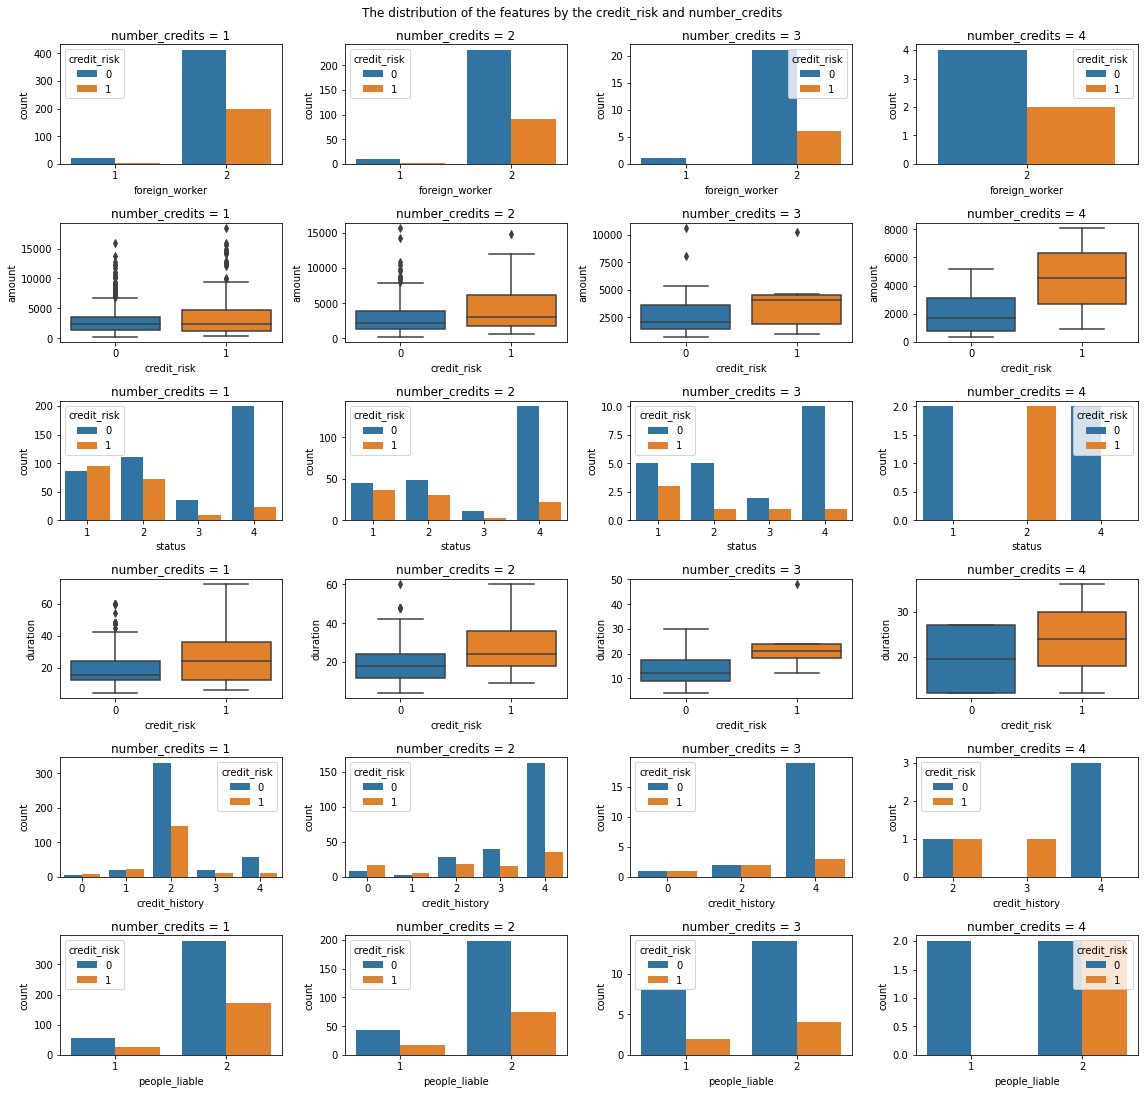

In [169]:
col_list = [col for col in data.columns if col not in ['credit_risk', 'number_credits']][5:11]
plot_multivariate(data=data, gfeat='number_credits', col_list=col_list, fig_size=(16, 15))

Judging by the plots above savings, employment_duration, dti, status_sex, 
present_residency, and other_debtors
can be helpful in iteraction with number_credits: 
distribution of each feature varies by number_credits.

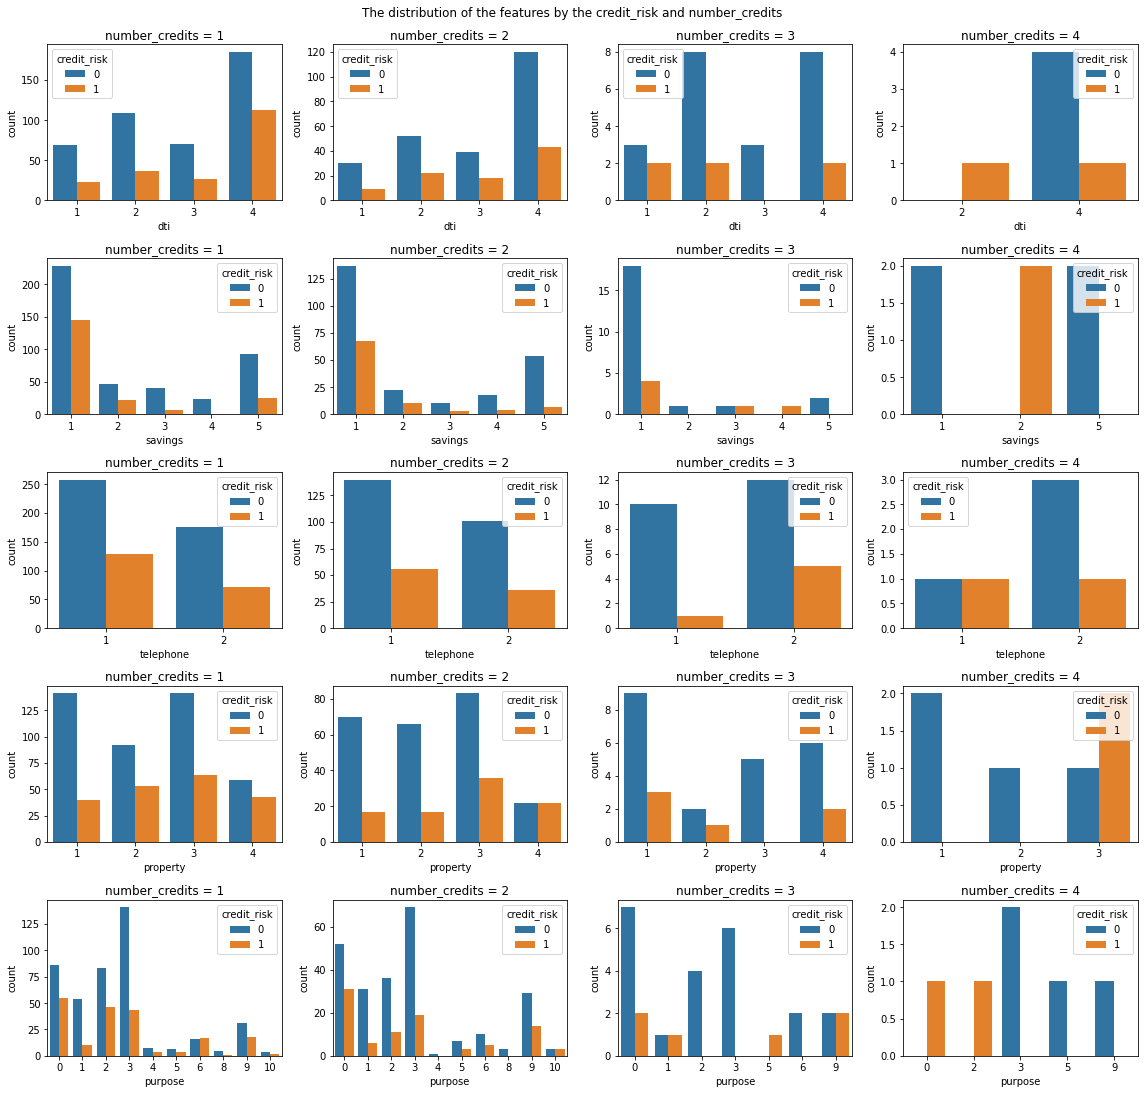

In [170]:
col_list = [col for col in data.columns if col not in ['credit_risk', 'number_credits']][11:16]
plot_multivariate(data=data, gfeat='number_credits', col_list=col_list, fig_size=(16, 15))

The plots above show that age, property, other_installment_plans, number_credits, and job
can be helpful
in the prediction task if considered in iteraction with number_credits: 
distribution of each feature varies by number_credits.

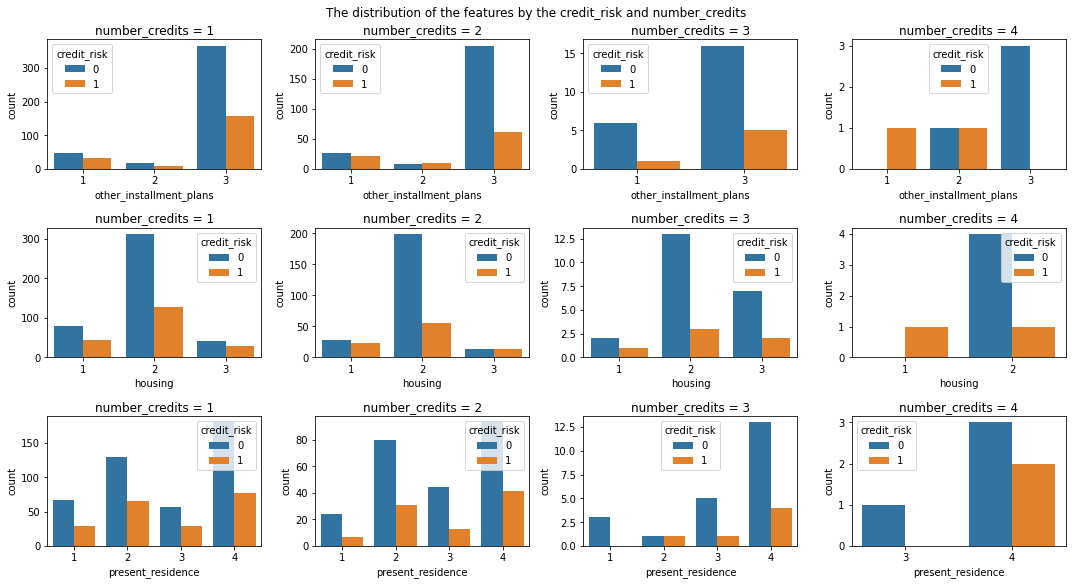

In [171]:
col_list = [col for col in data.columns if col not in ['credit_risk', 'number_credits']][16:]
plot_multivariate(data=data, gfeat='number_credits', col_list=col_list, fig_size=(15, 8))

Judging by the plots above people_liable, telephone, and foreign_worker
can be helpful in iteraction with number_credits: 
distribution of each feature varies by number_credits.

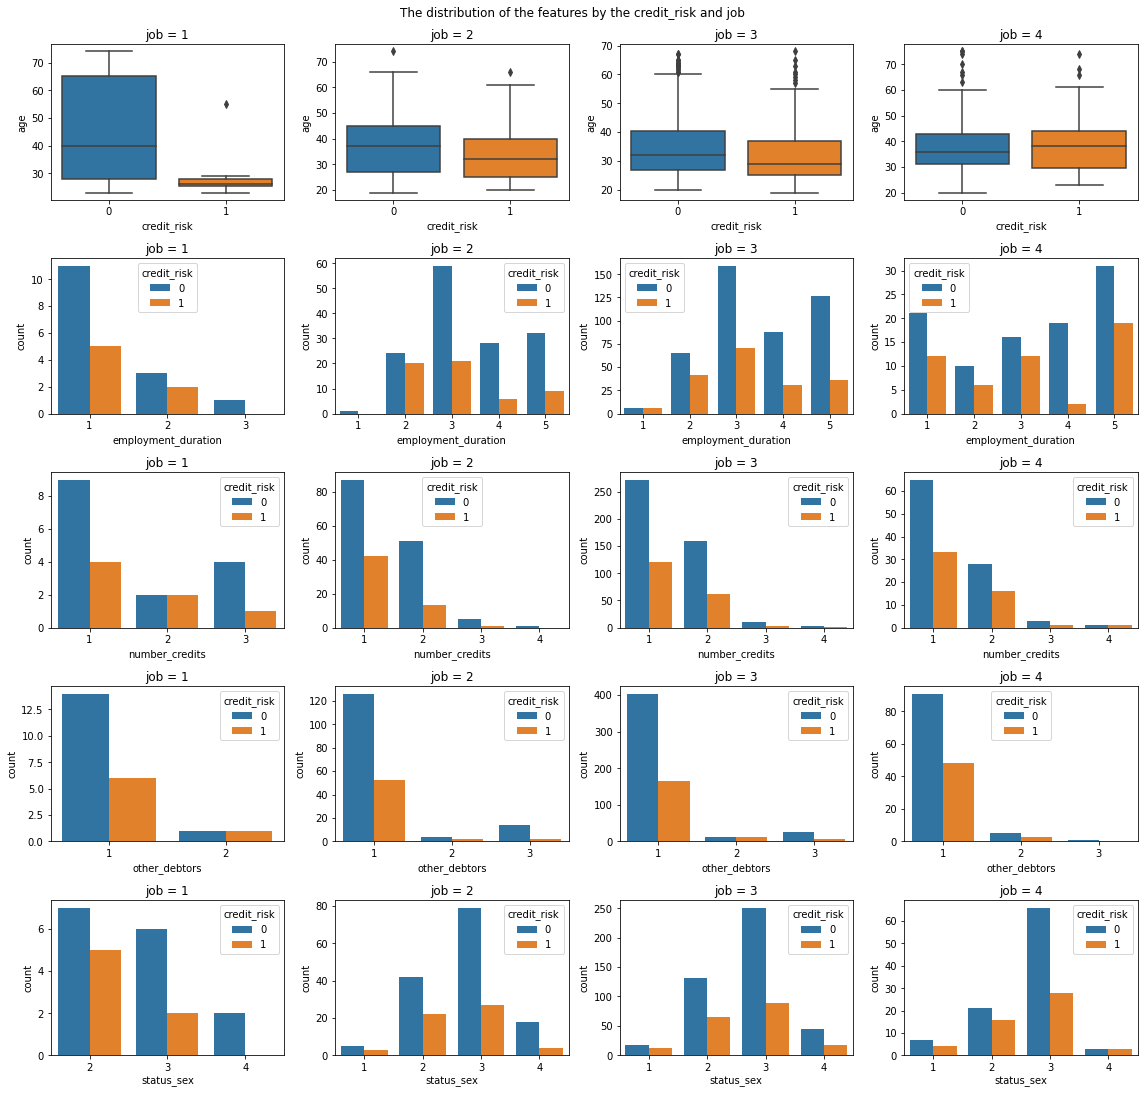

In [172]:
col_list = [col for col in data.columns if col not in ['credit_risk', 'job']][:5]
plot_multivariate(data=data, gfeat='job', col_list=col_list, fig_size=(16, 15))

The plots above show that status, duration, credit_history, amount, and purpose can be helpful
in the prediction task if considered in iteraction with job: 
distribution of each feature varies by job.

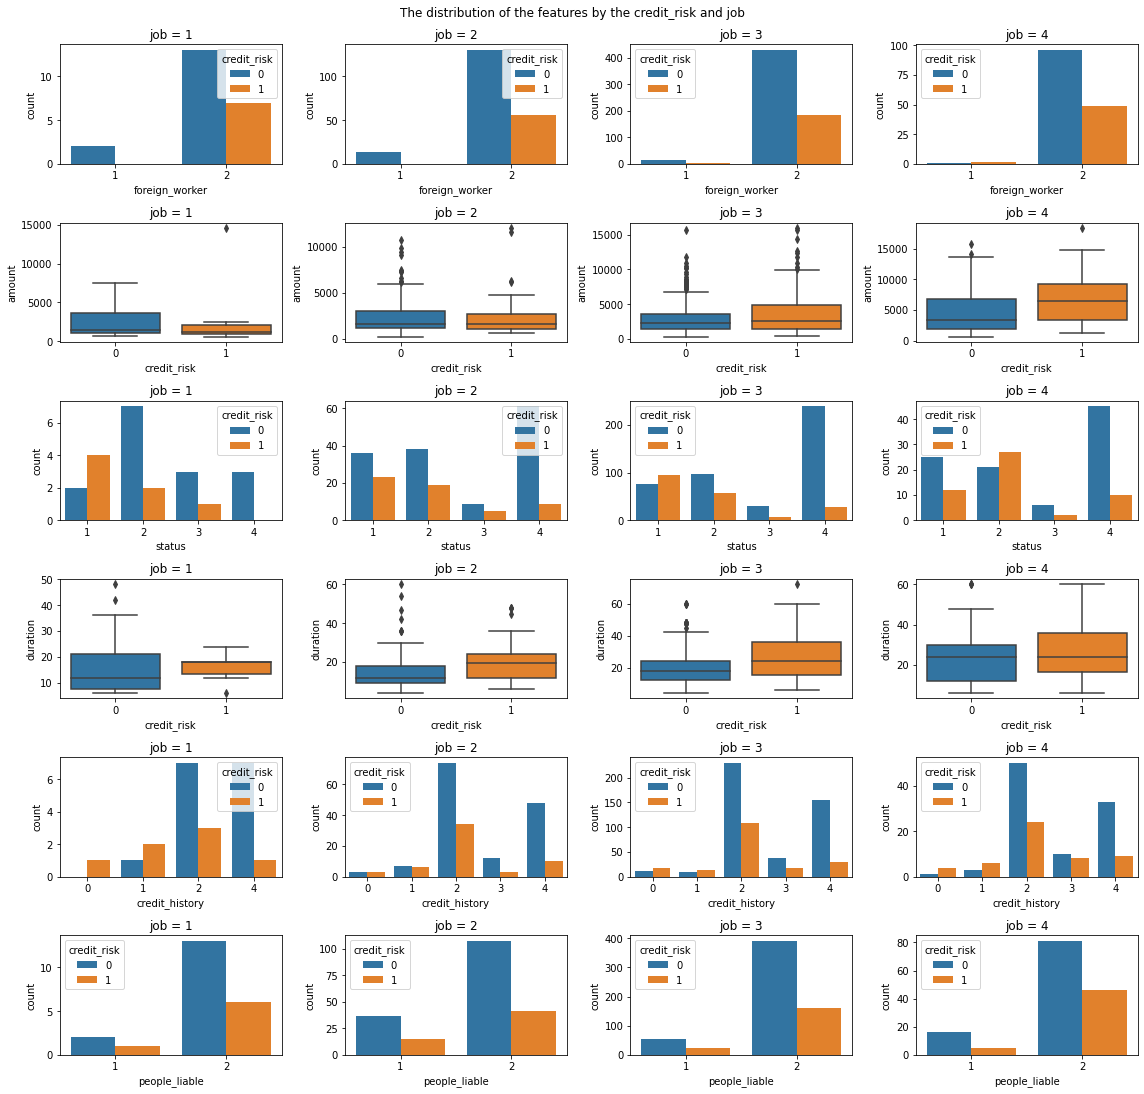

In [173]:
col_list = [col for col in data.columns if col not in ['credit_risk', 'job']][5:11]
plot_multivariate(data=data, gfeat='job', col_list=col_list, fig_size=(16, 15))

Judging by the plots above savings, employment_duration, dti, status_sex, 
present_residency, and other_debtors
can be helpful in iteraction with job: 
distribution of each feature varies by job.

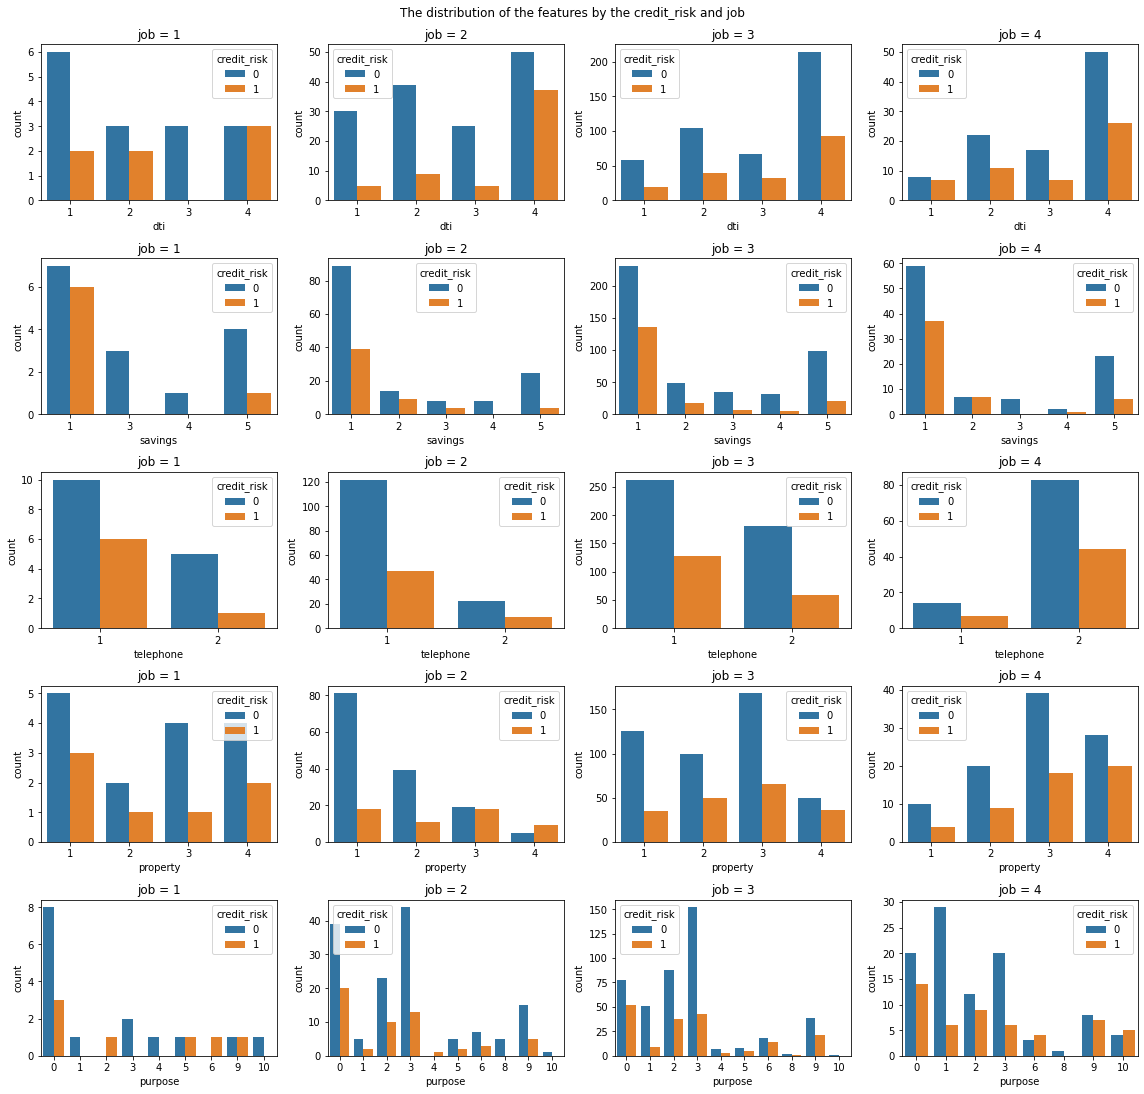

In [174]:
col_list = [col for col in data.columns if col not in ['credit_risk', 'job']][11:16]
plot_multivariate(data=data, gfeat='job', col_list=col_list, fig_size=(16, 15))

The plots above show that age, property, other_installment_plans, number_credits, and housing
can be helpful
in the prediction task if considered in iteraction with job: 
distribution of each feature varies by job.

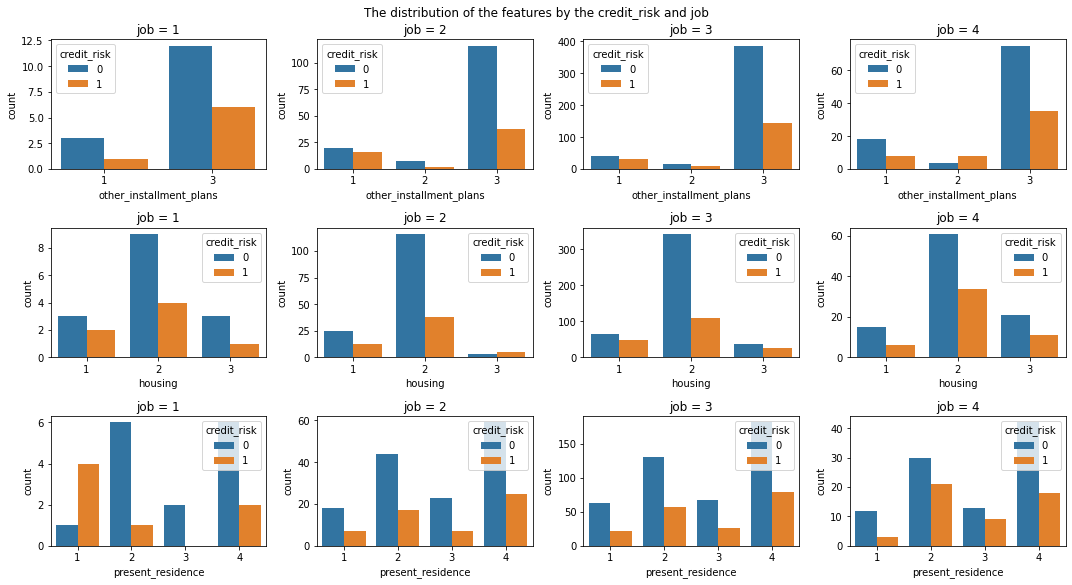

In [175]:
col_list = [col for col in data.columns if col not in ['credit_risk', 'job']][16:]
plot_multivariate(data=data, gfeat='job', col_list=col_list, fig_size=(15, 8))

Judging by the plots above people_liable, telephone, and foreign_worker
can be helpful in iteraction with job: 
distribution of each feature varies by job.

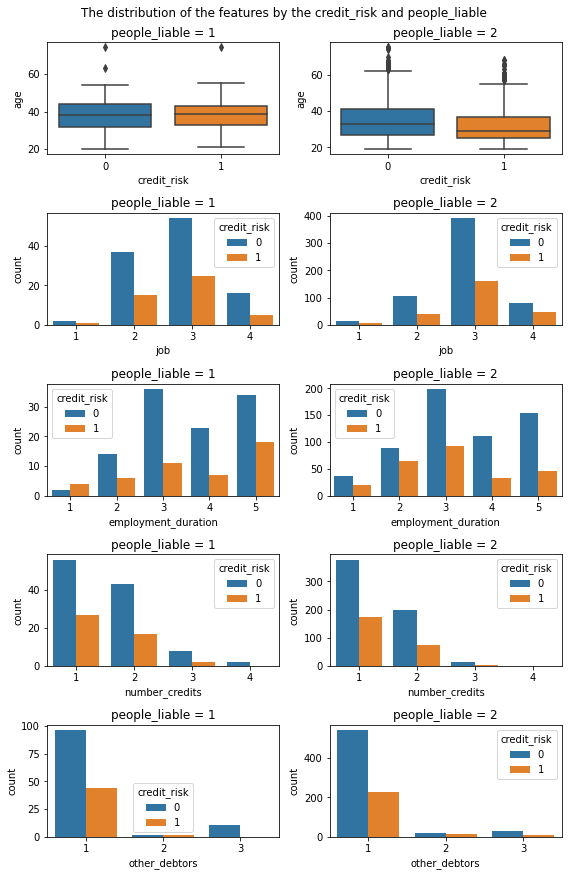

In [176]:
col_list = [col for col in data.columns if col not in ['credit_risk', 'people_liable']][:5]
plot_multivariate(data=data, gfeat='people_liable', col_list=col_list, fig_size=(8, 12))

The plots above show that status, duration, credit_history, amount, and purpose can be helpful
in the prediction task if considered in iteraction with people_liable: 
distribution of each feature varies by people_liable.

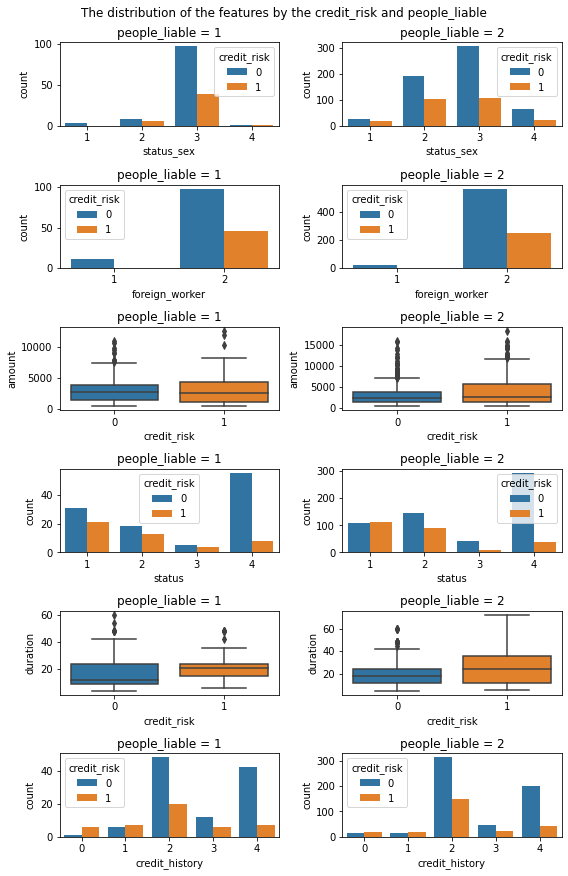

In [177]:
col_list = [col for col in data.columns if col not in ['credit_risk', 'people_liable']][5:11]
plot_multivariate(data=data, gfeat='people_liable', col_list=col_list, fig_size=(8, 12))

Judging by the plots above savings, employment_duration, dti, status_sex, 
present_residency, and other_debtors
can be helpful in iteraction with people_liable: 
distribution of each feature varies by people_liable.

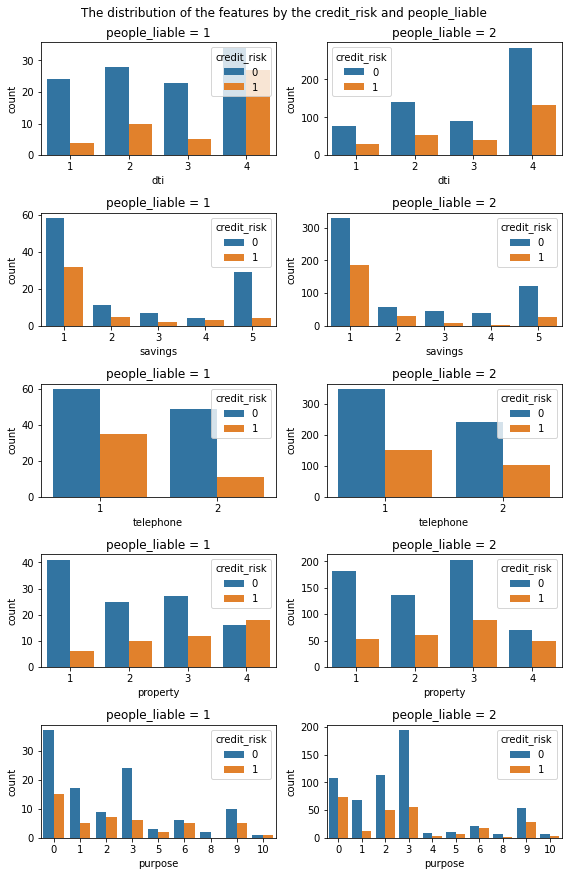

In [178]:
col_list = [col for col in data.columns if col not in ['credit_risk', 'people_liable']][11:16]
plot_multivariate(data=data, gfeat='people_liable', col_list=col_list, fig_size=(8, 12))

The plots above show that age, property, other_installment_plans, number_credits, and housing
can be helpful
in the prediction task if considered in iteraction with people_liable: 
distribution of each feature varies by people_liable.

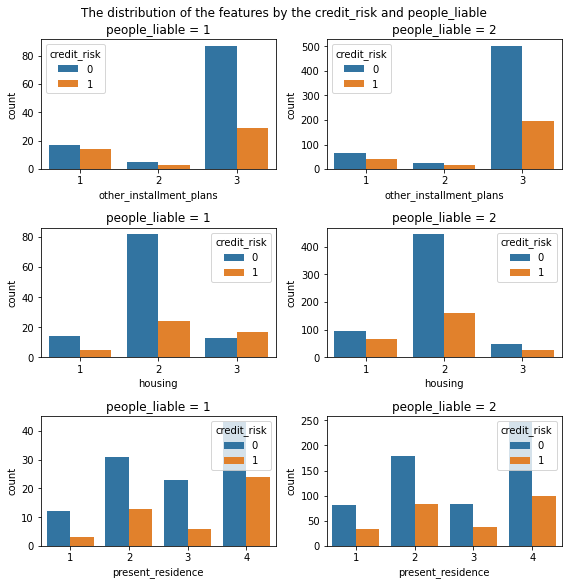

In [179]:
col_list = [col for col in data.columns if col not in ['credit_risk', 'people_liable']][16:]
plot_multivariate(data=data, gfeat='people_liable', col_list=col_list, fig_size=(8, 8))

Judging by the plots above job, telephone, and foreign_worker
can be helpful in iteraction with people_liable: 
distribution of each feature varies by people_liable.

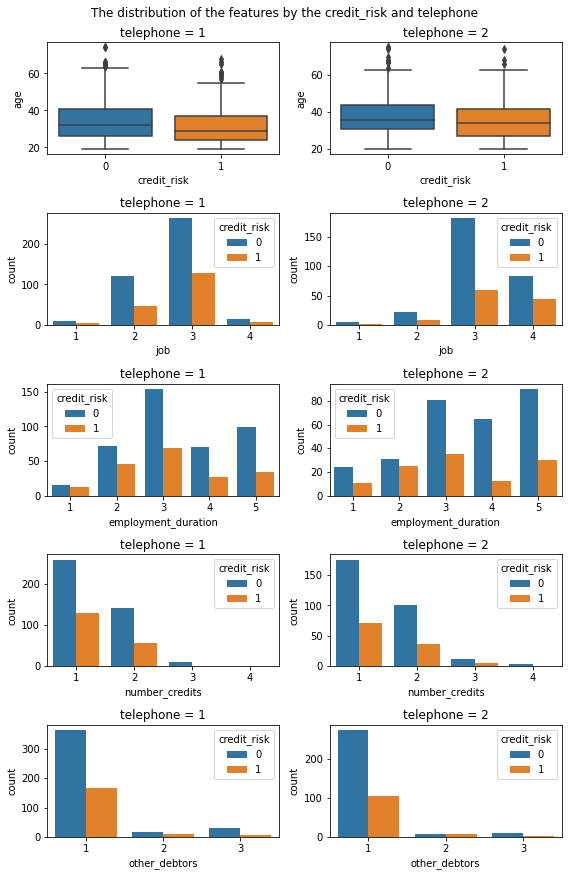

In [180]:
col_list = [col for col in data.columns if col not in ['credit_risk', 'telephone']][:5]
plot_multivariate(data=data, gfeat='telephone', col_list=col_list, fig_size=(8, 12))

The plots above show that status, duration, credit_history, amount, and purpose can be helpful
in the prediction task if considered in iteraction with telephone: 
distribution of each feature varies by telephone.

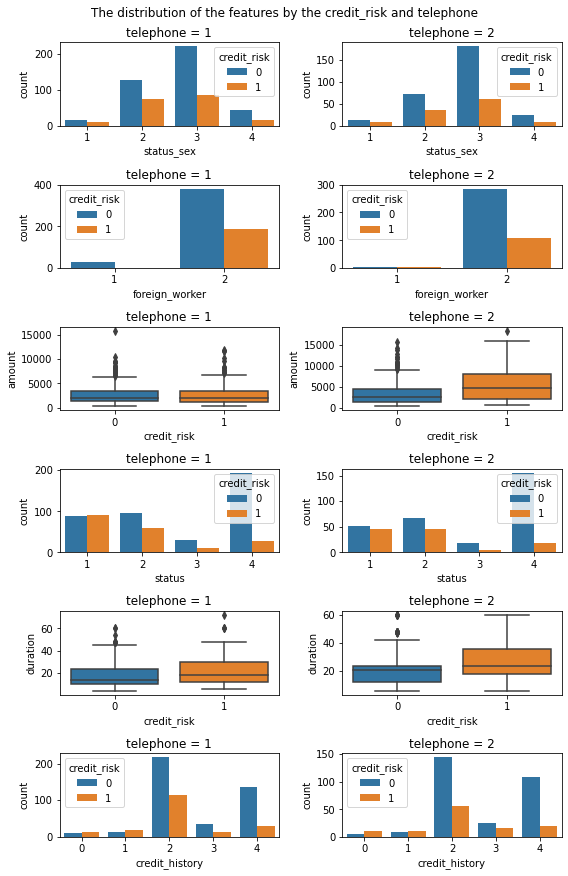

In [181]:
col_list = [col for col in data.columns if col not in ['credit_risk', 'telephone']][5:11]
plot_multivariate(data=data, gfeat='telephone', col_list=col_list, fig_size=(8, 12))

Judging by the plots above savings, employment_duration, dti, status_sex, 
present_residency, and other_debtors
can be helpful in iteraction with telephone: 
distribution of each feature varies by telephone.

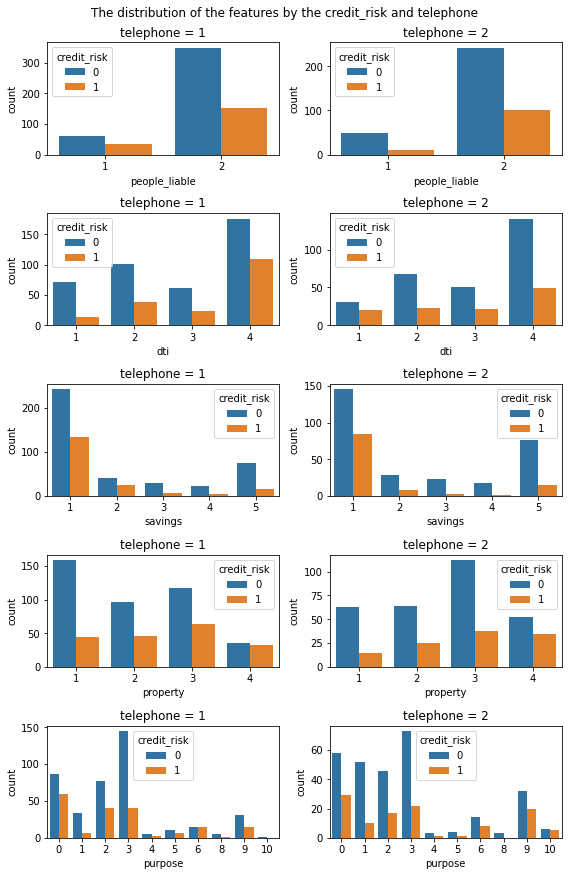

In [182]:
col_list = [col for col in data.columns if col not in ['credit_risk', 'telephone']][11:16]
plot_multivariate(data=data, gfeat='telephone', col_list=col_list, fig_size=(8, 12))

The plots above show that age, property, other_installment_plans, number_credits, and housing
can be helpful
in the prediction task if considered in iteraction with telephone: 
distribution of each feature varies by telephone.

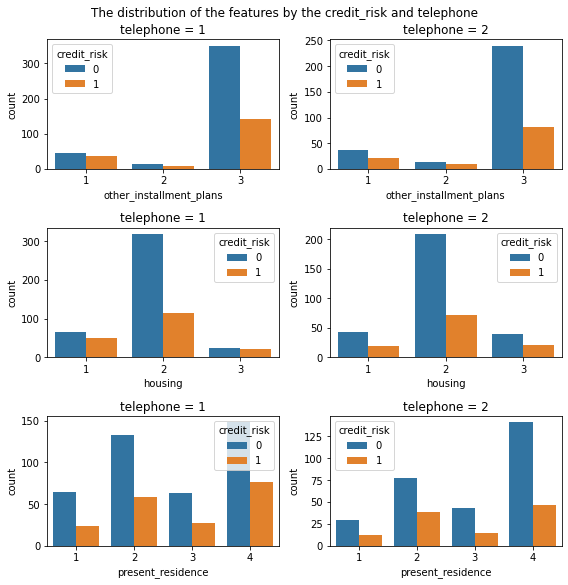

In [183]:
col_list = [col for col in data.columns if col not in ['credit_risk', 'telephone']][16:]
plot_multivariate(data=data, gfeat='telephone', col_list=col_list, fig_size=(8, 8))

Judging by the plots above job, people_liable, and foreign_worker
can be helpful in iteraction with telephone: 
distribution of each feature varies by telephone.

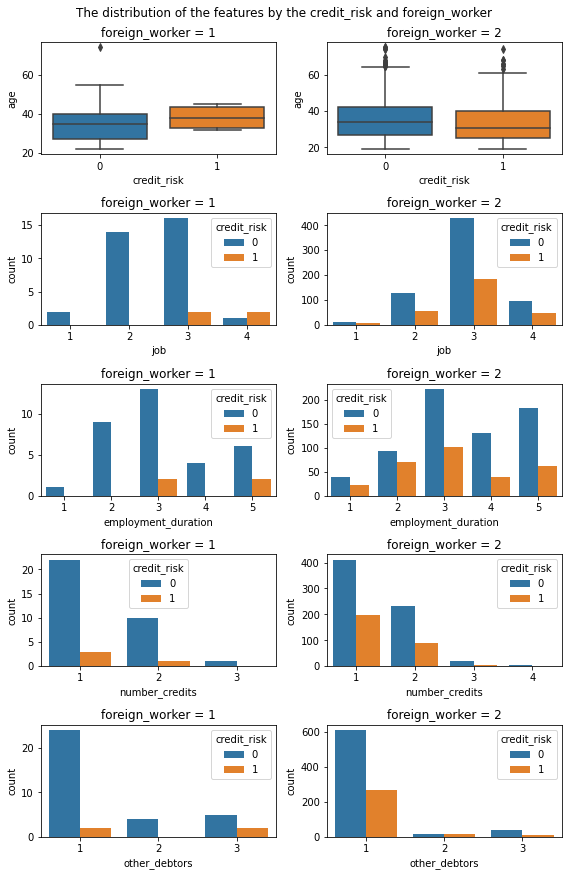

In [184]:
col_list = [col for col in data.columns if col not in ['credit_risk', 'foreign_worker']][:5]
plot_multivariate(data=data, gfeat='foreign_worker', col_list=col_list, fig_size=(8, 12))

The plots above show that status, duration, credit_history, amount, and purpose can be helpful
in the prediction task if considered in iteraction with foreign_worker: 
distribution of each feature varies by foreign_worker.

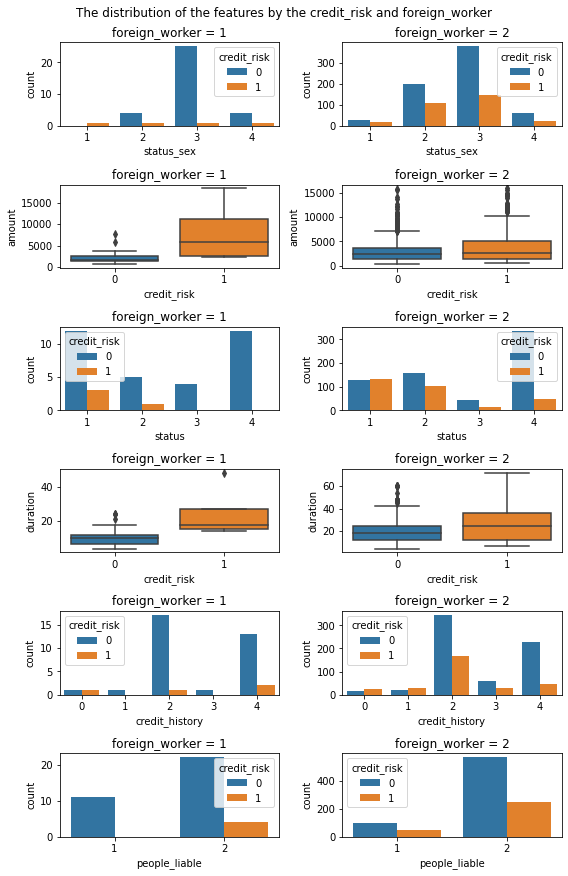

In [185]:
col_list = [col for col in data.columns if col not in ['credit_risk', 'foreign_worker']][5:11]
plot_multivariate(data=data, gfeat='foreign_worker', col_list=col_list, fig_size=(8, 12))

Judging by the plots above savings, employment_duration, dti, status_sex, 
present_residency, and other_debtors
can be helpful in iteraction with foreign_worker: 
distribution of each feature varies by foreign_worker.

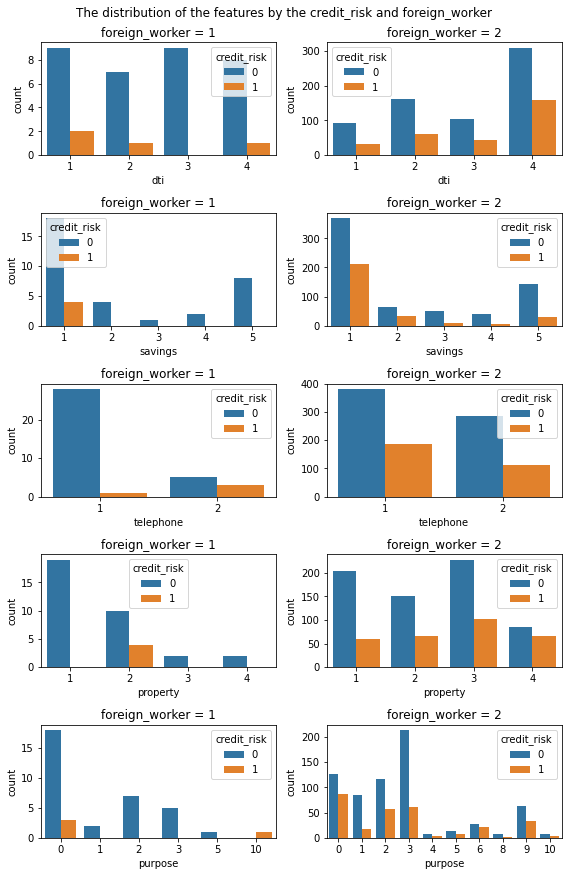

In [186]:
col_list = [col for col in data.columns if col not in ['credit_risk', 'foreign_worker']][11:16]
plot_multivariate(data=data, gfeat='foreign_worker', col_list=col_list, fig_size=(8, 12))

The plots above show that age, property, other_installment_plans, number_credits, and housing
can be helpful
in the prediction task if considered in iteraction with foreign_worker: 
distribution of each feature varies by foreign_worker.

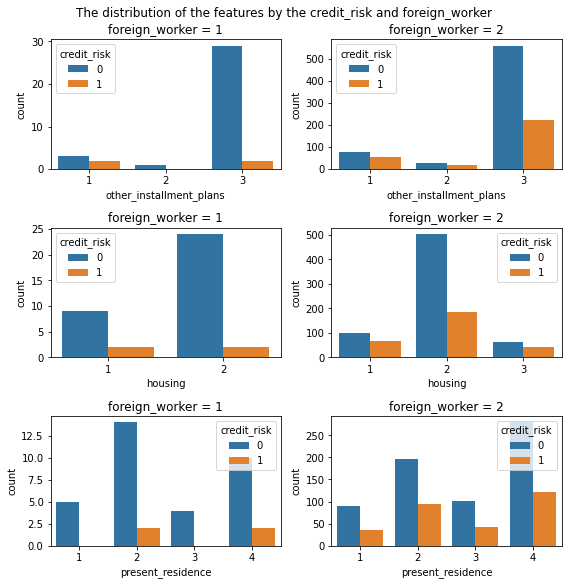

In [187]:
col_list = [col for col in data.columns if col not in ['credit_risk', 'foreign_worker']][16:]
plot_multivariate(data=data, gfeat='foreign_worker', col_list=col_list, fig_size=(8, 8))

Judging by the plots above job, people_liable, and telephone
can be helpful in iteraction with foreign_worker: 
distribution of each feature varies by foreign_worker.

Now let's create 2 new features. The first one will be a combination of age and duration variables and the second is a result of hierarchical clustering. So let's proceed.

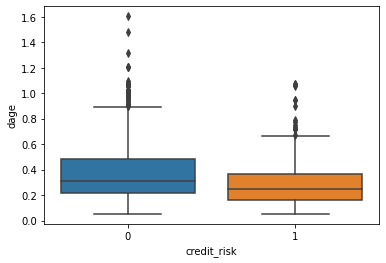

In [188]:
data['dage'] = (100 - data['age']) / (12 * data['duration'])
sns.boxplot(x='credit_risk', y='dage', data=data)
plt.show()

The plot above shows the new variable (dage) can be useful in the classification task. Meanwhile it has skewness too as the other continuous features. So let's check which transformation will be better for it.

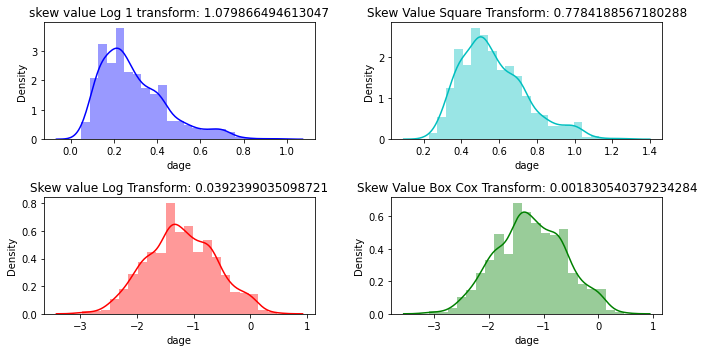

In [189]:
scaling(data, 'dage')

Not surprisingly, Box-Cox transformation is the best of the chosen transformations. Now let's show lmbda values (related to Box-Cox transformation) for each continuous feature which will be used in app.py to apply the transformation to imported values of the features.

In [190]:
for col in ['age', 'amount', 'dage', 'duration']:
    data[col], temp_lmbda = boxcox(data[col], lmbda=None)
    print(f'{col}: {temp_lmbda}')

age: -0.6524316739182968
amount: -0.0639326907261038
dage: -0.025199226092440907
duration: 0.09297575561665981


Next we will construct hierarchical clusters using age, amount, and duration features.

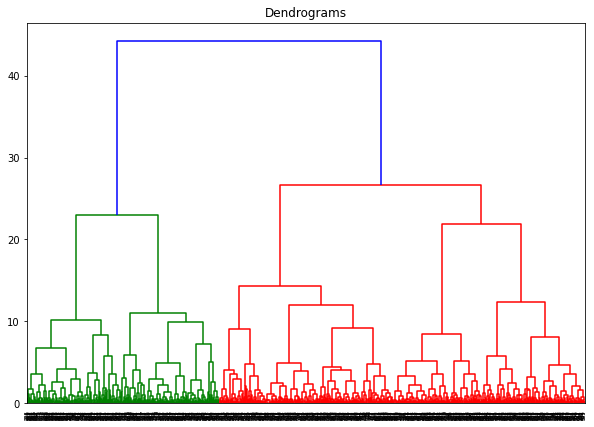

In [191]:
amt_scaler = StandardScaler()
data['sclog_amount'] = amt_scaler.fit_transform(np.log(1+data['amount']).values.reshape(-1, 1))

dur_scaler = StandardScaler()
data['sclog_duration'] = dur_scaler.fit_transform(np.log(1+data['duration']).values.reshape(-1, 1))

age_scaler = StandardScaler()
data['sclog_age'] = age_scaler.fit_transform(np.log(1+data['age']).values.reshape(-1, 1))

cluster_col_list = [ 'sclog_amount', 'sclog_duration', 'sclog_age']

plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")
mergings = linkage(data[cluster_col_list], method='ward') 
dendrogram(mergings, leaf_rotation=90)
plt.show()

data.drop(columns=['sclog_amount', 'sclog_duration', 'sclog_age'], inplace=True)

Let's use 25 as a threshold for cluster distances. This threshold will allow us to get 3 clusters. Below we can see how the clusters iteract with the target.

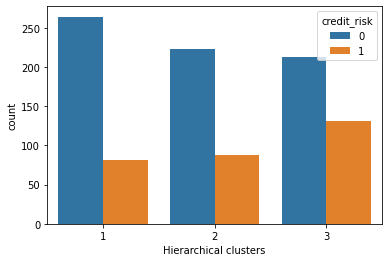

In [192]:
labels = fcluster(mergings, 25, criterion='distance')
sns.countplot(x=labels, hue=data['credit_risk'])
plt.xlabel('Hierarchical clusters')
plt.show()

So the plot above shows that the clusters can be used as a separate feature for the classification task.
<br> Sometimes it is useful to discretize continuous features. So let's figure out which discretization tactic to use for the continuous features.
<br> We will exploit information value calculated based on weight of evidence in line with LogisticRegression to find out a good discretization tactic. Therefore let's first construct a function to select features based on information value.

In [193]:
def get_feat_power(x):
    if x < 0.02:
        return 'Useless'
    elif x >= 0.02 and x < 0.1:
        return 'Weak predictors'
    elif x >= 0.1 and x < 0.3:
        return 'Medium predictors'
    elif x >= 0.3 and x <= 0.5:
        return 'Strong predictors'
    else:
        return 'Suspicious'

Next let's split the data into train and test. Then we will split the train into 5 folds. All of this is done to overcome overfitting. The data splitting and the fold construction process will be exactly the same during model building process such as there won't be any inconsistency.

In [194]:
num_col_list = ['age', 'amount', 'duration', 'dage']

train_data, test_data = train_test_split(data, 
                                         test_size=0.2, 
                                         random_state=13,
                                         stratify=data['credit_risk'])

X_train = train_data[[i for i in train_data.columns if i!='credit_risk']].reset_index(drop=True)
y_train = train_data['credit_risk'].reset_index(drop=True).to_frame()

skf = StratifiedKFold(n_splits=5, random_state=13, shuffle=True)
for f, (train_idx, val_idx) in enumerate(skf.split(X_train, y_train)):
    X_train.loc[val_idx, 'fold'] = f + 1
    y_train.loc[val_idx, 'fold'] = f + 1

Now we are ready to start the search for a discretization tactic.

In [195]:
kbd_score_dict = {}
for col in num_col_list:
    kbd_score_dict[col] = {}
    for kbd in ['uniform', 'kmeans', 'quantile']:
        kbd_score_dict[col][kbd] = {}
        for bins in range(2, 11):
            
            if kbd == 'uniform':
                kbdm = KBinsDiscretizer(n_bins=bins, encode='ordinal', strategy='uniform')
            elif kbd == 'kmeans':
                kbdm = KBinsDiscretizer(n_bins=bins, encode='ordinal', strategy='kmeans')
            else:
                kbdm = KBinsDiscretizer(n_bins=bins, encode='ordinal', strategy='quantile')
            
            kbdm.fit(X_train[col].to_frame())
            X = pd.DataFrame(kbdm.transform(X_train[col].to_frame()))
            X.columns = [f'{col}_kbd']
            new_col = f'{col}_kbd'
            # selected_feat = [f'{col}_kbd' for col in num_col_list]
            X = pd.concat([X_train[['fold']], X], axis=1)

            val_ppred_list = []
            val_score = []

            for i in range(1, 6):
                temp_X_train = X[X['fold'] != i].drop(['fold'], axis=1).\
                              reset_index(drop=True)
                temp_y_train = y_train[y_train['fold'] != i].drop('fold', axis=1).\
                              reset_index(drop=True)

                temp_X_val = X[X['fold'] == i].drop(['fold'], axis=1).\
                            reset_index(drop=True)
                temp_y_val = y_train[y_train['fold'] == i].drop('fold', axis=1).\
                            reset_index(drop=True)

                temp_dev_df = pd.concat([temp_X_train, temp_y_train], axis=1)
                target_col = 'credit_risk'
                temp_feat = []
                temp_map_dict = {}
                # for col in [f'{col}_kbd' for col in num_col_list]:
                # if col == 'amount_dage_iter':
                #     continue
                temp_gdev_df = temp_dev_df.groupby(new_col)[target_col].agg(['count', 'sum'])
                temp_gdev_df.rename(columns={'sum': 'event'}, inplace=True)
                temp_gdev_df['non_event'] = temp_gdev_df['count'] - temp_gdev_df['event']
                temp_gdev_df['p_event'] = temp_gdev_df['event'] / temp_gdev_df['event'].sum()
                temp_gdev_df['p_non_event'] = temp_gdev_df['non_event'] / temp_gdev_df['non_event'].sum()
                temp_gdev_df['woe'] = np.log(temp_gdev_df['p_event'] / temp_gdev_df['p_non_event'])
                temp_gdev_df['iv'] = temp_gdev_df['woe'] * (temp_gdev_df['p_event'] - temp_gdev_df['p_non_event'])
                if get_feat_power(x=temp_gdev_df['iv'].sum()) in ['Medium predictors', 'Strong predictors']:
                    temp_feat.append(new_col)
                    temp_map_dict[new_col] = temp_gdev_df['woe'].to_dict()
                    temp_X_train[new_col] = temp_X_train[new_col].map(temp_map_dict[new_col])
                    temp_X_val[new_col] = temp_X_val[new_col].map(temp_map_dict[new_col])

                temp_X_train = temp_X_train[temp_feat]
                temp_X_val = temp_X_val[temp_feat]
                
                try:
                    model = LogisticRegression()
                    model.fit(temp_X_train, temp_y_train)

                    ppred_y_train = model.predict_proba(temp_X_train)[:, 1]
                    ppred_y_val = model.predict_proba(temp_X_val)[:, 1]
                    val_ppred_list.append(ppred_y_val.reshape(-1, 1))

                    auc_y_train = np.round(roc_auc_score(temp_y_train, ppred_y_train), 4)
                    auc_y_val = np.round(roc_auc_score(temp_y_val, ppred_y_val), 4)
                    val_score.append(auc_y_val)
                except:
                    continue

            kbd_score_dict[col][kbd][bins] = val_score

Let's visualize the results.

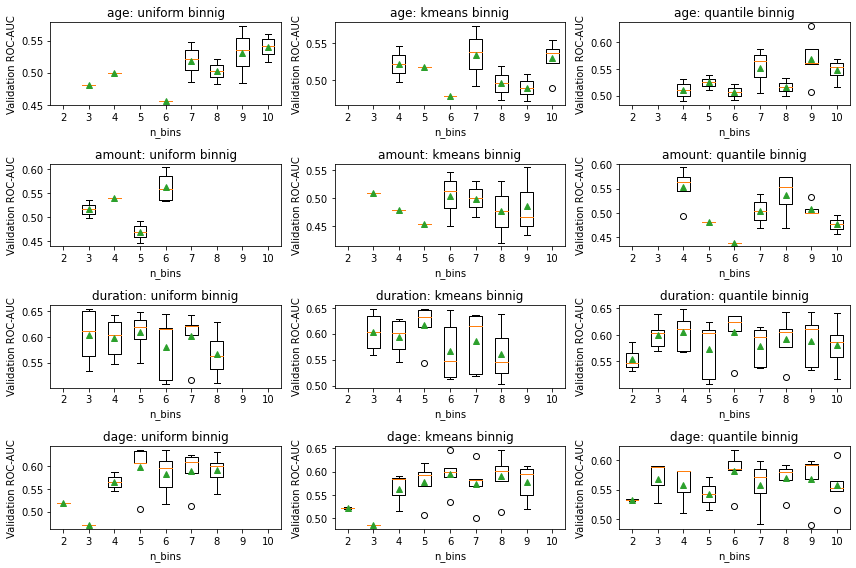

In [196]:
plot_index = 0
fig = plt.figure(figsize=(12, 8))
for col in num_col_list:
    for kbd in ['uniform', 'kmeans', 'quantile']:
        plot_index += 1
        plt.subplot(len(num_col_list), 3, plot_index)
        kbd_uniform_list = [i[1] for i in kbd_score_dict[col][kbd].items()]
        plt.boxplot(kbd_uniform_list, labels=np.arange(2, 11), showmeans=True)
        plt.xlabel('n_bins')
        plt.ylabel('Validation ROC-AUC')
        plt.title(f'{col}: {kbd} binnig')
plt.tight_layout()

Let's discretize numerical features taking into account ROC-AUC score variability in the charts above. So quantile binning strategy will be utilized with the following number of bins: 5, 9, 3, and 3 for age, amount, duration, and dage respetively. So we will use these findings in model building process.
<br> Finally let's derive feature iteractions using a simple decision tree.

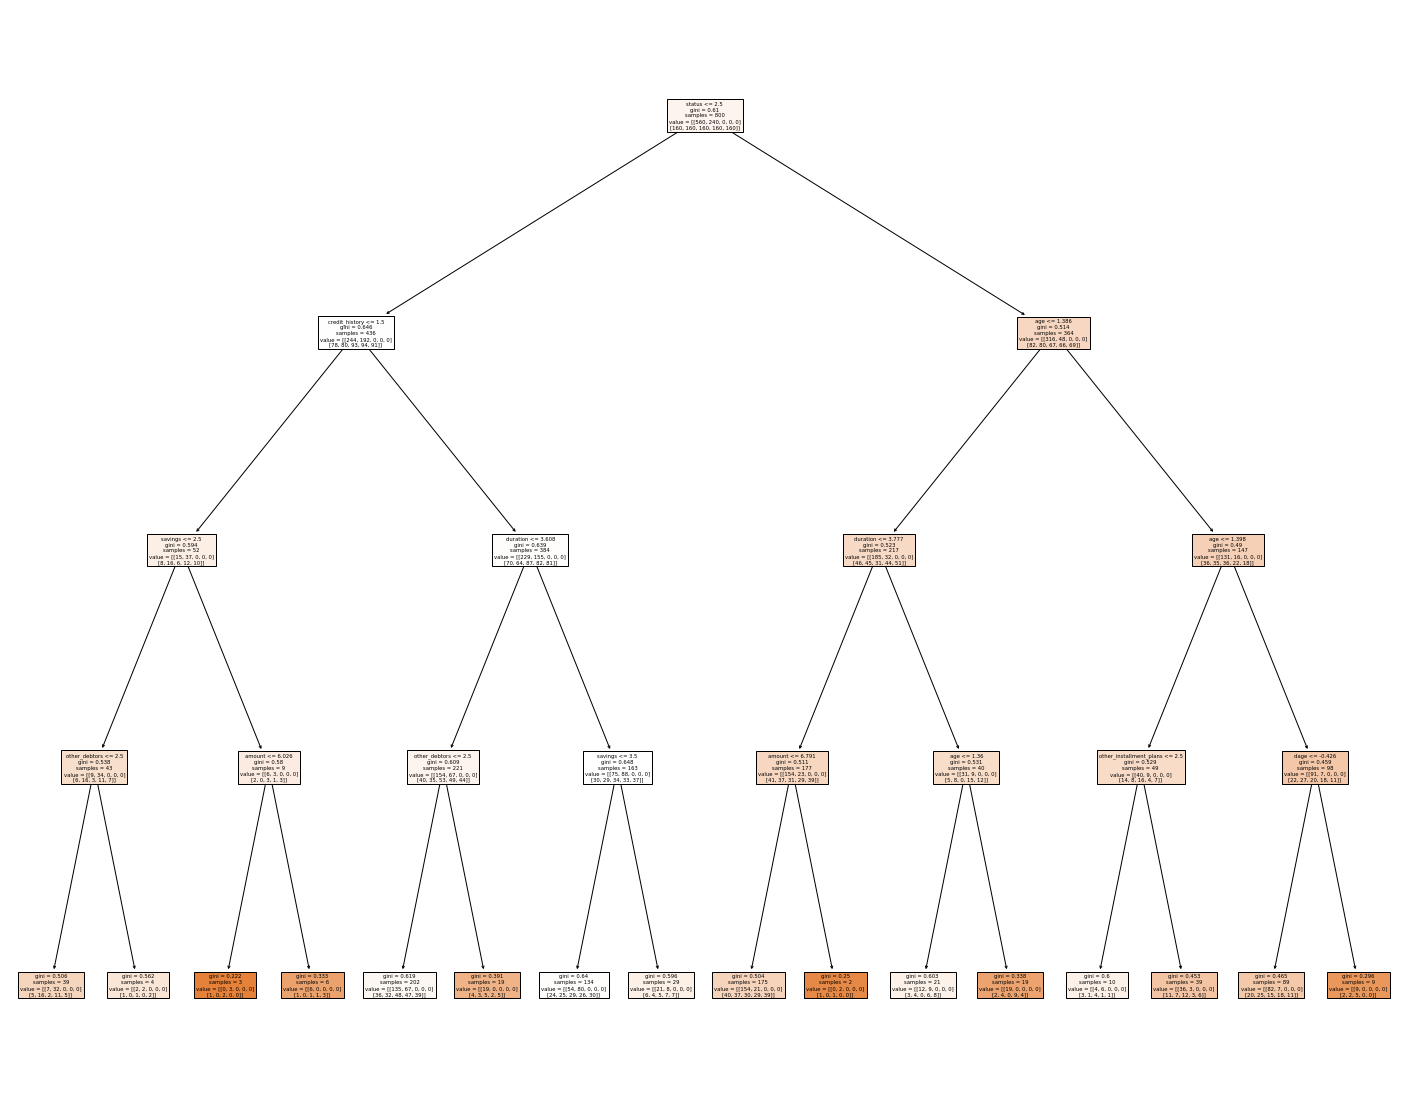

In [197]:
all_feat_list = [col for col in X_train.columns 
                 if col not in ['credit_risk', 'fold']]

dtc_model = DecisionTreeClassifier(max_depth=4, random_state=42)
dtc_model.fit(X_train[all_feat_list], y_train)

fig = plt.figure(figsize=(25,20))
_ = plot_tree(dtc_model, filled=True, feature_names=all_feat_list)

The tree above shows that status:credit_history, credit_history:savings, credit_history:duration_bin, savings:other_debtors, savings:amount_bin, duration_bin:other_debtors, duration_bin:savings, status:age_bin, duration_bin:amount_bin, duration_bin:age_bin, age_bin:other_installment_plans, and age_bin:dage_bin pairs can be considered as iteractions to include in the model building process.